In [1]:
%matplotlib inline
import stumpy
import pandas as pd
import numpy as np
from IPython.display import IFrame
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
df12 = pd.read_csv('20200812Y1.csv')

In [3]:
df12 = df12.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df12 = df12.drop(['mean'], axis = 1)
df12 = df12.dropna()

In [4]:
df14 = pd.read_csv('20200814Y1.csv')

In [5]:
df14 = df14.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df14 = df14.drop(['mean'], axis = 1)
df14 = df14.dropna()

In [6]:
df26 = pd.read_csv('20200826.csv')

In [7]:
df26 = df26.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df26 = df26.drop(['mean'], axis = 1)
df26 = df26.dropna()

In [8]:
df10Y2 = pd.read_csv('20200910Y2.csv')

In [9]:
df10Y2 = df10Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df10Y2 = df10Y2.drop(['mean'], axis = 1)
df10Y2 = df10Y2.dropna()

In [10]:
df11Y2 = pd.read_csv('20200911Y2.csv')

In [11]:
df11Y2 = df11Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df11Y2 = df11Y2.drop(['mean'], axis = 1)
df11Y2 = df11Y2.dropna()


In [12]:
df24Y2 = pd.read_csv('20200924.csv')

In [13]:
df24Y2 = df24Y2.rename(columns={'Time (h)': 'time', 'Mass (ng)': 'mass', 'Mean mass (ng)' : 'mean'})
df24Y2 = df24Y2.drop(['mean'], axis = 1)
df24Y2 = df24Y2.dropna()


In [14]:
df008Y1 = pd.read_csv('20201008Y1.csv')
df008Y1 = df008Y1.dropna()

# PLOTS

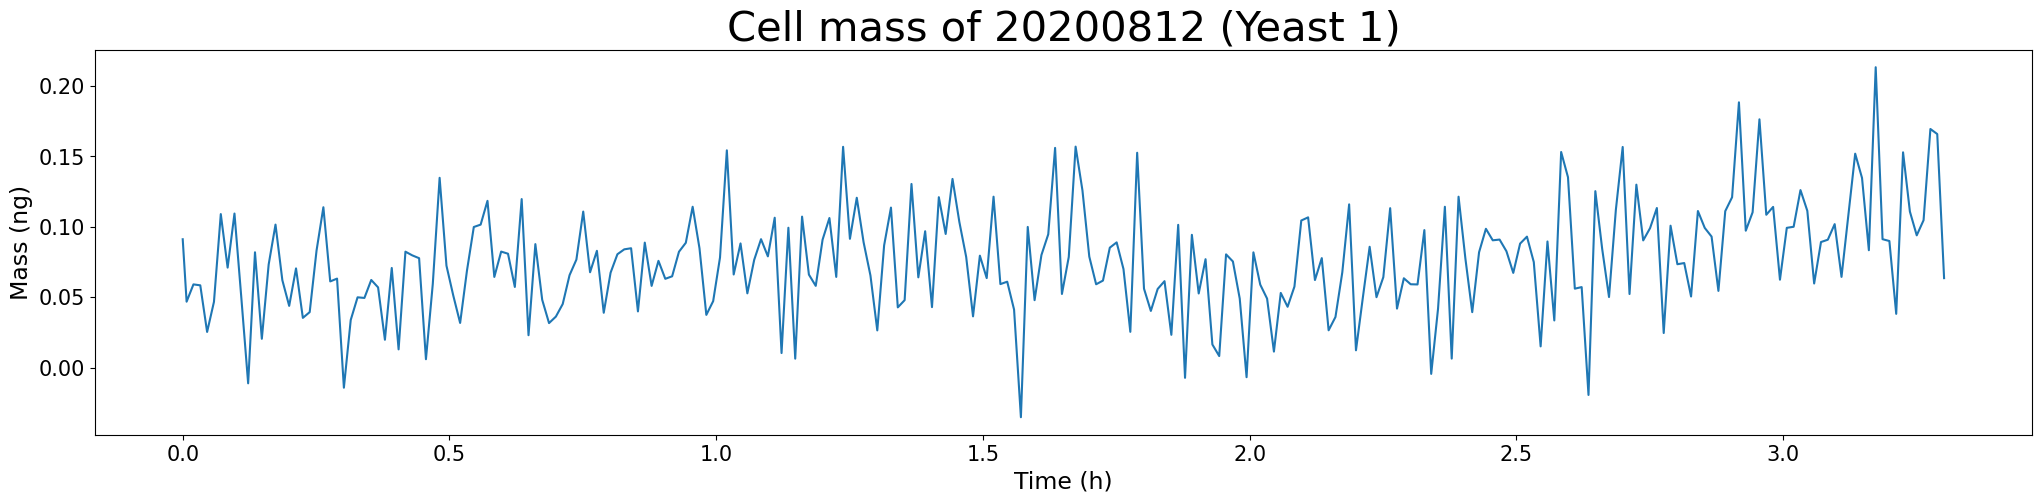

In [15]:
#20200812Y1
plt.figure(figsize=(25, 5))
plt.plot(df12["time"],df12["mass"] )
plt.title("Cell mass of 20200812 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

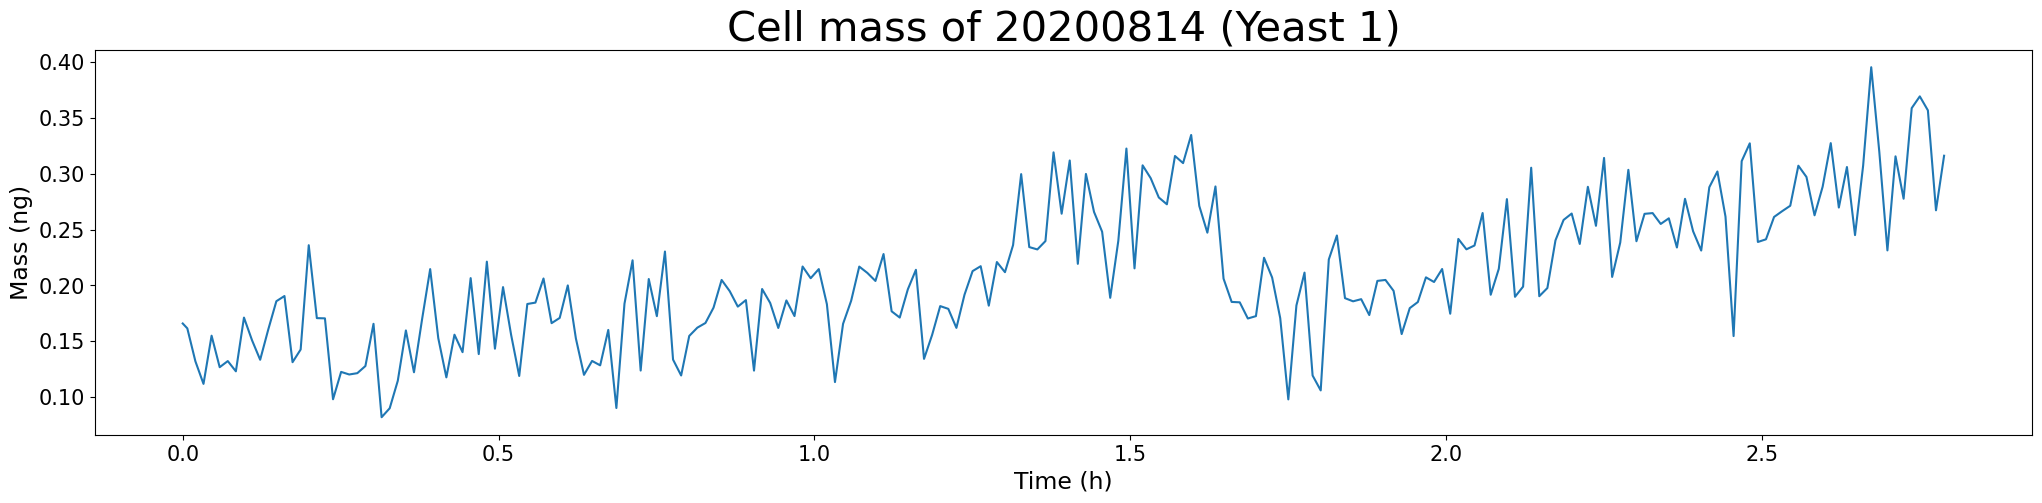

In [16]:
#20200814Y1
plt.figure(figsize=(25, 5))
plt.plot(df14["time"],df14["mass"] )
plt.title("Cell mass of 20200814 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

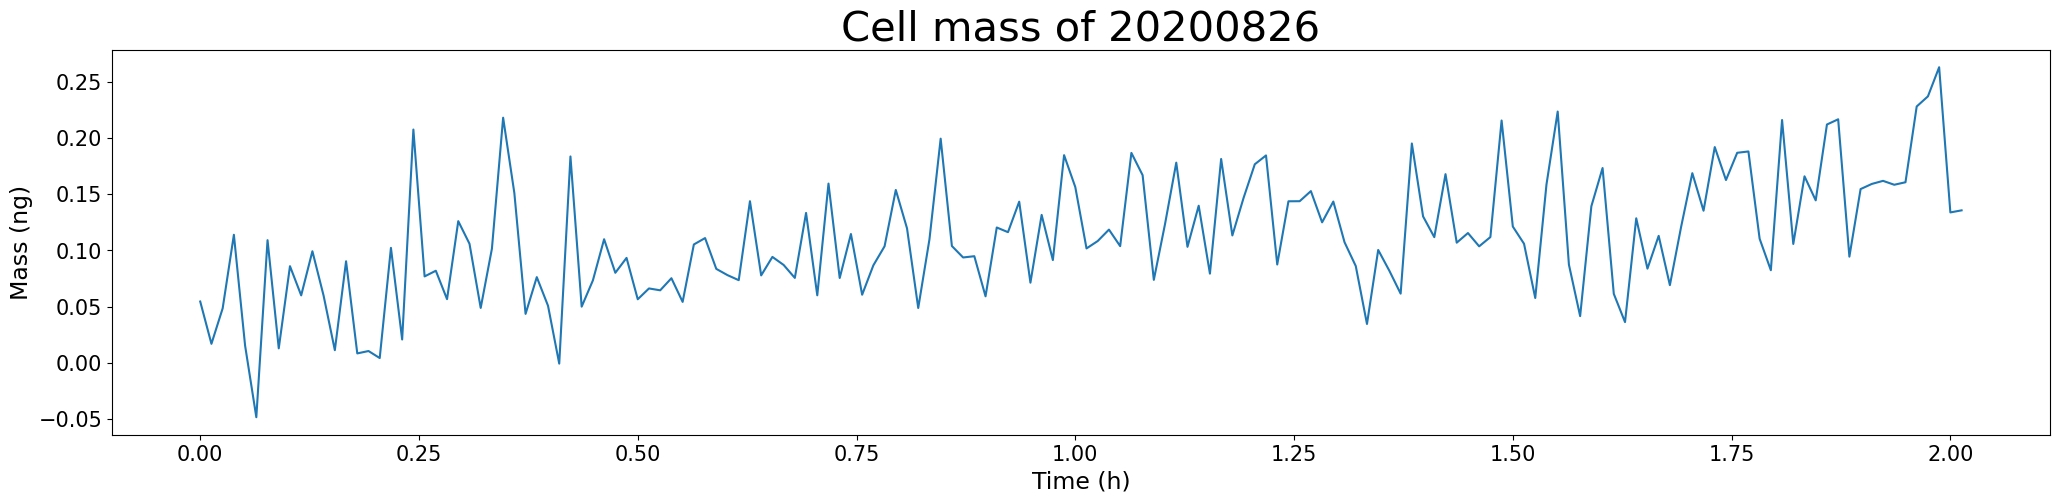

In [17]:
#20200826
plt.figure(figsize=(25, 5))
plt.plot(df26["time"],df26["mass"] )
plt.title("Cell mass of 20200826", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

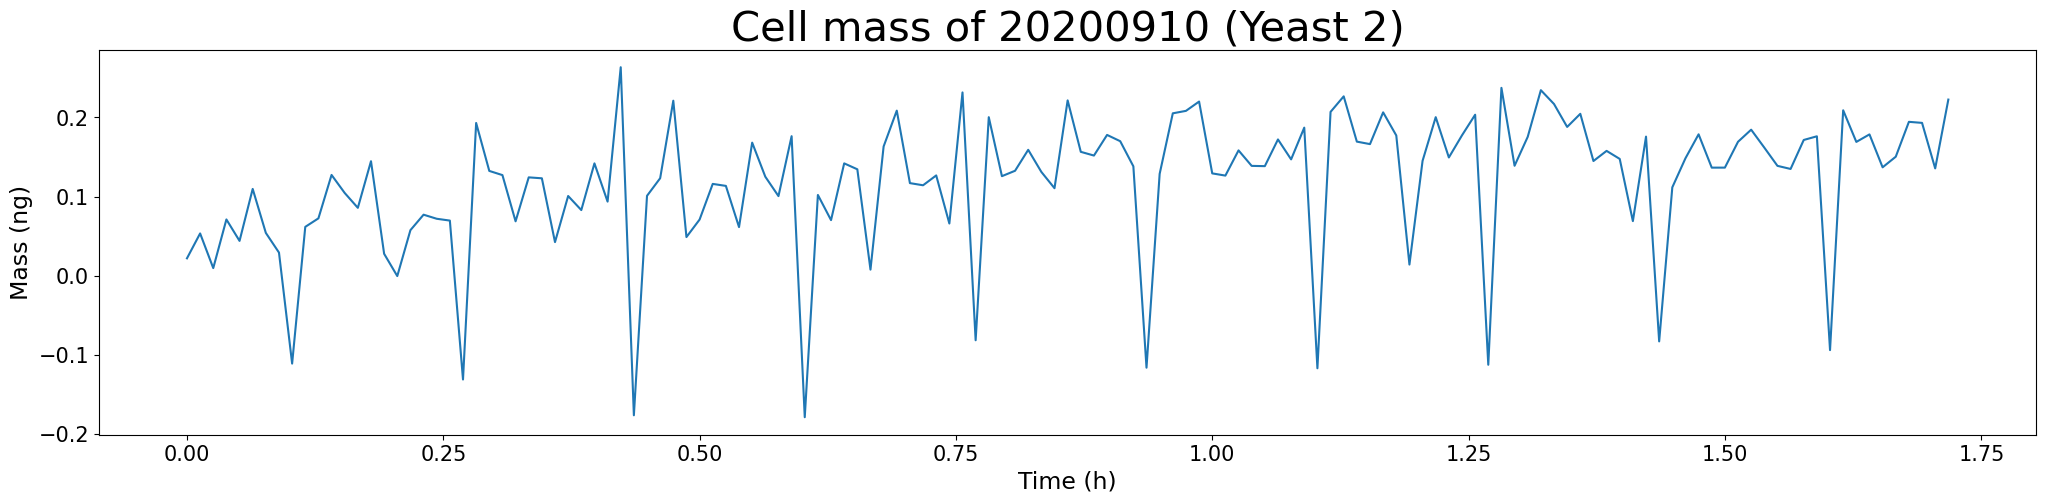

In [18]:
#20200910Y2
plt.figure(figsize=(25, 5))
plt.plot(df10Y2["time"],df10Y2["mass"] )
plt.title("Cell mass of 20200910 (Yeast 2)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

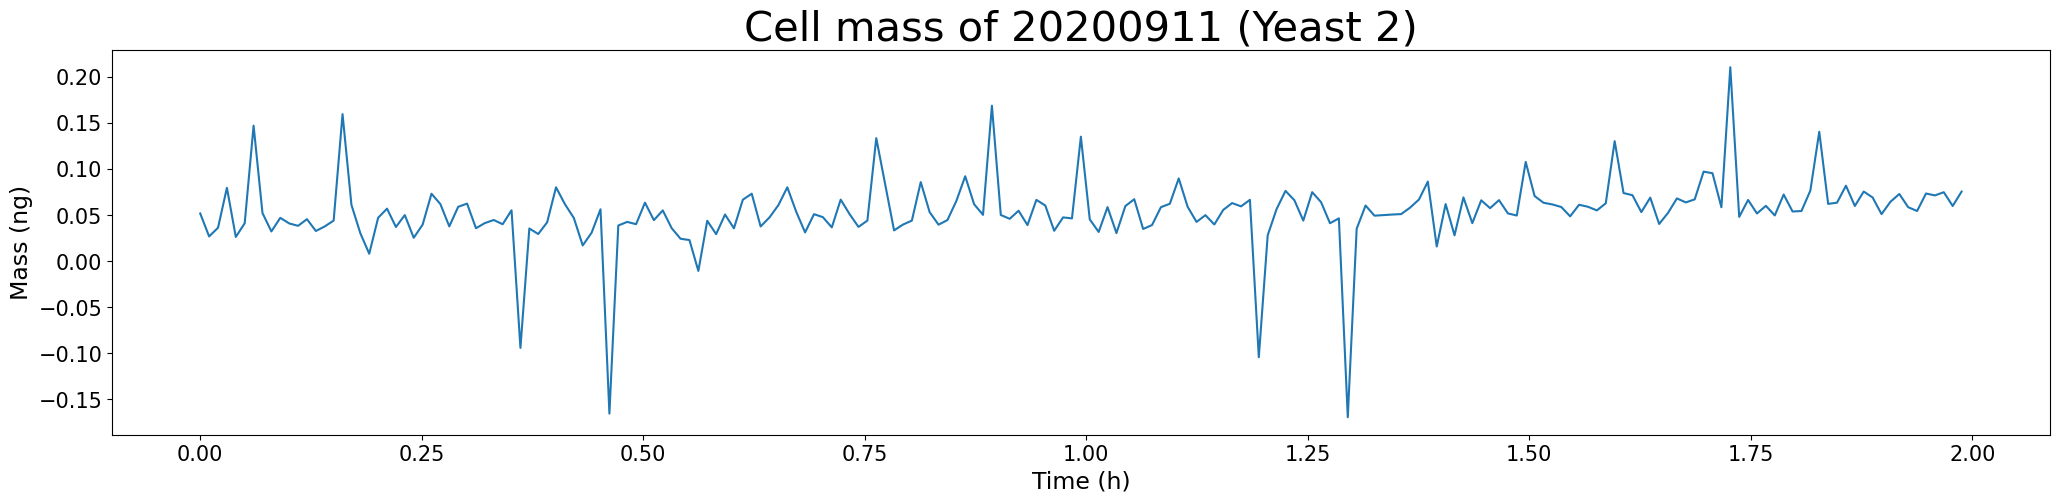

In [19]:
#20200911Y2 
plt.figure(figsize=(25, 5))
plt.plot(df11Y2["time"],df11Y2["mass"] )
plt.title("Cell mass of 20200911 (Yeast 2)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

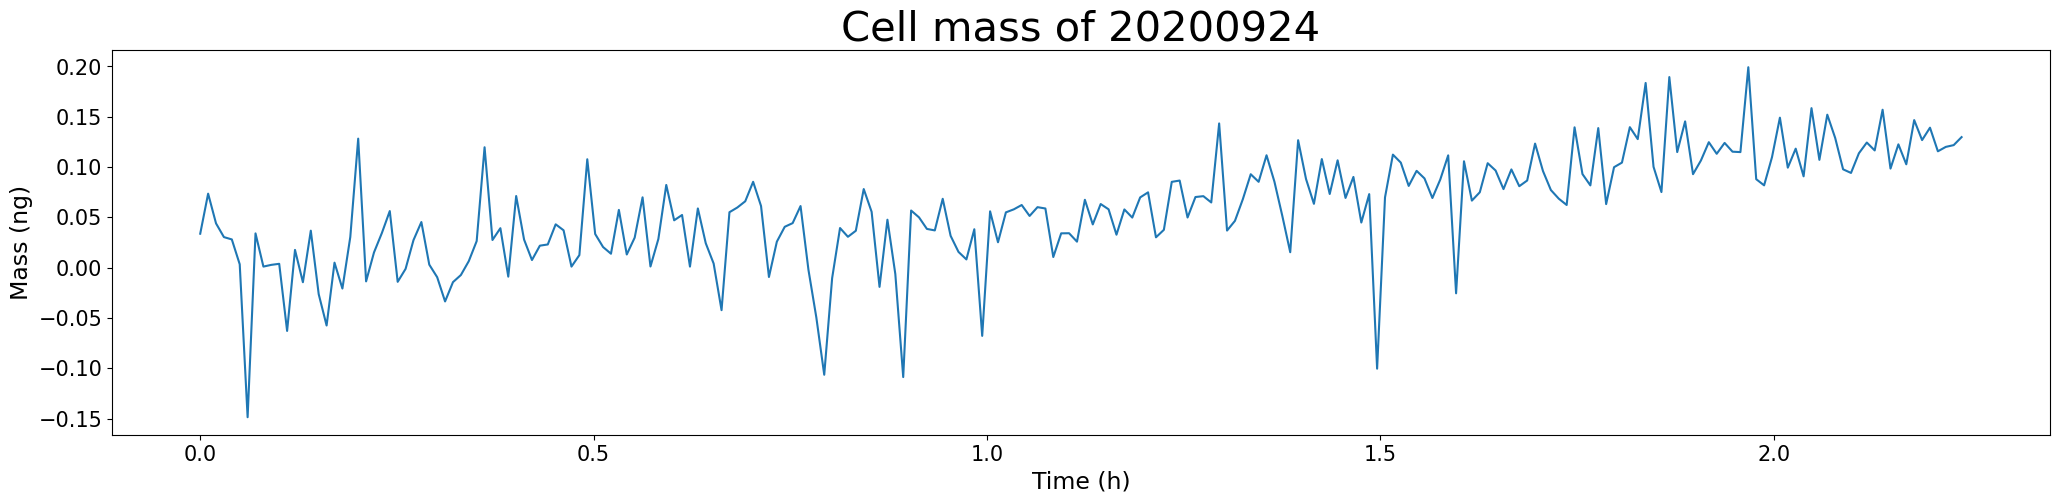

In [20]:
#20200924  
plt.figure(figsize=(25, 5))
plt.plot(df24Y2["time"],df24Y2["mass"] )
plt.title("Cell mass of 20200924", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

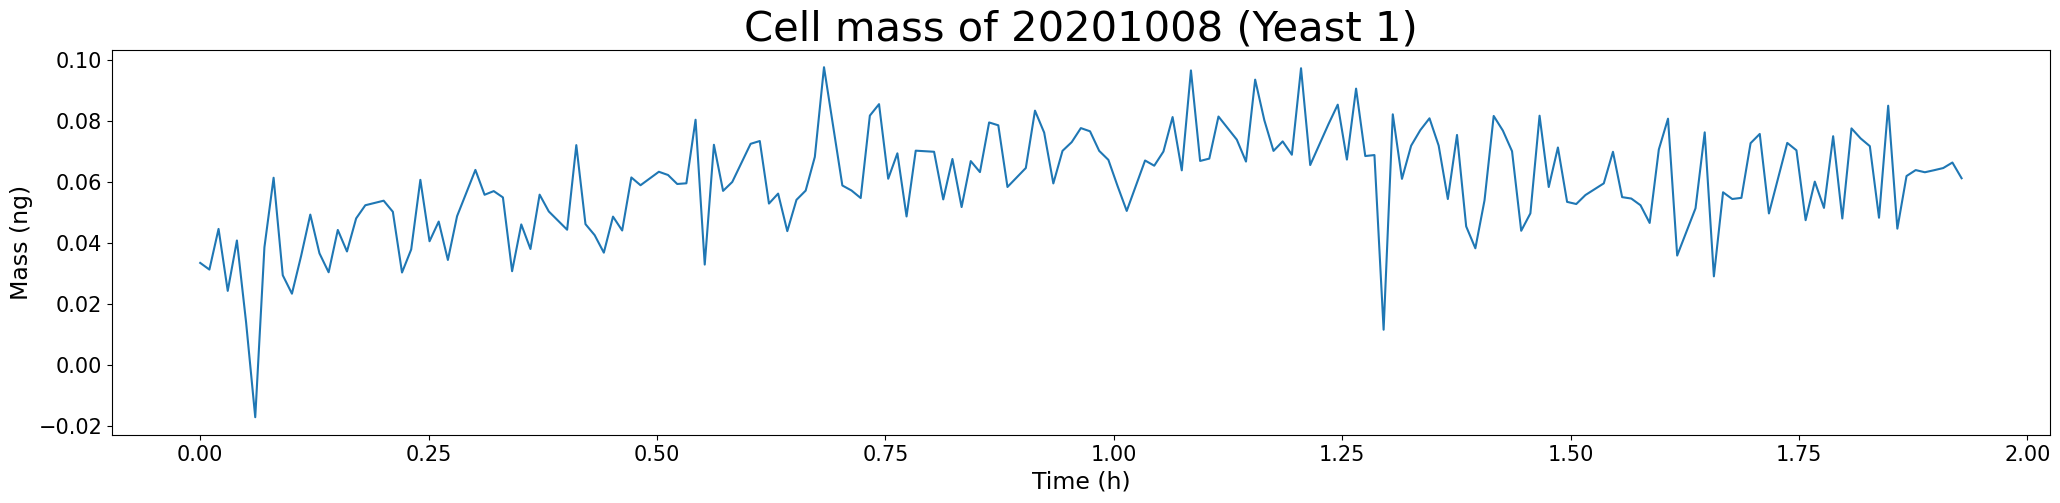

In [21]:
#20201008Y1  
plt.figure(figsize=(25, 5))
plt.plot(df008Y1["time"],df008Y1["mass"] )
plt.title("Cell mass of 20201008 (Yeast 1)", fontdict={"fontsize": 30})
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Calculating MP/Motifs/Discords on each

#  20200812 (Yeast 1)

It is recommended to use different window sizes when detecting motifs and discords using the matrix profile. This is because the optimal window size for detecting motifs may be different from that for detecting discords.

In [22]:
x = df12.index
y = df12['mass']

In [23]:
#for motifs
m = 8
mp = stumpy.stump(df12['mass'], m) 

In [24]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [25]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
204  0.820472           249                121                 249
249  0.820472           204                204                  -1

Text(0.5, 0.98, 'Finding Motifs')

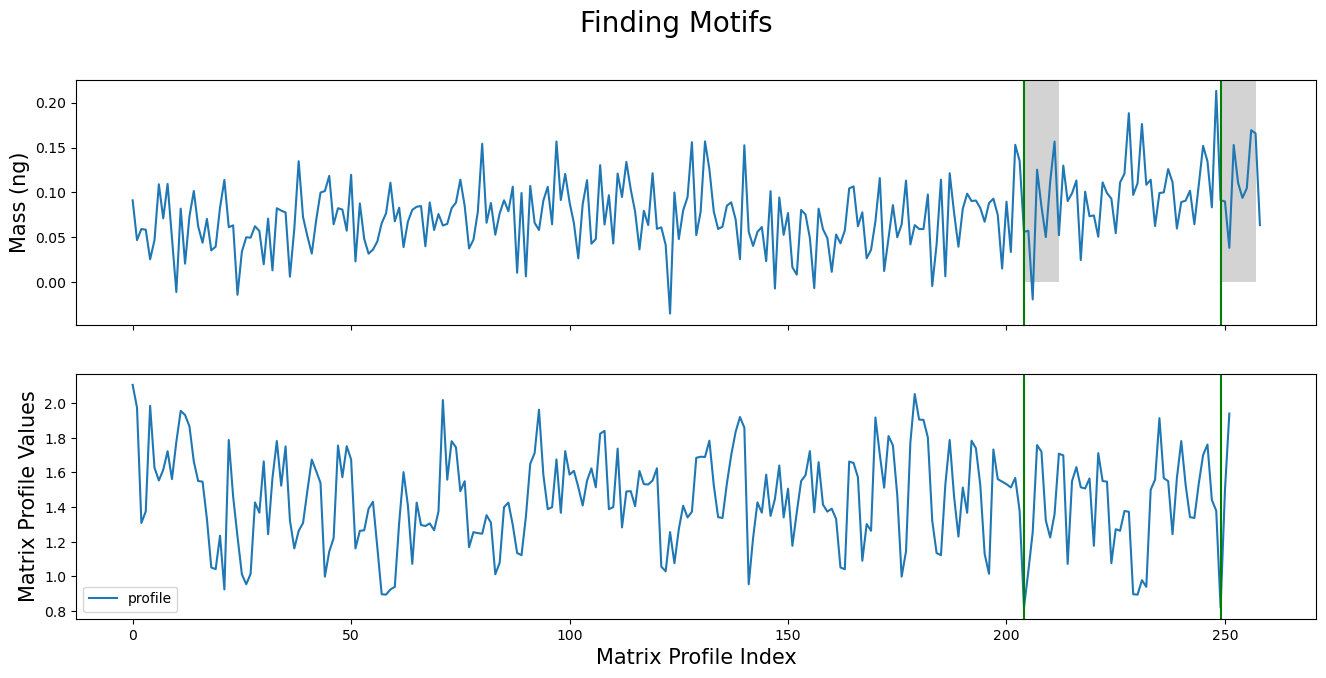

In [26]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)

Text(0.5, 1.0, 'Motifs Comparison')

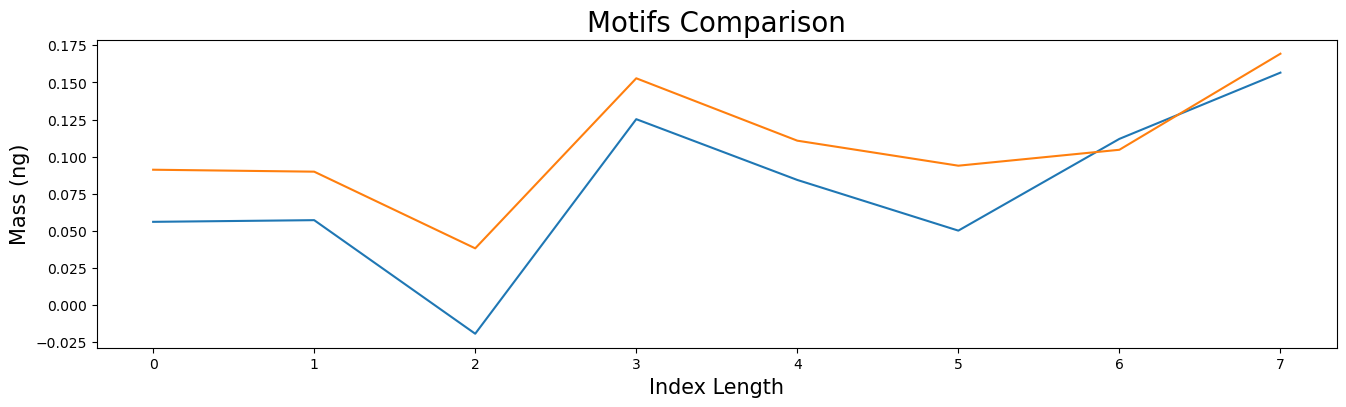

In [27]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [28]:
#for discord
m1 = 22
mp1 = stumpy.stump(df12['mass'], m1)

In [29]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [30]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
237  5.080281           120                120                  -1

Text(0.5, 0.98, 'Findig a Discord')

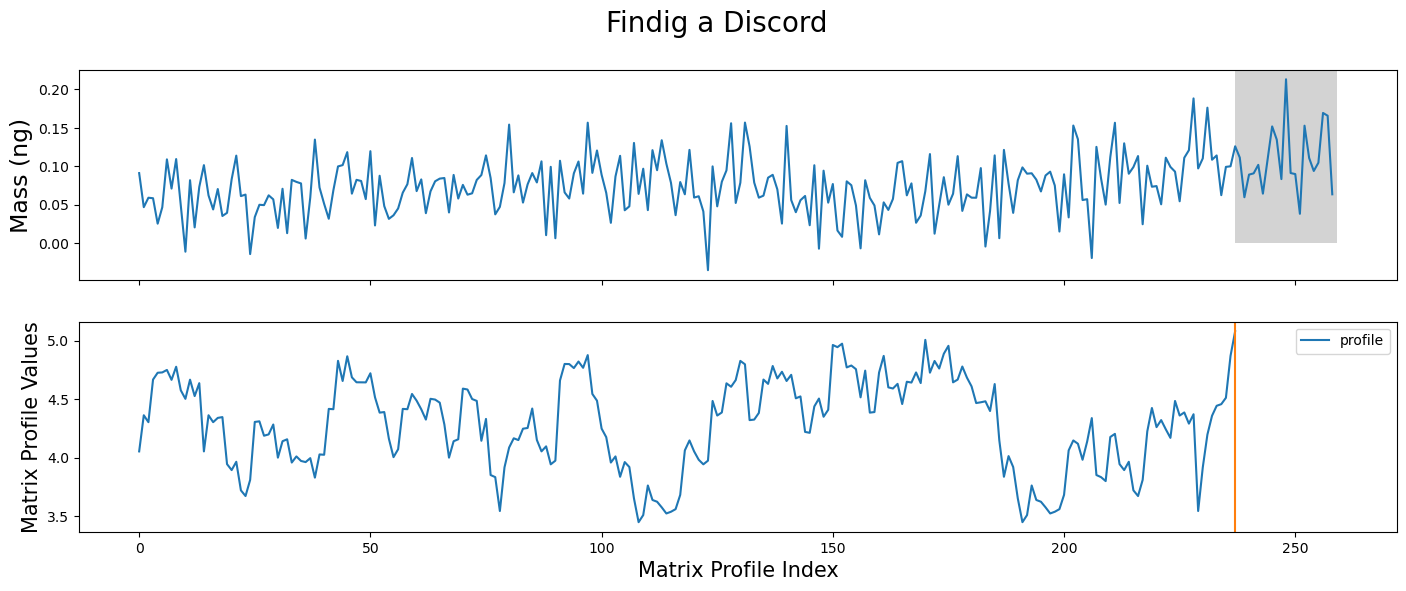

In [31]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [32]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [5.080281102304245] units away


# 20200814 (Yeast 1)

In [33]:
y = df14['mass']
x = df14.index

In [34]:
#for motifs
m = 9
mp = stumpy.stump(df14['mass'], m)

In [35]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [36]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
28   0.807312           206                 20                 206
206  0.807312            28                 28                 210

Text(0.5, 0.98, 'Finding Motifs')

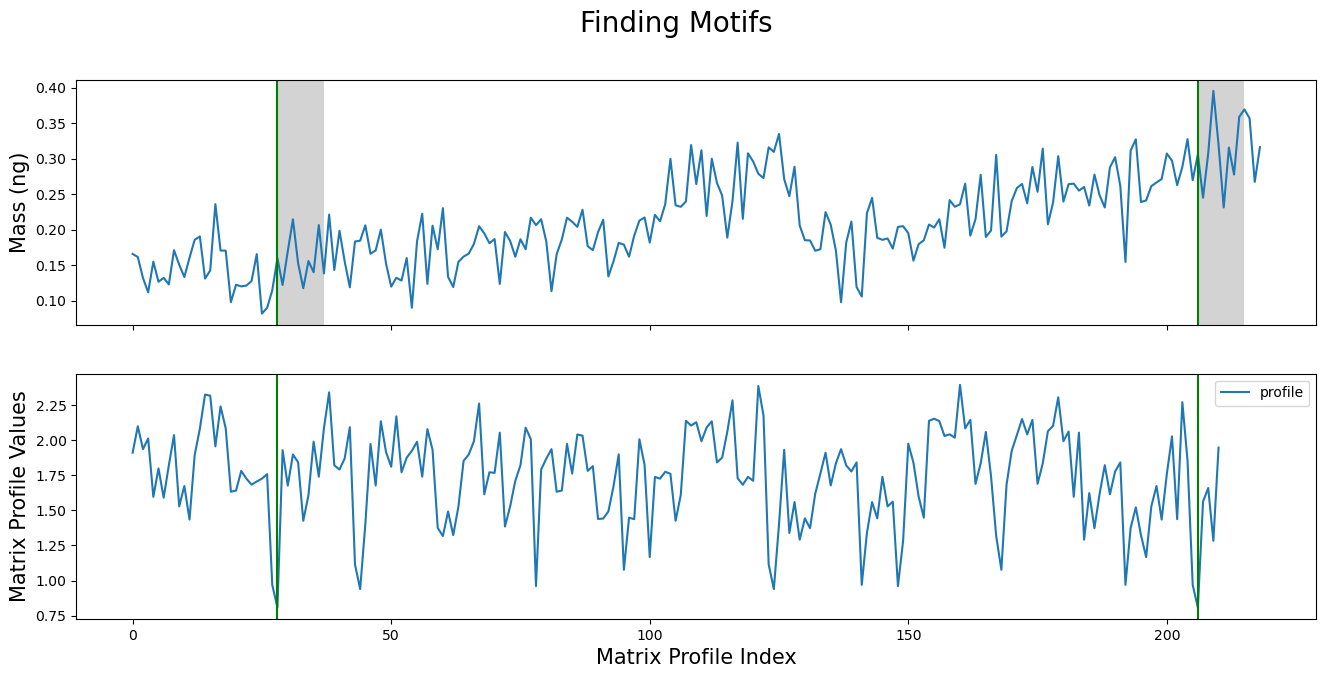

In [37]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

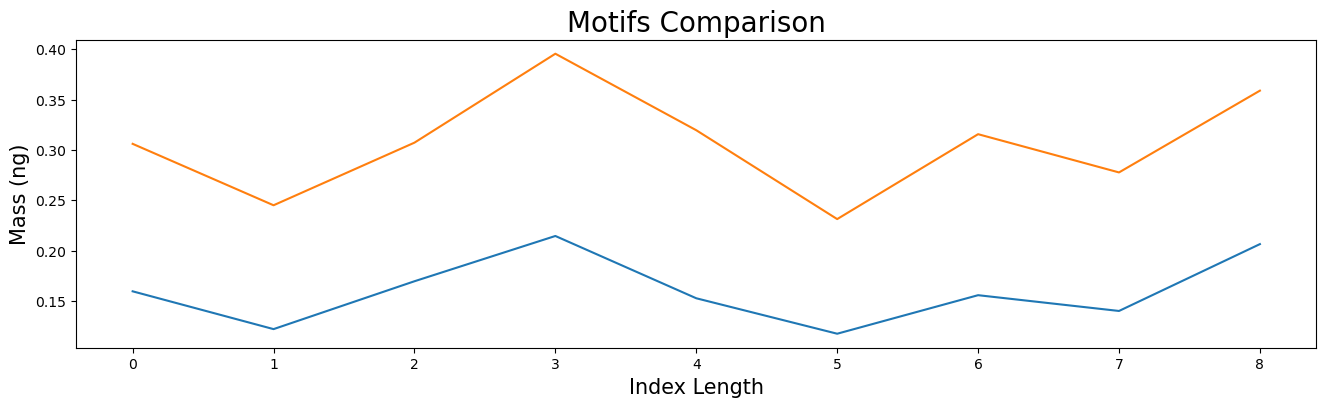

In [38]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

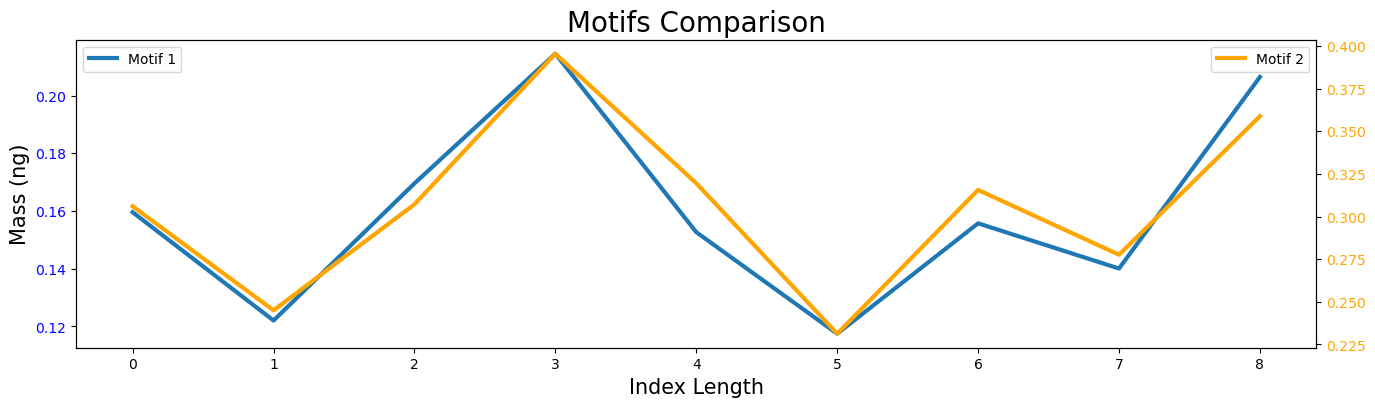

In [39]:
#2 Y-axis
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [40]:
#for discord
m1 = 26
mp1 = stumpy.stump(df14['mass'], m1)

In [41]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [42]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
107  5.941252           188                 28                 188

Text(0.5, 0.98, 'Findig a Discord')

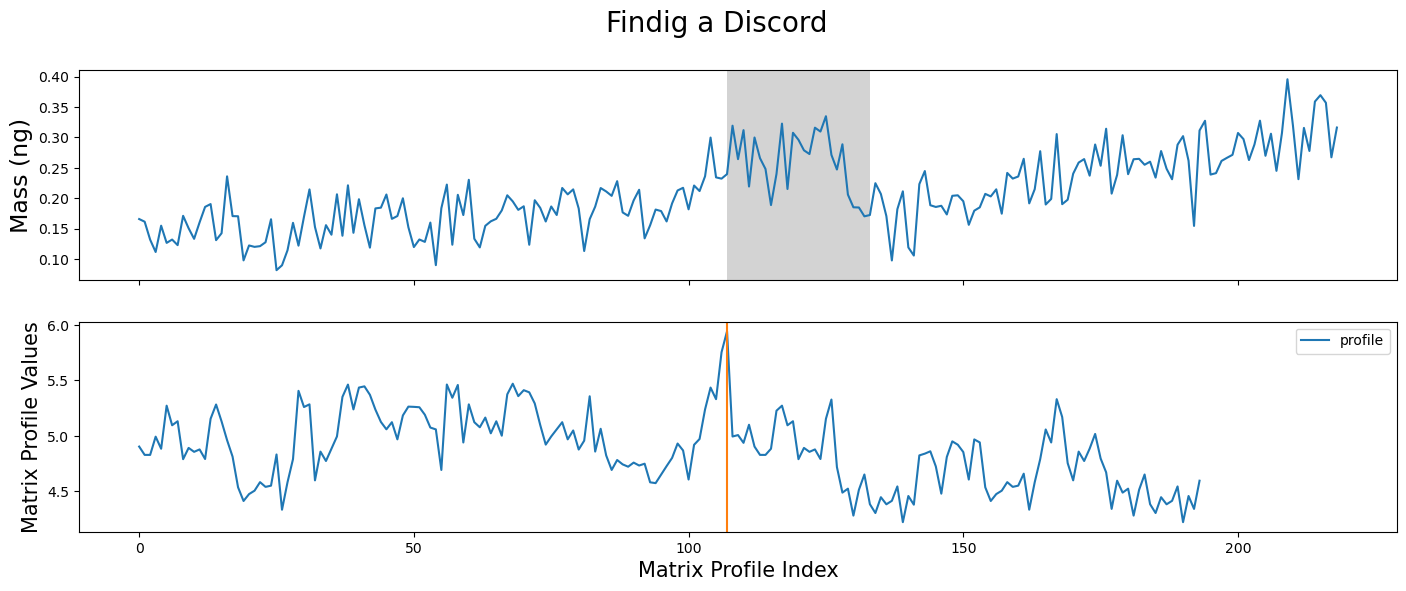

In [43]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [44]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [5.941251722353527] units away


# 20200826

In [45]:
y = df26['mass']
x = df26.index
#for motif
m = 7
mp = stumpy.stump(df26['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
118  0.474518           122                  0                 122
122  0.474518           118                118                 143

Text(0.5, 0.98, 'Finding Motifs')

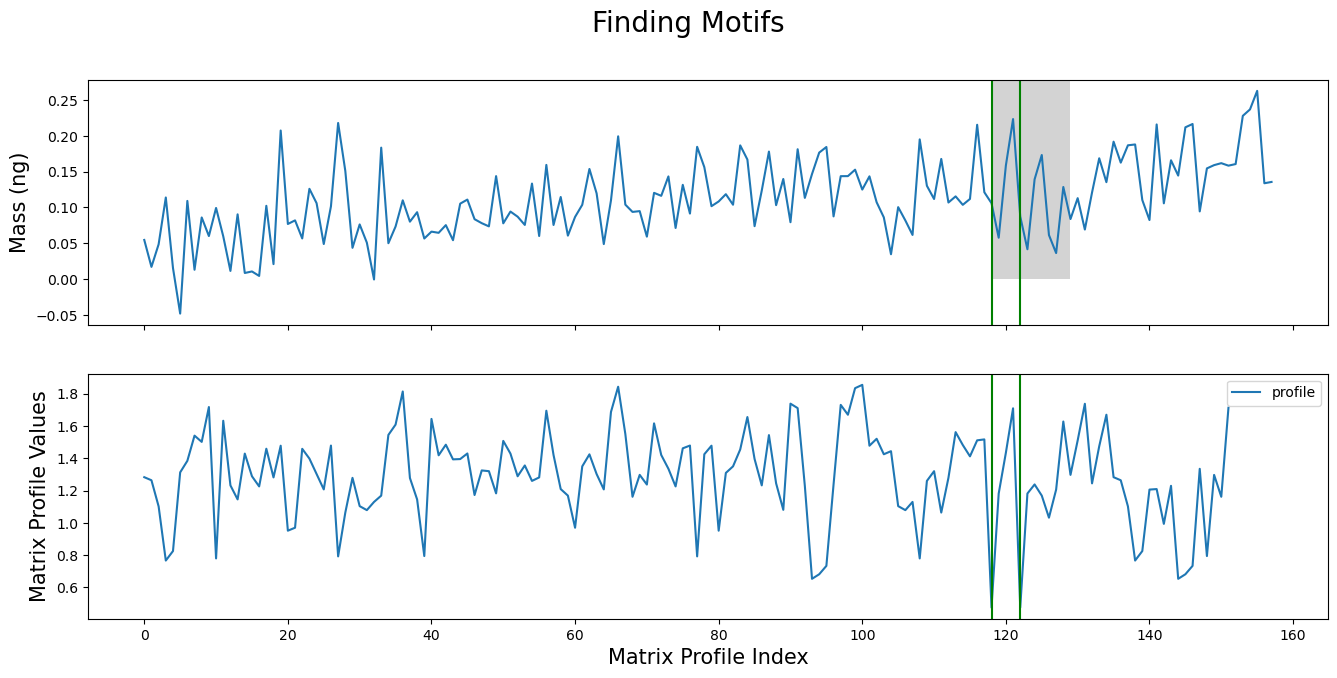

In [46]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

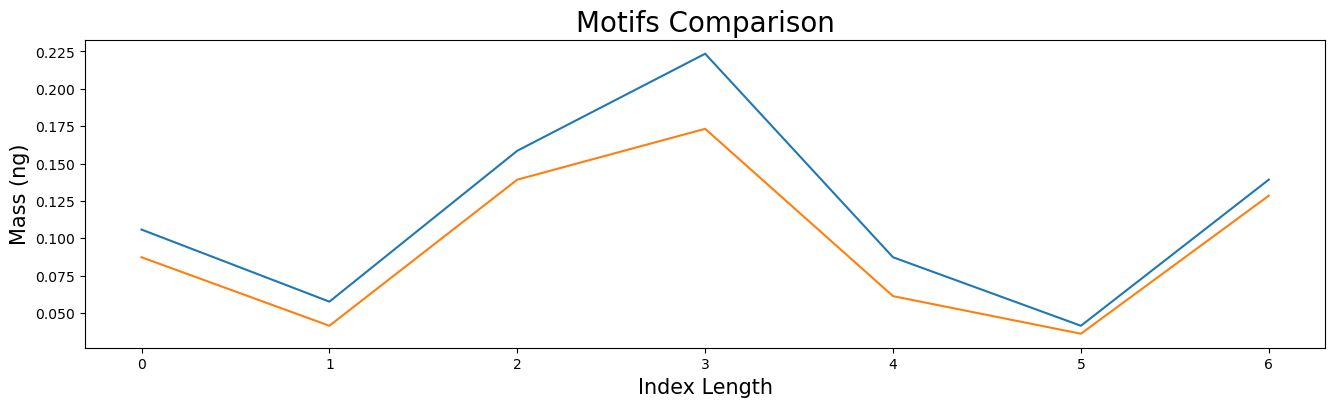

In [47]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

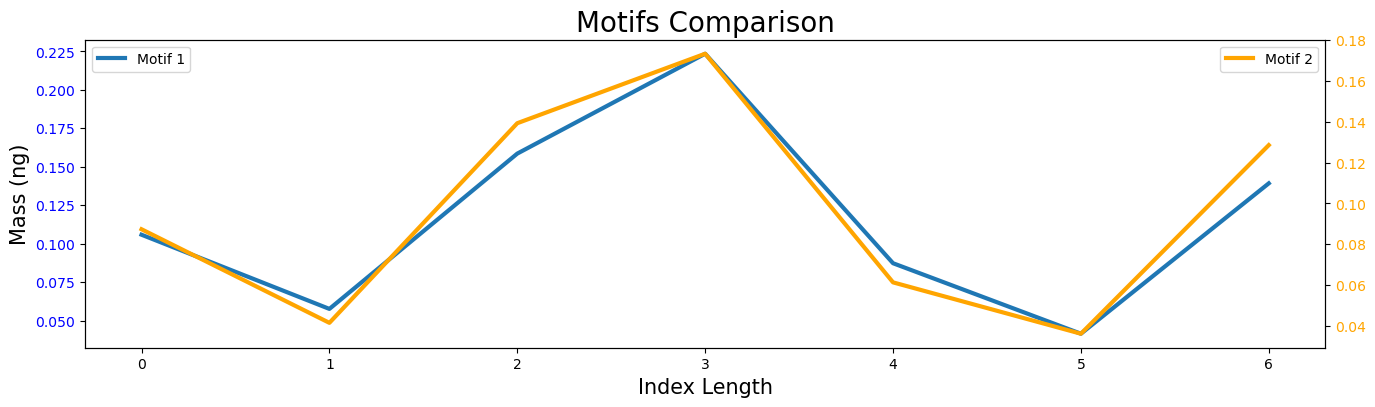

In [48]:
#2 Y-axis
fig, ax1 = plt.subplots(figsize=(16,4))

idx1 = best_motif.index[0]
plot_y1 = y.iloc[idx1:(idx1+m)].to_list()
sns.lineplot(data=plot_y1, ax=ax1, label='Motif 1', linewidth =3)
ax1.set_xlabel('Index Length', fontsize=15)
ax1.set_ylabel('Mass (ng)', fontsize=15)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

idx2 = best_motif.index[1]
plot_y2 = y.iloc[idx2:(idx2+m)].to_list()
sns.lineplot(data=plot_y2, ax=ax2, label='Motif 2', color='orange', linewidth =3)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.title('Motifs Comparison', fontsize=20)
plt.show()

In [49]:
#for discord
m1 = 16
mp1 = stumpy.stump(df26['mass'], m1)

In [50]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [51]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
93  4.277389             2                  2                 120

Text(0.5, 0.98, 'Findig a Discord')

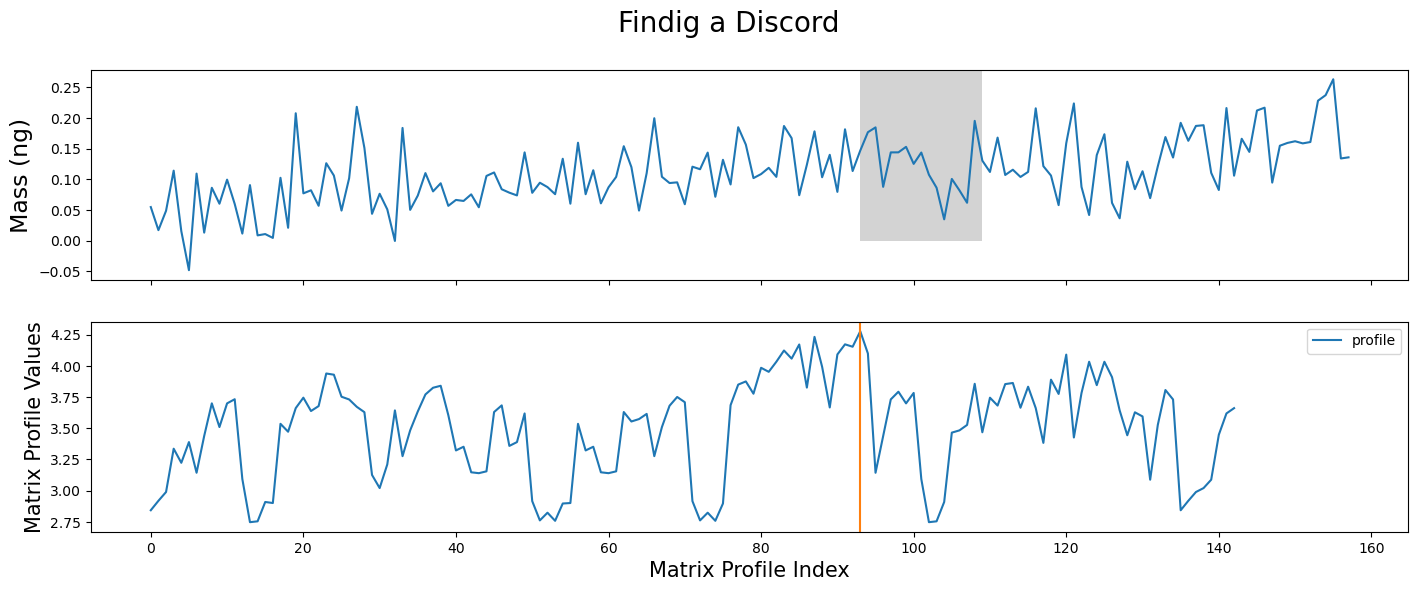

In [52]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [53]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [4.277388942724183] units away


# 20200910 (Yeast 2)

In [54]:
y = df10Y2['mass']
x = df10Y2.index

In [55]:
#for motifs
m = 8
mp = stumpy.stump(df10Y2['mass'], m)

In [56]:
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [57]:
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
80   0.614905           119                 41                 119
119  0.614905            80                 80                 127

Text(0.5, 0.98, 'Finding Motifs')

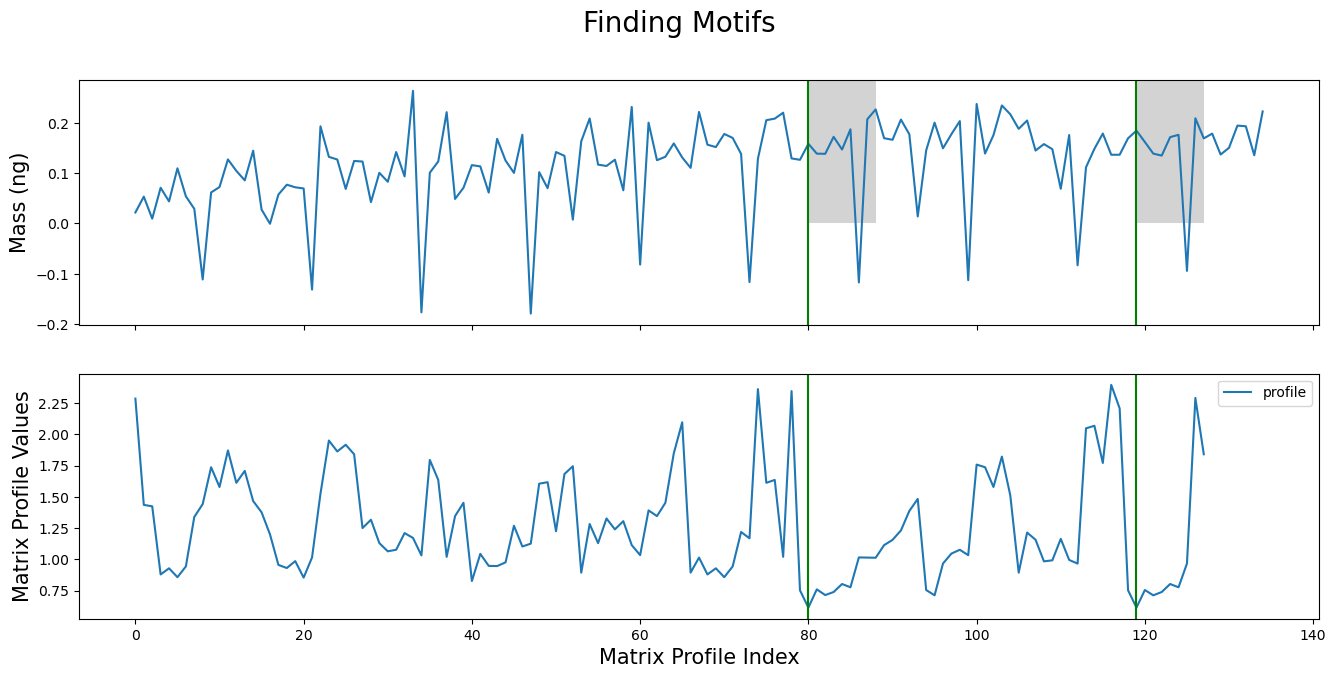

In [58]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

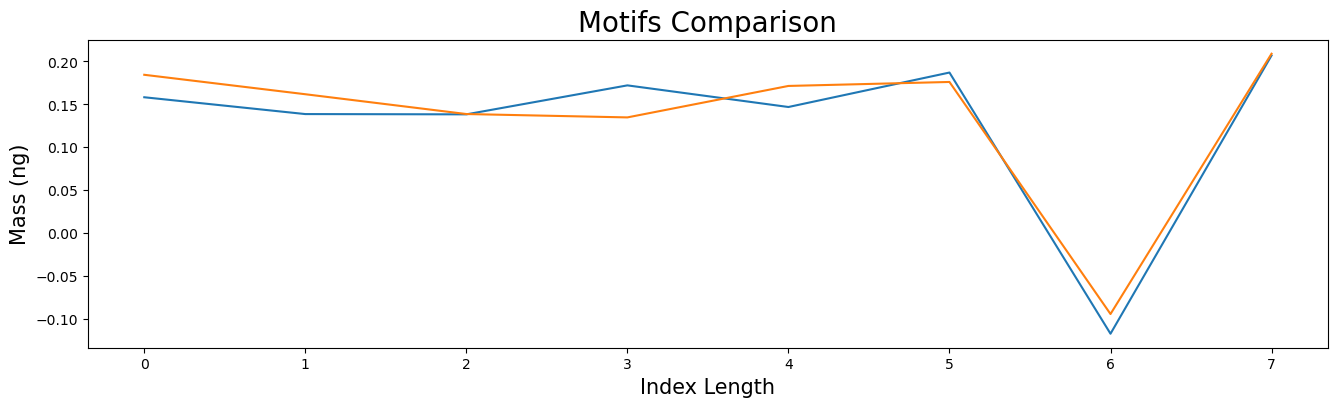

In [59]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [60]:
#for discord
m1 = 8
mp1 = stumpy.stump(df10Y2['mass'], m1)

In [61]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [62]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
116  2.396666            15                 15                 124

Text(0.5, 0.98, 'Findig a Discord')

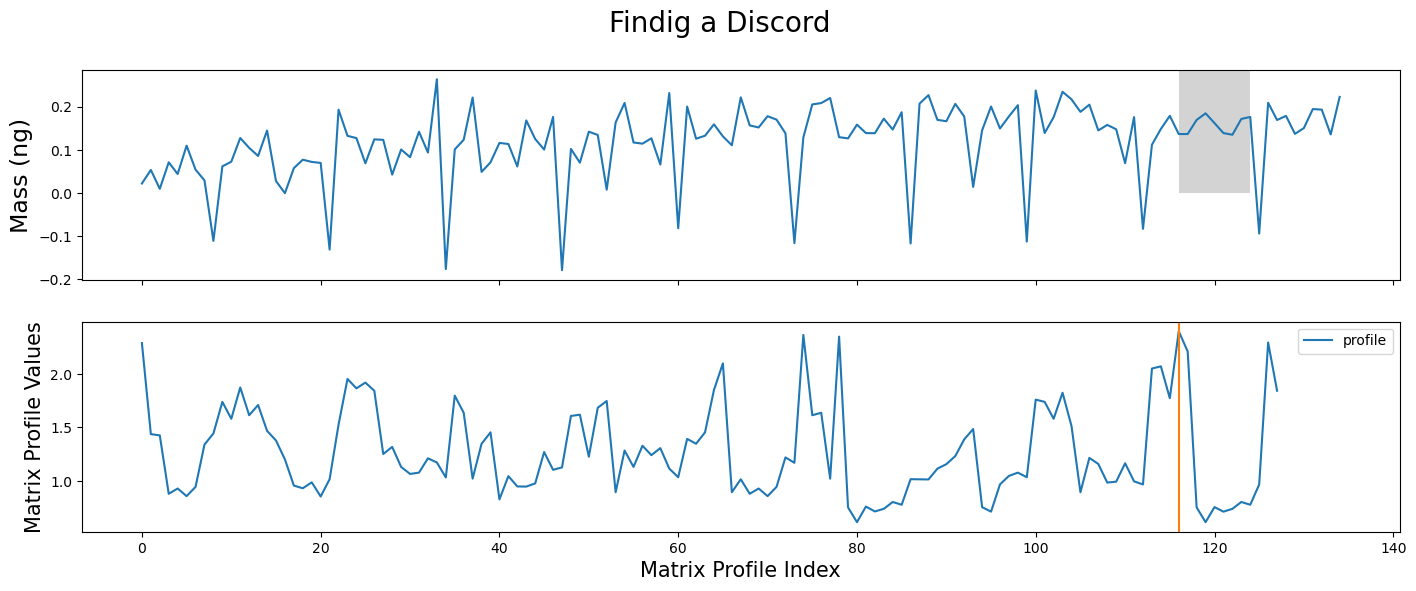

In [63]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [64]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [2.3966657952629262] units away


# 20200911 (Yeast 2)

In [65]:
y = df11Y2['mass']
x = df11Y2.index
#for motif
m = 8
mp = stumpy.stump(df11Y2['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
45   0.380667           128                 35                 128
128  0.380667            45                 45                 140

Text(0.5, 0.98, 'Finding Motifs')

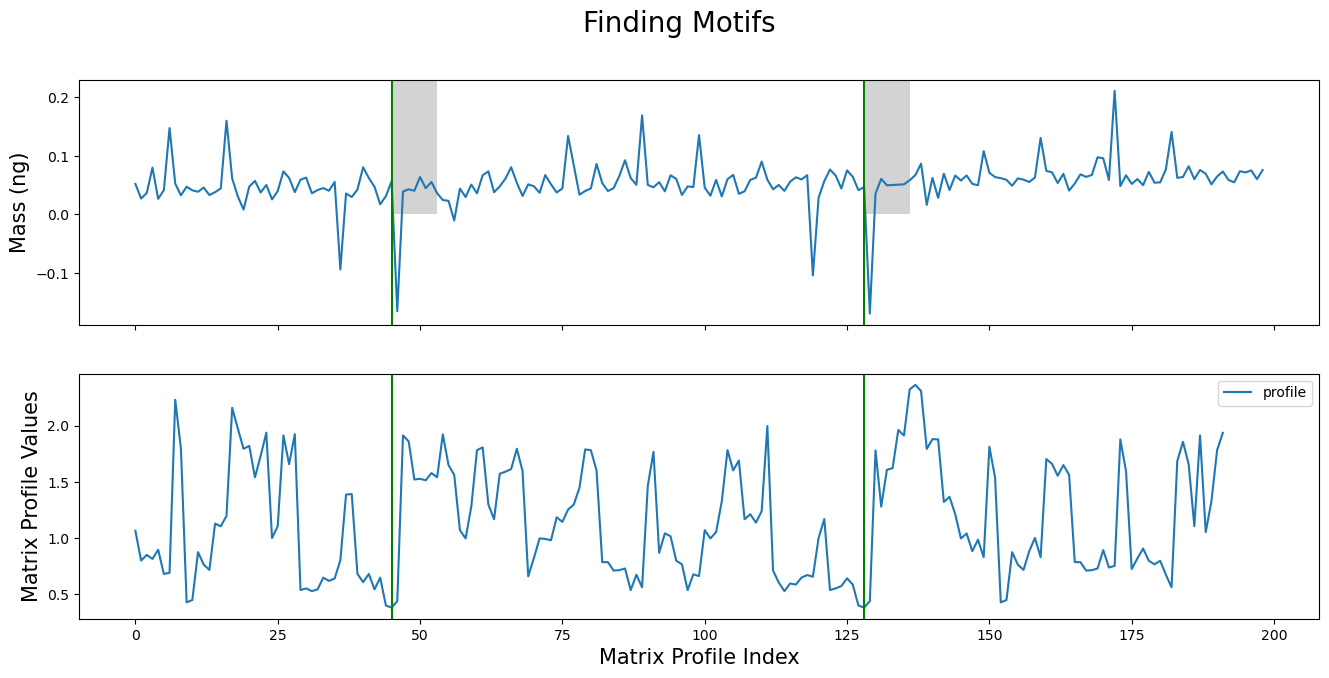

In [66]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

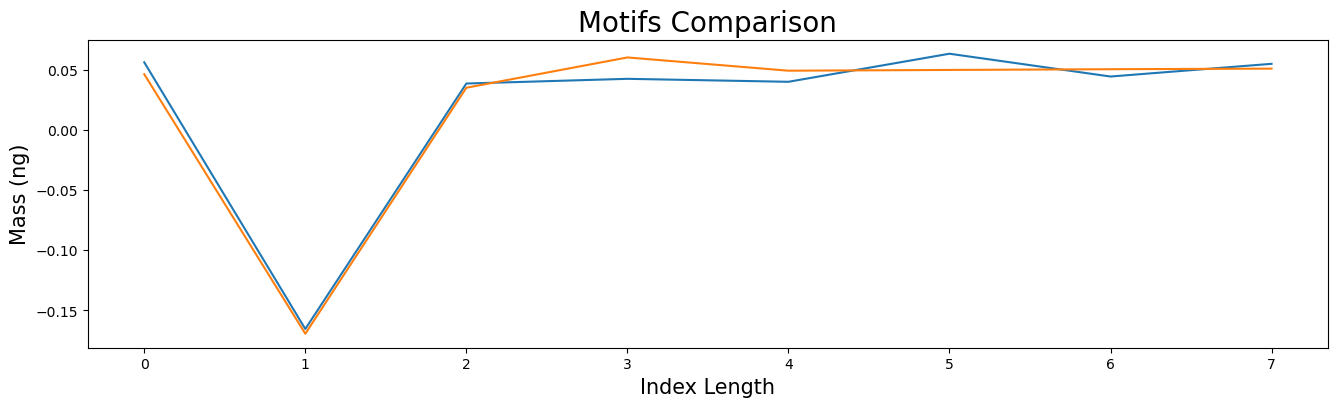

In [67]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [68]:
#for discord
m1 = 12
mp1 = stumpy.stump(df11Y2['mass'], m1)

In [69]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [70]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
187  3.144659           127                127                  -1

Text(0.5, 0.98, 'Findig a Discord')

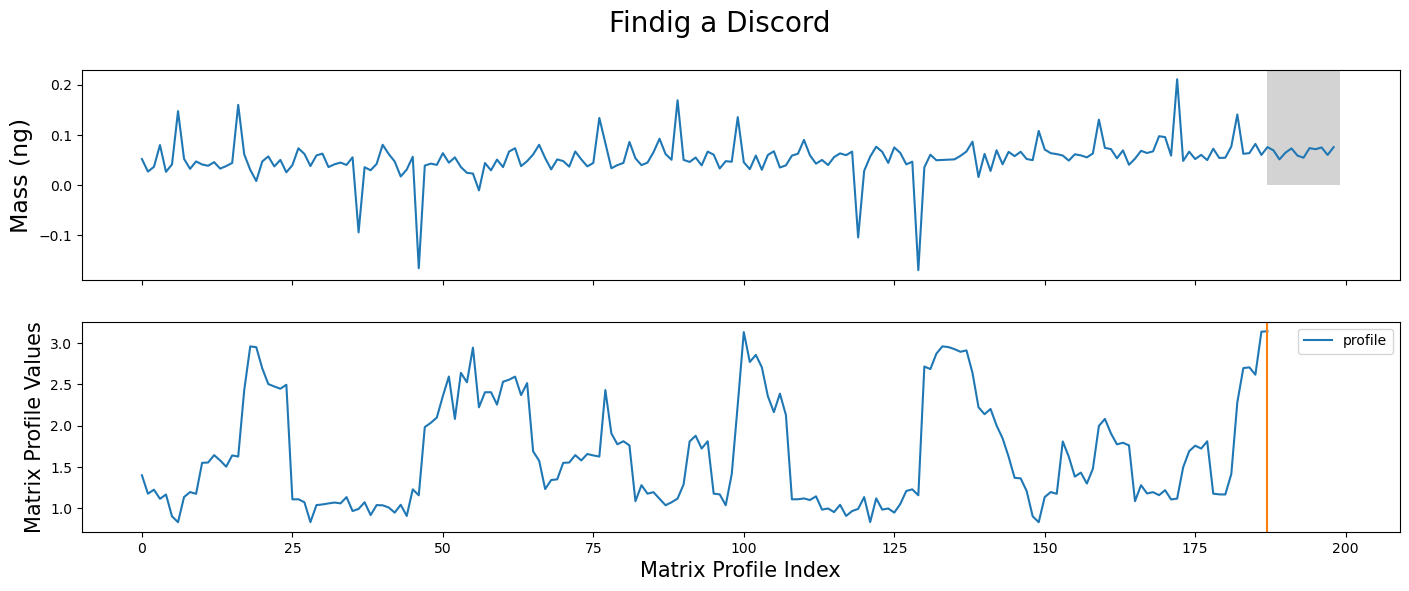

In [71]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [72]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [3.144658596704488] units away


# 20200924

In [73]:
y = df24Y2['mass']
x = df24Y2.index
#for motif
m = 8
mp = stumpy.stump(df24Y2['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
126  0.472562           193                 17                 193
193  0.472562           126                126                 210

Text(0.5, 0.98, 'Finding Motifs')

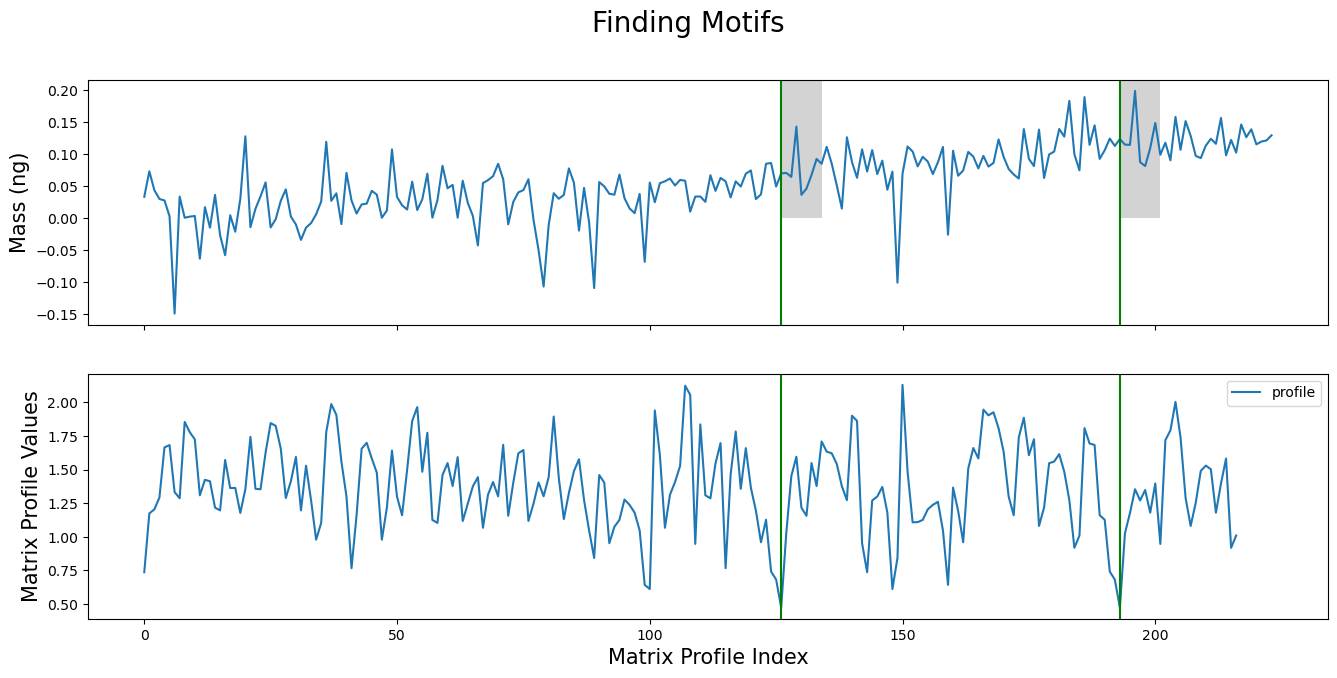

In [74]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

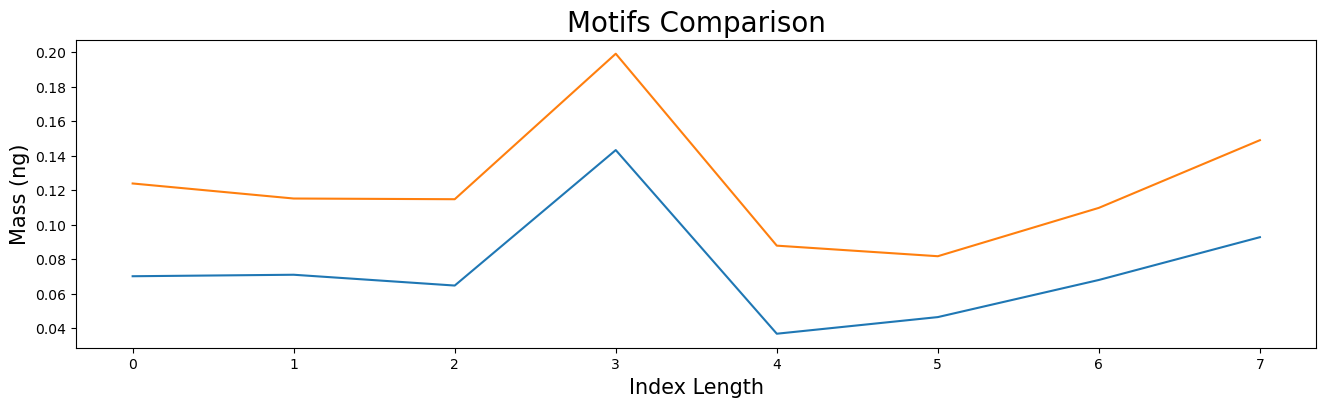

In [75]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [76]:
#for discord
m1 = 48
mp1 = stumpy.stump(df24Y2['mass'], m1)

In [77]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [78]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
171  8.055149           104                104                  -1

Text(0.5, 0.98, 'Findig a Discord')

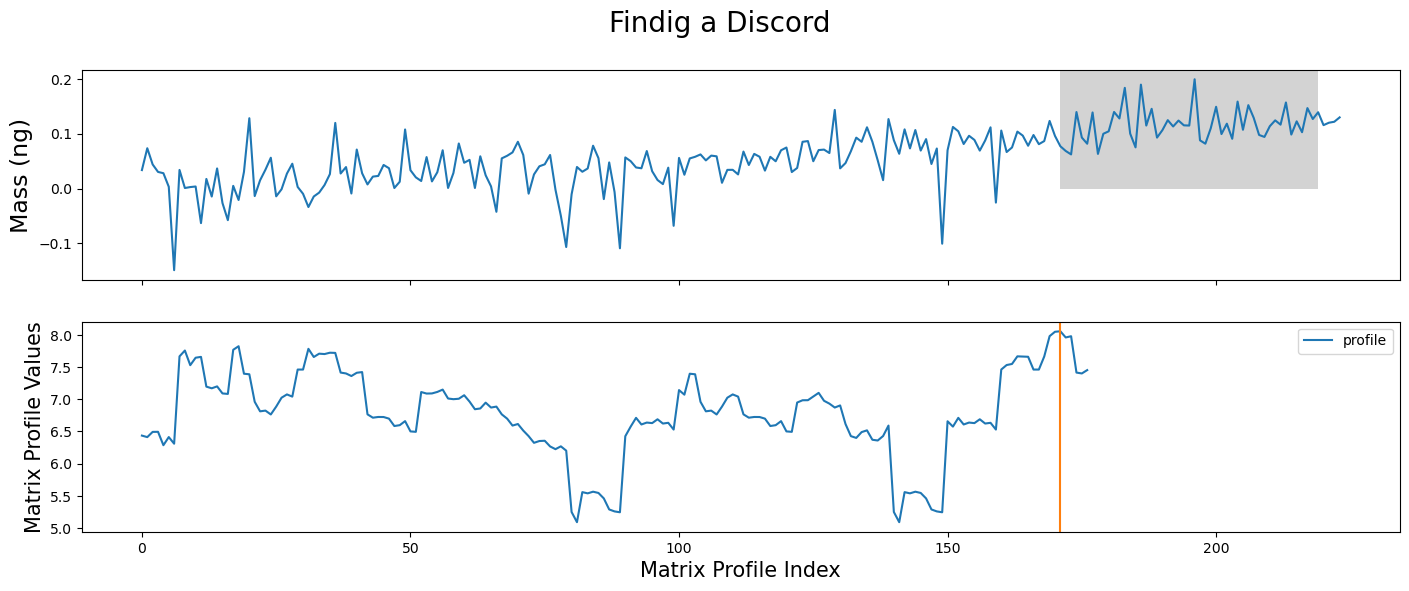

In [79]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17)
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15) 

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [80]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [8.055149181521841] units away


#  20201008 (Yeast 1)

In [81]:
y = df008Y1['mass']
x = df008Y1.index
#for motif
m = 8
mp = stumpy.stump(df008Y1['mass'], m)
mp_df = pd.DataFrame(mp, columns=['profile', 'profile index', 'left profile index', 'right profile index'])
best_motif = mp_df[mp_df['profile'] == mp_df['profile'].min()]
best_motif

profile profile index left profile index right profile index
19   0.647198           131                  4                 131
131  0.647198            19                 19                 147

Text(0.5, 0.98, 'Finding Motifs')

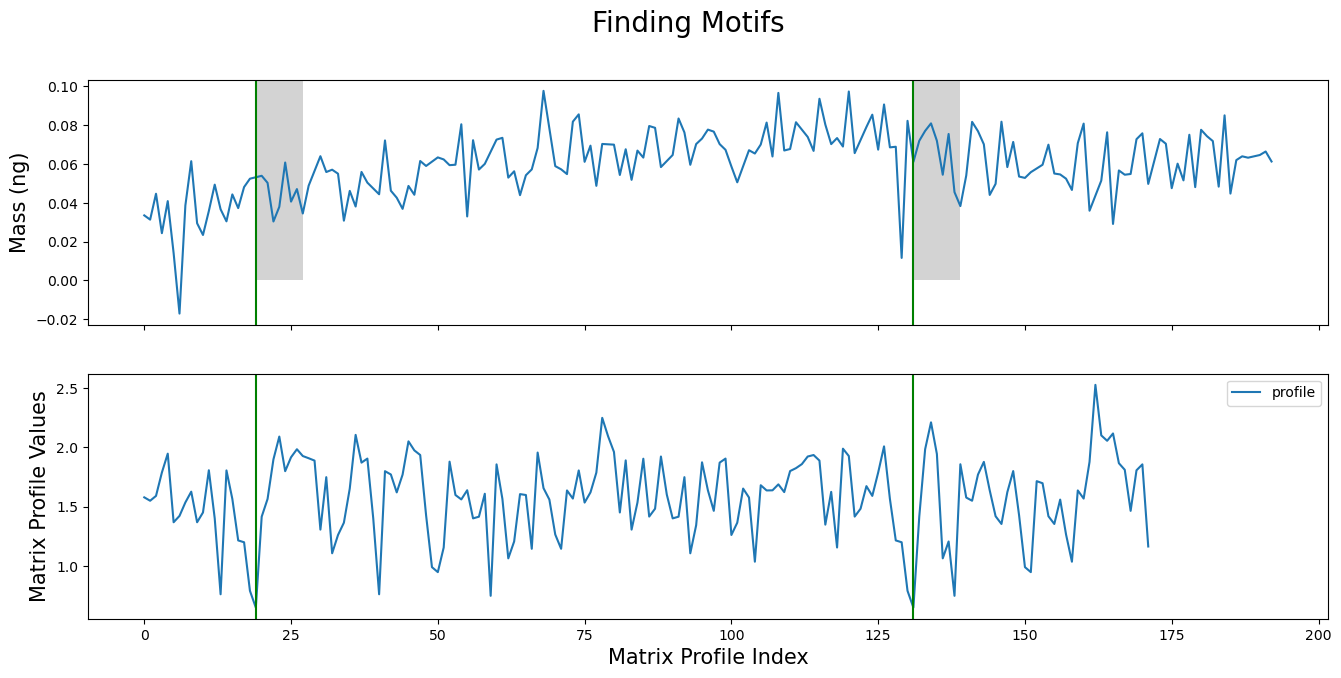

In [82]:
prof_df = mp_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,7), sharex=True)
graph1 = sns.lineplot(y=y, x=x, ax=ax[0])
graph2 = sns.lineplot(data=prof_df, ax=ax[1])

for idx in best_motif.index.to_list():
    graph1.axvline(x=idx, color="green")
    graph2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    graph1.add_patch(rect)

ax[0].set_xlabel('Matrix Profile Index', fontsize=15)
ax[0].set_ylabel('Mass (ng)', fontsize=15)

ax[1].set_xlabel('Matrix Profile Index', fontsize=15)
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

plt.suptitle('Finding Motifs', fontsize=20)


Text(0.5, 1.0, 'Motifs Comparison')

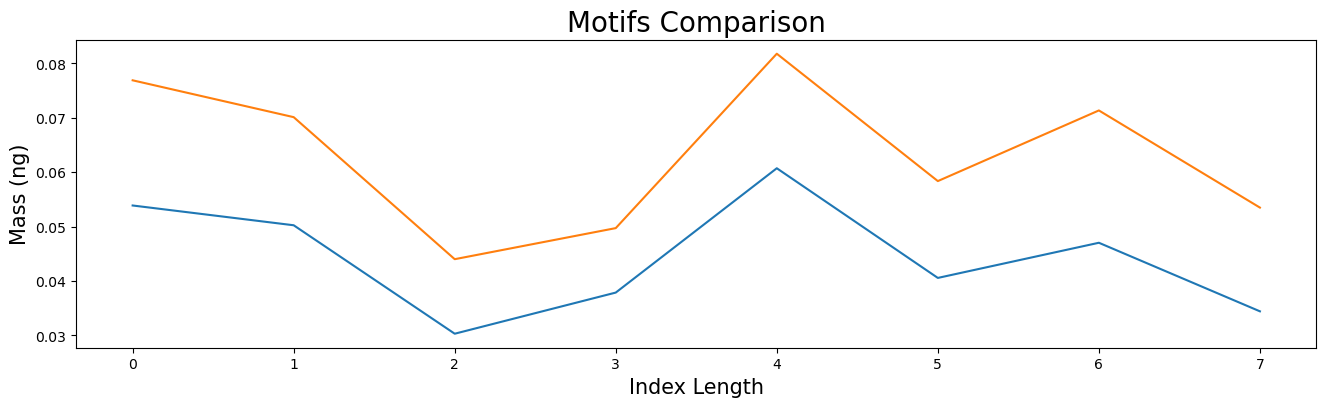

In [83]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in best_motif.index.to_list():
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)
    plt.xlabel('Index Length', fontsize=15)
    plt.ylabel('Mass (ng)', fontsize=15)

ax.set_title('Motifs Comparison', fontsize=20)

In [84]:
#for discord
m1 = 28
mp1 = stumpy.stump(df008Y1['mass'], m1)

In [85]:
mp_df1 = pd.DataFrame(mp1, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

In [86]:
discord = mp_df1[mp_df1['profile'] == mp_df1['profile'].max()]
discord

profile profile index left profile index right profile index
119  6.000156           108                108                 135

Text(0.5, 0.98, 'Findig a Discord')

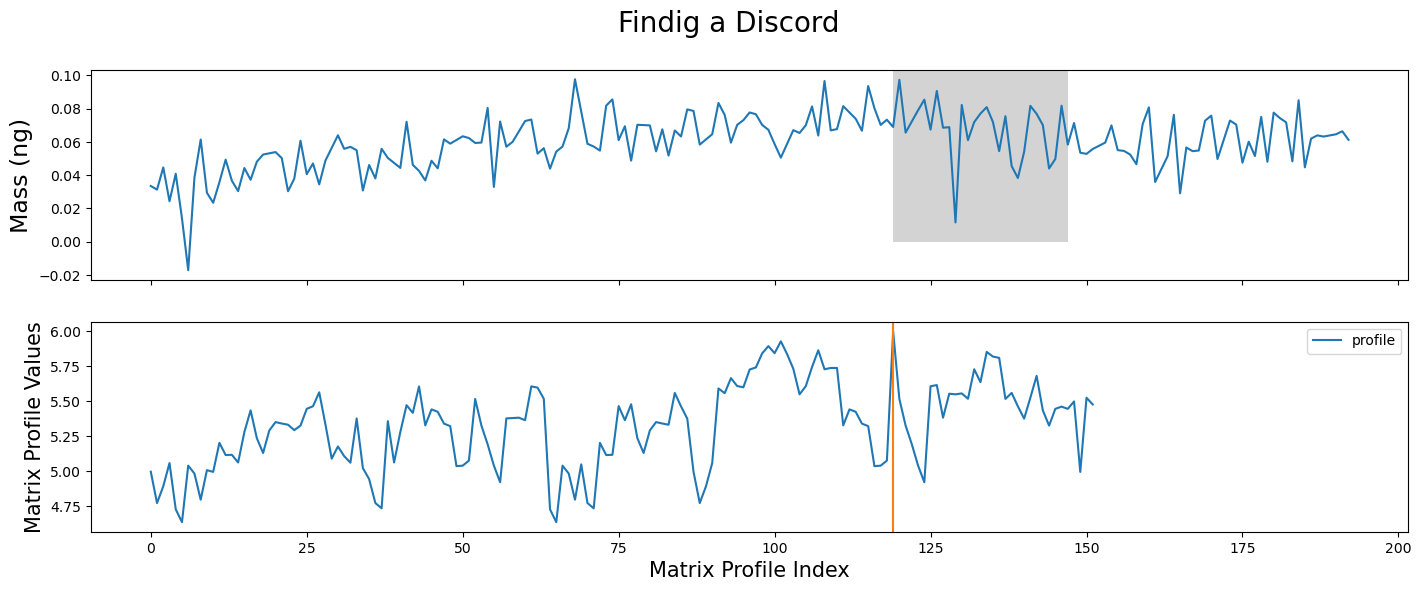

In [87]:
prof_df1 = mp_df1[['profile']] 
fig, ax = plt.subplots(2, figsize=(17,6), sharex=True)
sns.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[0].set_ylabel('Mass (ng)', fontsize=17) 
sns.lineplot(data=prof_df1, ax=ax[1])
ax[1].set_xlabel('Matrix Profile Index', fontsize=15) 
ax[1].set_ylabel('Matrix Profile Values', fontsize=15)

rect = Rectangle((discord.index[0], 0), m1, 40, facecolor="lightgrey")
ax[0].add_patch(rect)
ax[1].axvline(x=[discord.index[0]], color='C1')

plt.suptitle('Findig a Discord', fontsize=20)


In [88]:
nearest_neighbor_distance = mp1[discord.index, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is [6.000155572575722] units away


# Finding Similar Patterns in Datasets

Comparing the datasets that have similar trajectory and shape to find hidden similar patterns

# 20200812 (Yeast 1) and 20200814

In [89]:
m = 9
mp12 = stumpy.stump(T_A = df12['mass'],
                  m = m,
                  T_B = df14['mass'],
                  ignore_trivial = False)

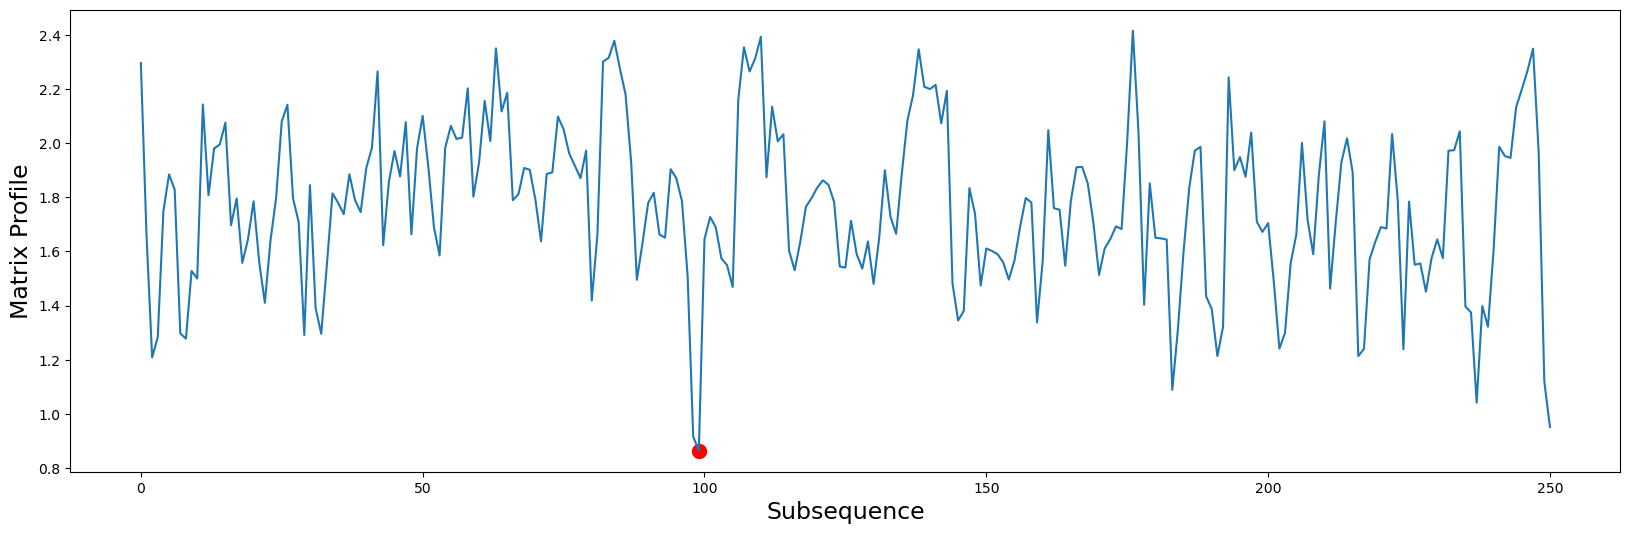

In [90]:
df12_motif_index = mp12[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df12_motif_index,
               mp12[df12_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp12[:,0])
plt.show()

In [91]:
df12_motif_index = mp12[:, 0].argmin()
print(f'The motif is located at index {df12_motif_index} of "20200812 (Yeast 1)"')

The motif is located at index 99 of "20200812 (Yeast 1)"


In [92]:
df14_motif_index = mp12[df12_motif_index, 1]
print(f'The motif is located at index {df14_motif_index} of "20200814"')

The motif is located at index 134 of "20200814"


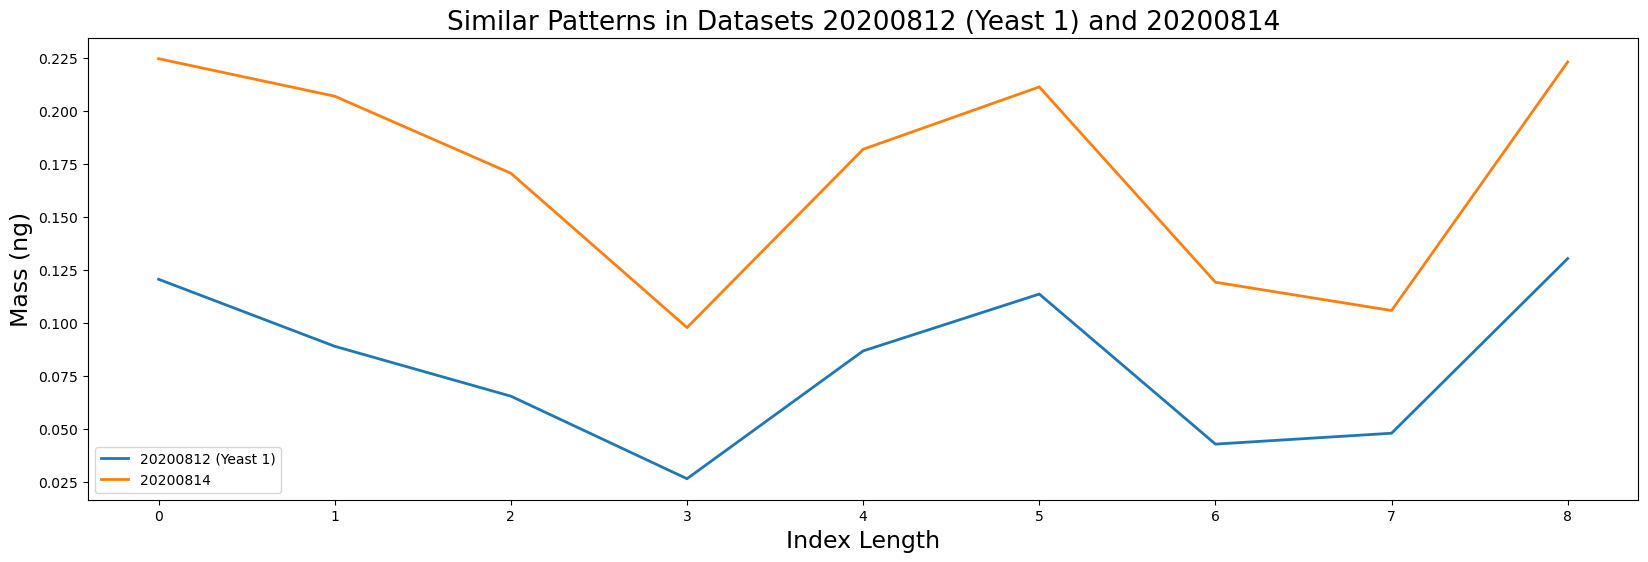

In [93]:
plt.plot(df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df14['mass'].iloc[df14_motif_index:df14_motif_index+m].values, label='20200814', linewidth=2)

plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20200814', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

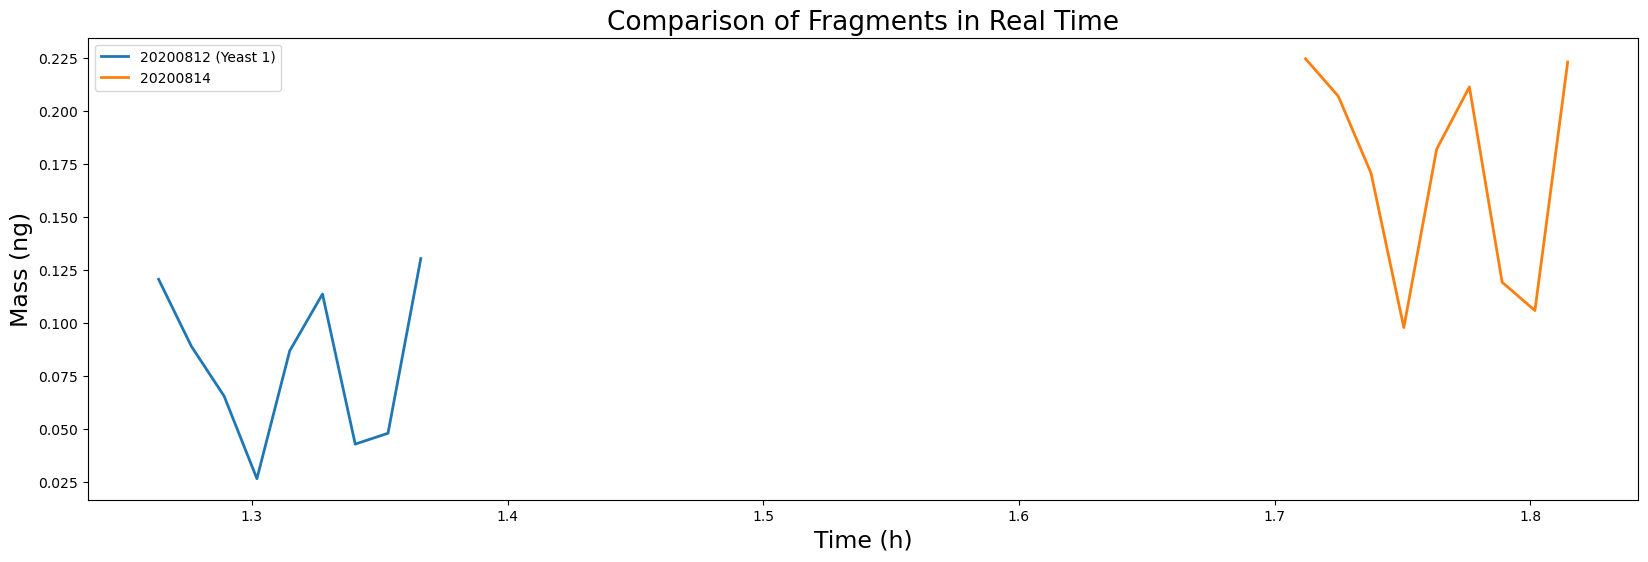

In [94]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df14['time'].iloc[df14_motif_index : df14_motif_index + m].values, df14['mass'].iloc[df14_motif_index : df14_motif_index + m].values, label='20200814', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

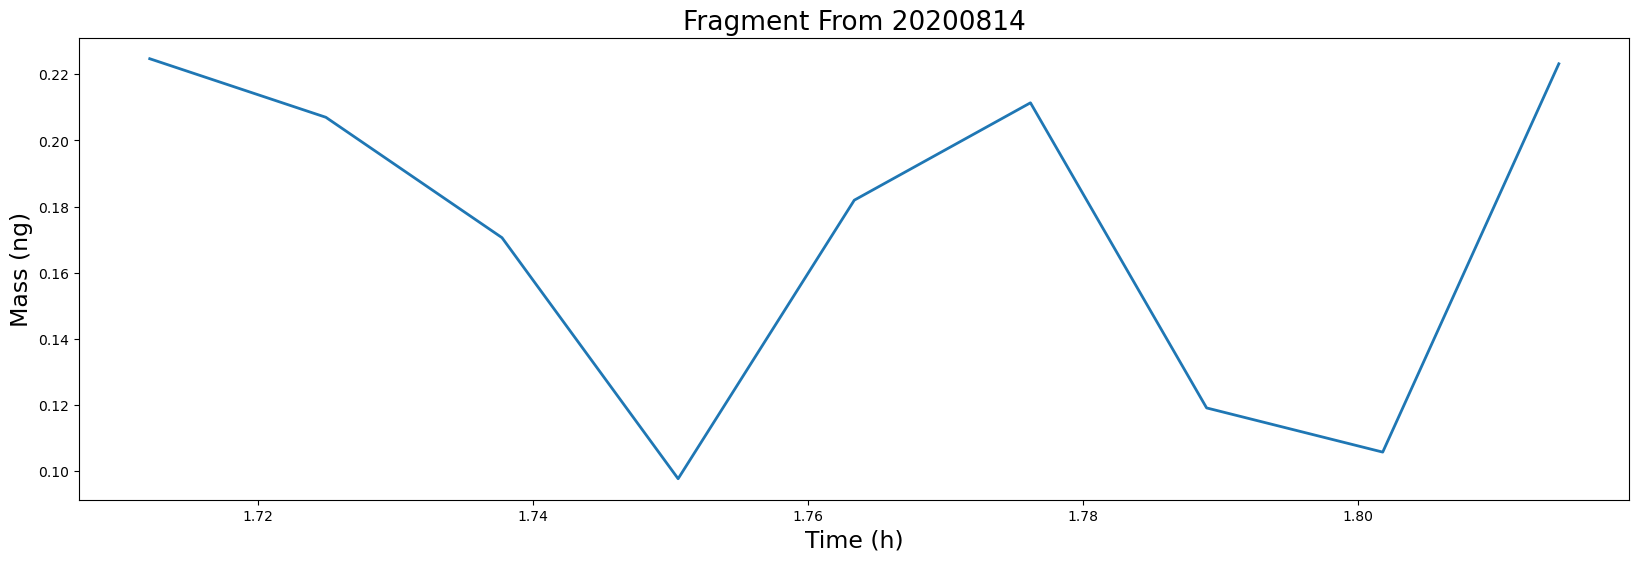

In [95]:
plt.plot(df14['time'].iloc[df14_motif_index : df14_motif_index + m].values, df14['mass'].iloc[df14_motif_index : df14_motif_index + m].values, label='20200814', linewidth=2)

plt.title('Fragment From 20200814', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

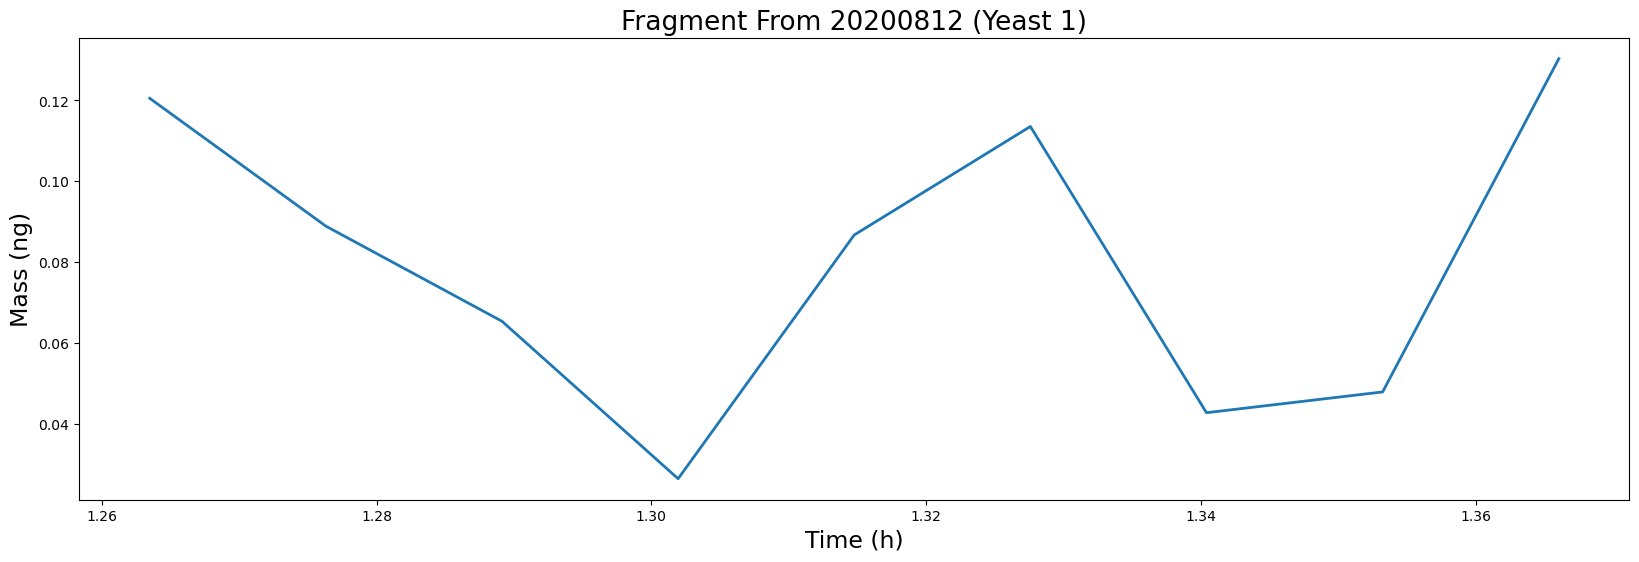

In [96]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200812 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

# 20200812 (Yeast 1) and 20200826

In [97]:
m = 9
mp12 = stumpy.stump(T_A = df12['mass'],
                  m = m,
                  T_B = df26['mass'],
                  ignore_trivial = False)

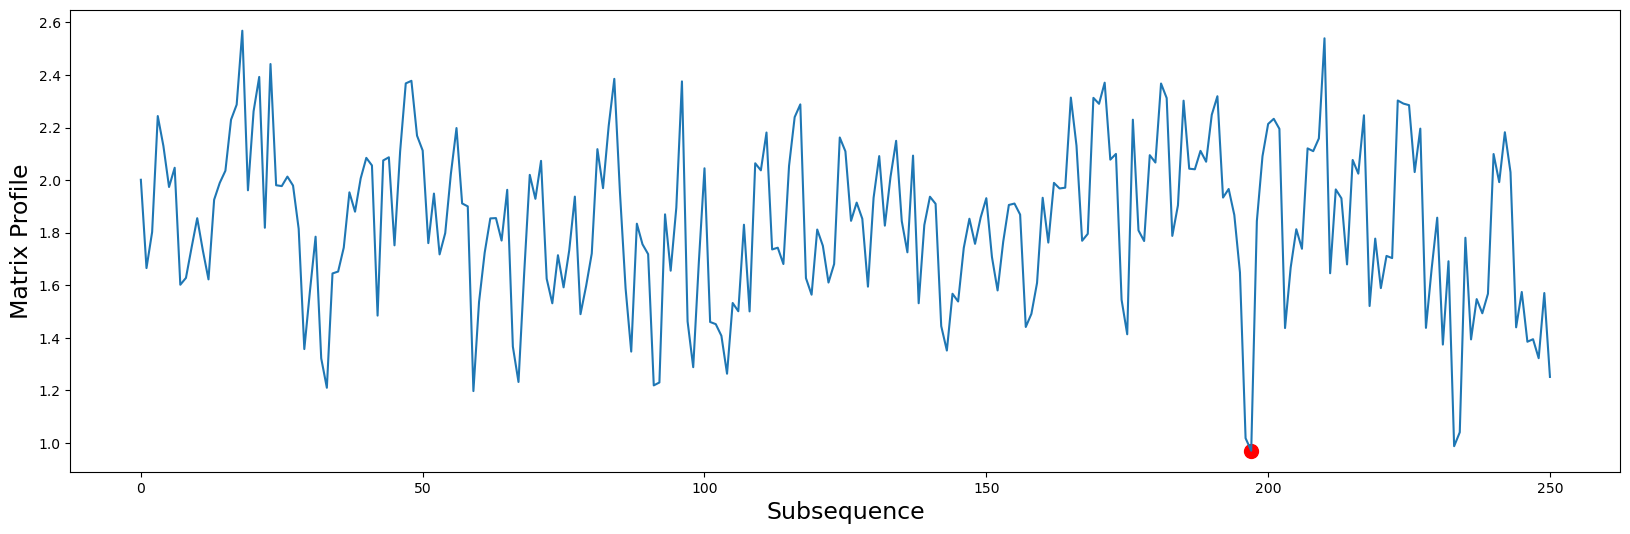

In [98]:
df12_motif_index = mp12[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df12_motif_index,
               mp12[df12_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp12[:,0])
plt.show()

In [99]:
df12_motif_index = mp12[:, 0].argmin()
print(f'The motif is located at index {df12_motif_index} of "20200812 (Yeast 1)"')

The motif is located at index 197 of "20200812 (Yeast 1)"


In [100]:
df26_motif_index = mp12[df12_motif_index, 1]
print(f'The motif is located at index {df26_motif_index} of "20200826"') 

The motif is located at index 72 of "20200826"


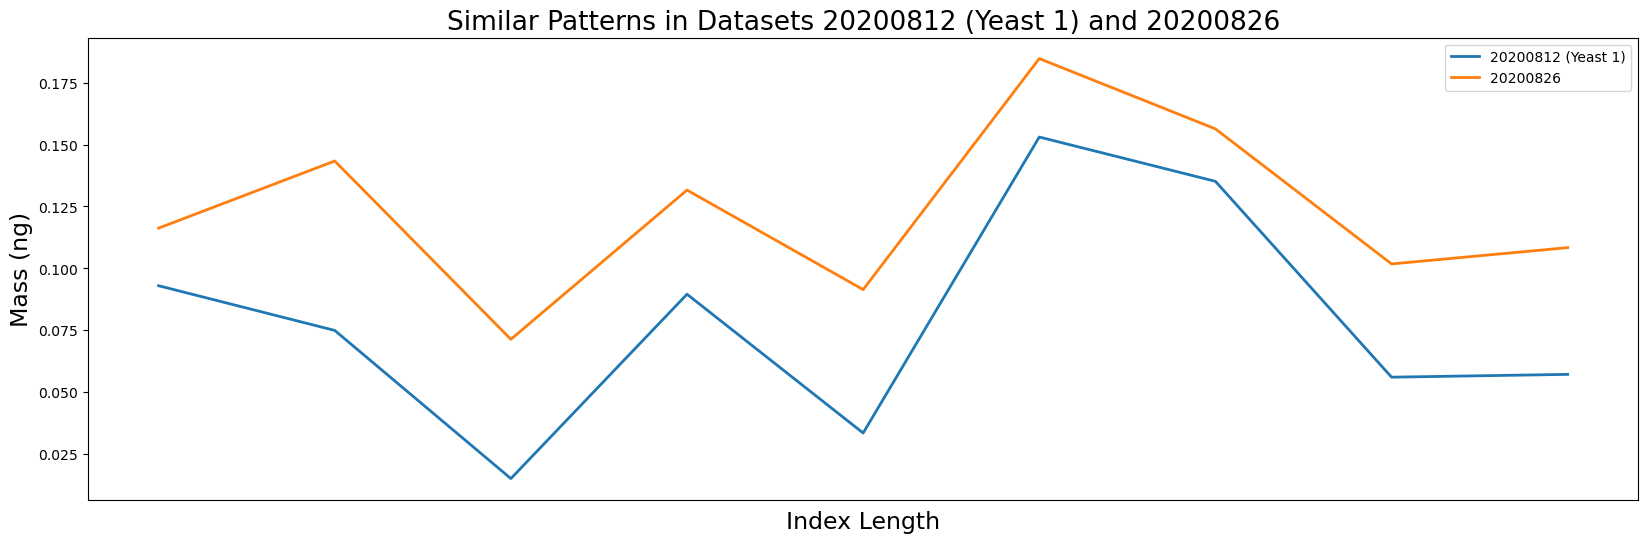

In [101]:
plt.plot(df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df26['mass'].iloc[df26_motif_index:df26_motif_index+m].values, label='20200826', linewidth=2)

plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20200826', fontsize=19)

plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()
plt.xticks([])

plt.show()


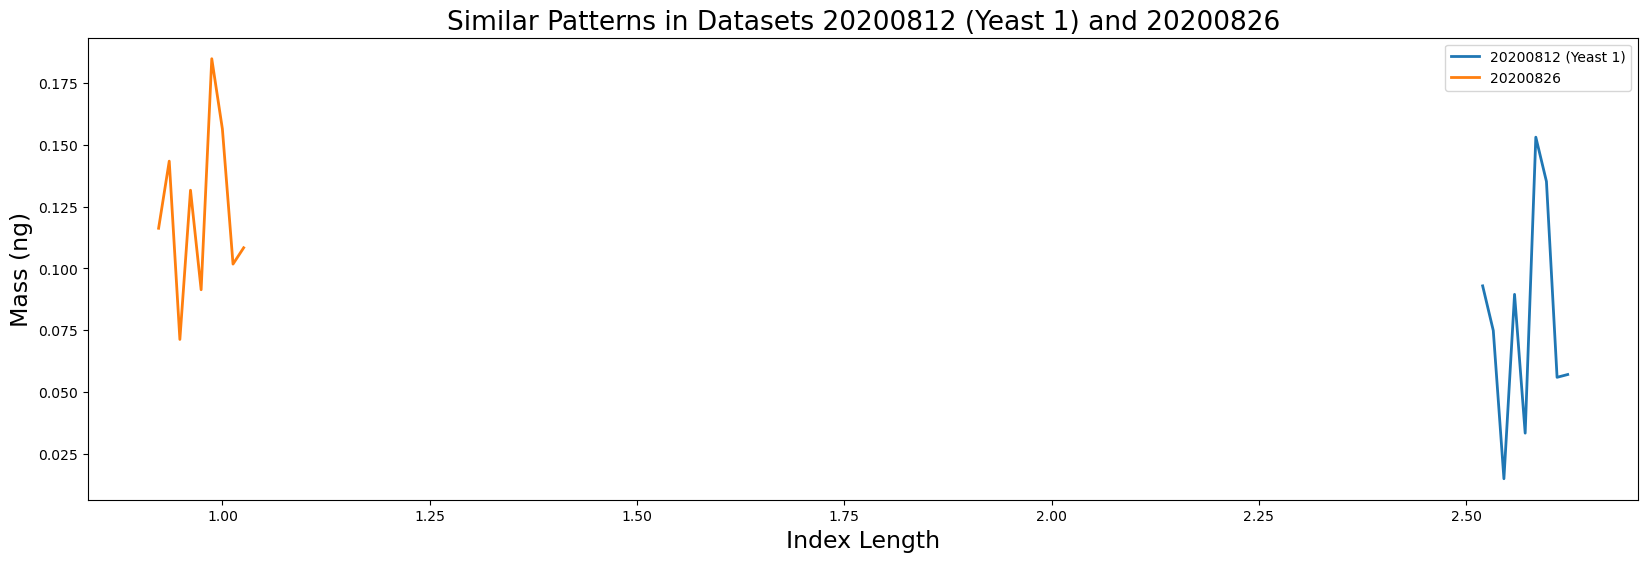

In [102]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df26['time'].iloc[df26_motif_index : df26_motif_index + m].values, df26['mass'].iloc[df26_motif_index : df26_motif_index + m].values, label='20200826', linewidth=2)

plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20200826', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)


plt.legend()

plt.show()


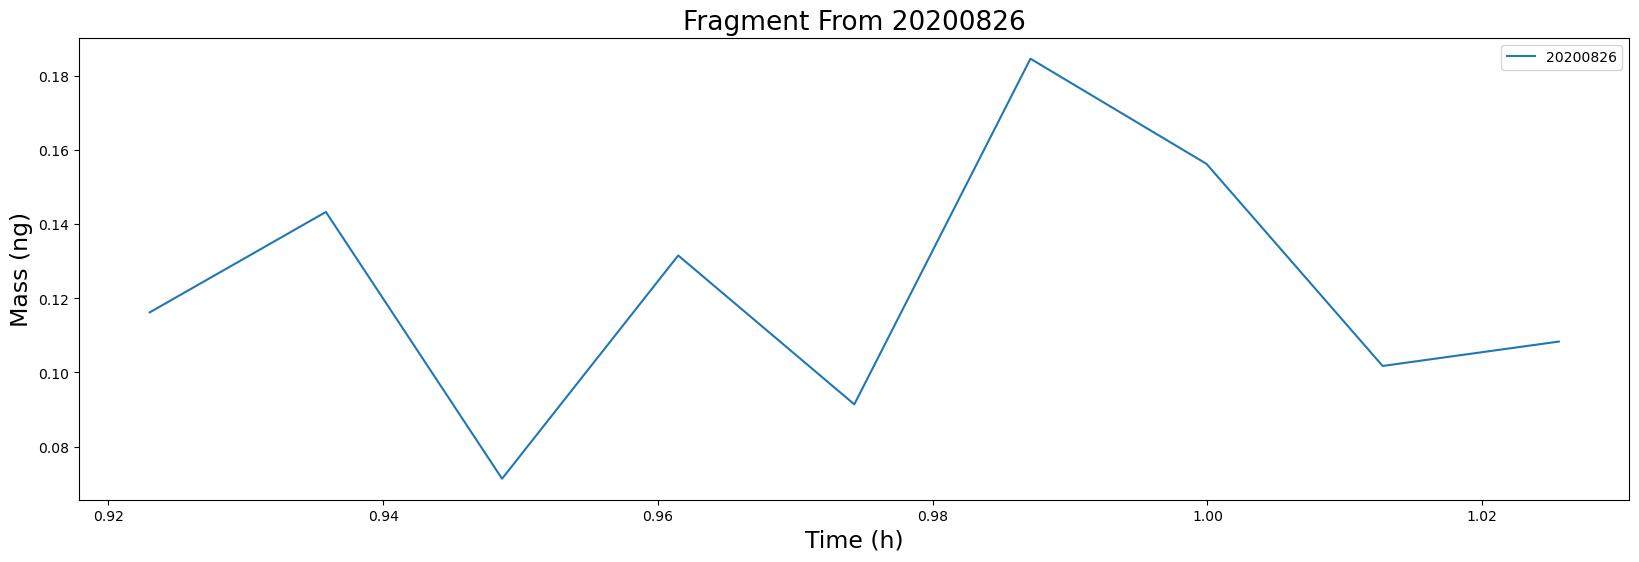

In [103]:
plt.plot(df26['time'].iloc[df26_motif_index : df26_motif_index + m].values, df26['mass'].iloc[df26_motif_index : df26_motif_index + m].values, label='20200826')

plt.title('Fragment From 20200826', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()

plt.show()


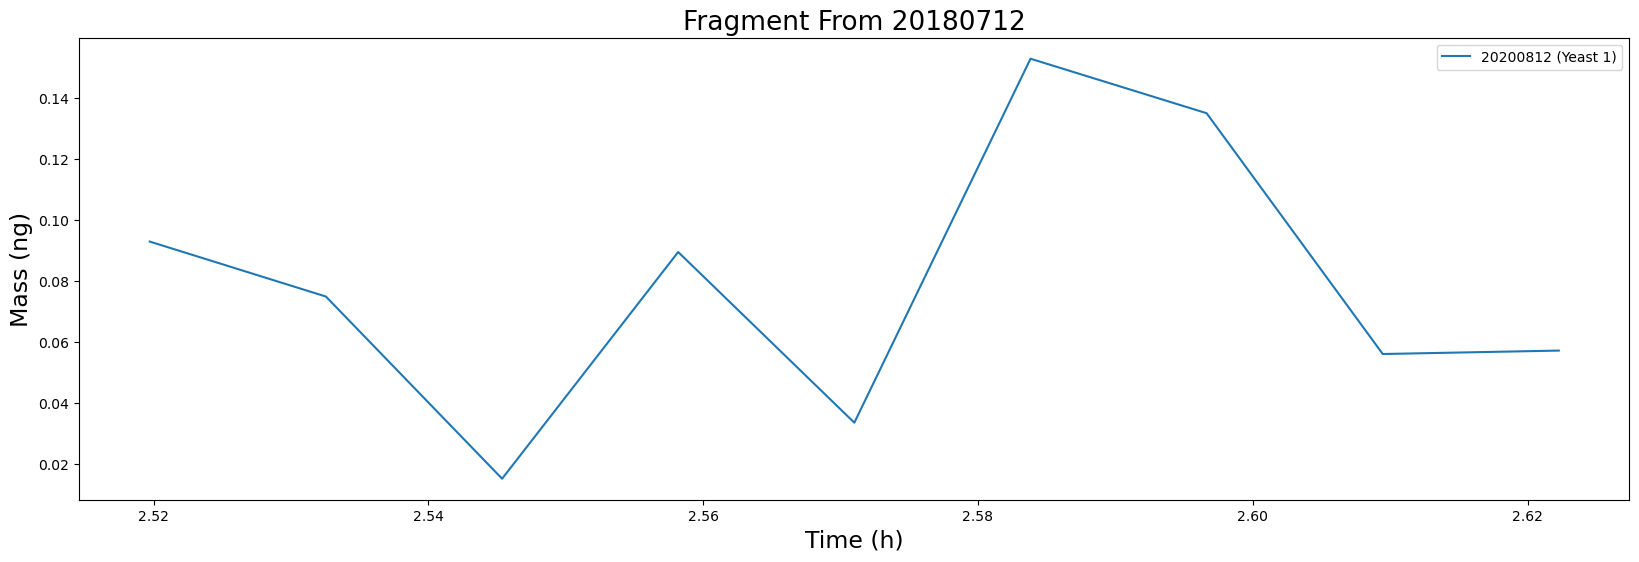

In [104]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)')

plt.title('Fragment From 20180712', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()


# 20200812 (Yeast 1) and 20200910 (Yeast 2)

In [105]:
m = 8
mp12 = stumpy.stump(T_A = df12['mass'],
                  m = m,
                  T_B = df10Y2['mass'],
                  ignore_trivial = False)

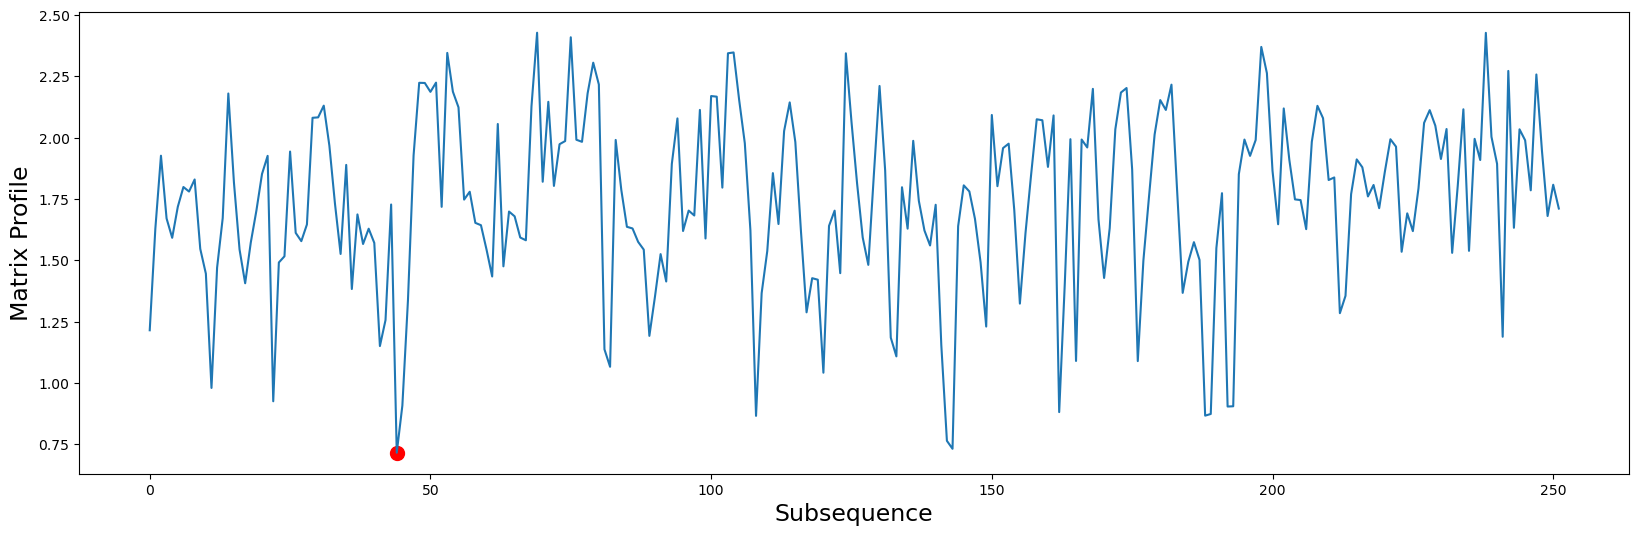

In [106]:
df12_motif_index = mp12[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df12_motif_index,
               mp12[df12_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp12[:,0])
plt.show()

In [107]:
df12_motif_index = mp12[:, 0].argmin()
print(f'The motif is located at index {df12_motif_index} of "20200812 (Yeast 1)"')

The motif is located at index 44 of "20200812 (Yeast 1)"


In [108]:
df10Y2_motif_index = mp12[df12_motif_index, 1]
print(f'The motif is located at index {df10Y2_motif_index} of "20200910 (Yeast 2)"')

The motif is located at index 53 of "20200910 (Yeast 2)"


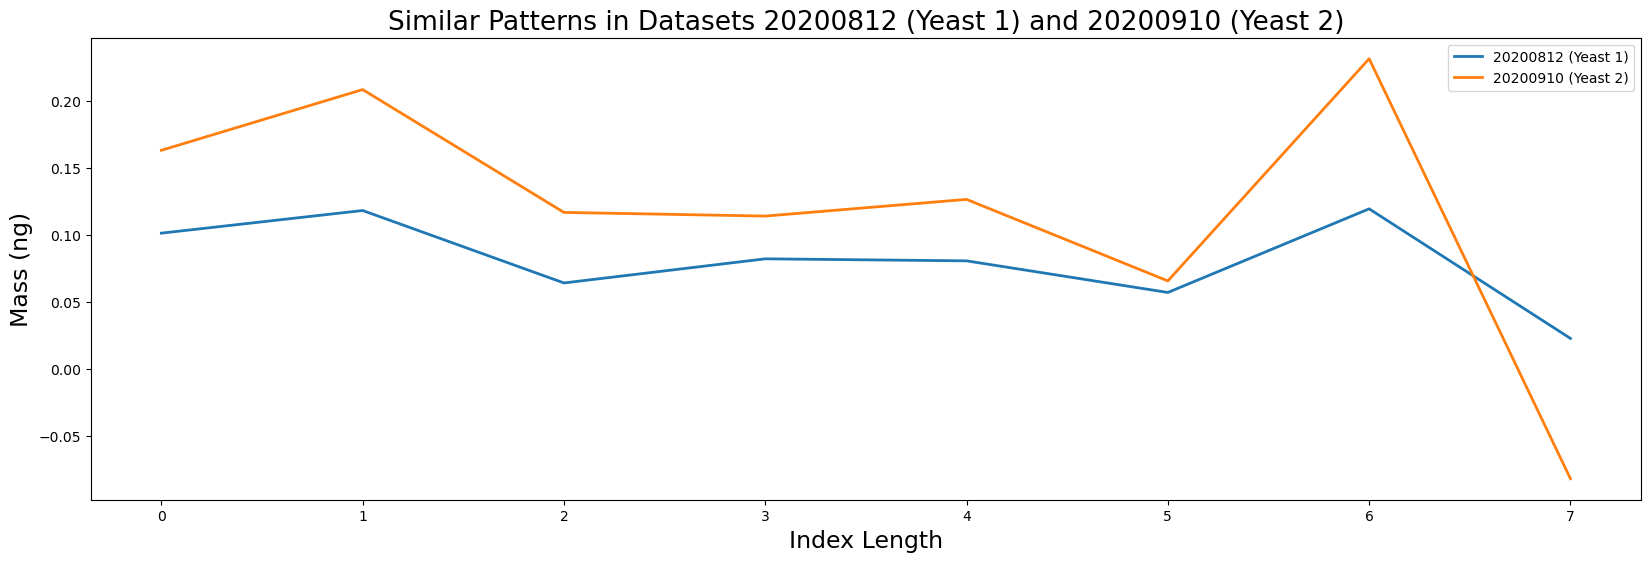

In [109]:
plt.plot(df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df10Y2['mass'].iloc[df10Y2_motif_index:df10Y2_motif_index+m].values, label='20200910 (Yeast 2)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20200910 (Yeast 2)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

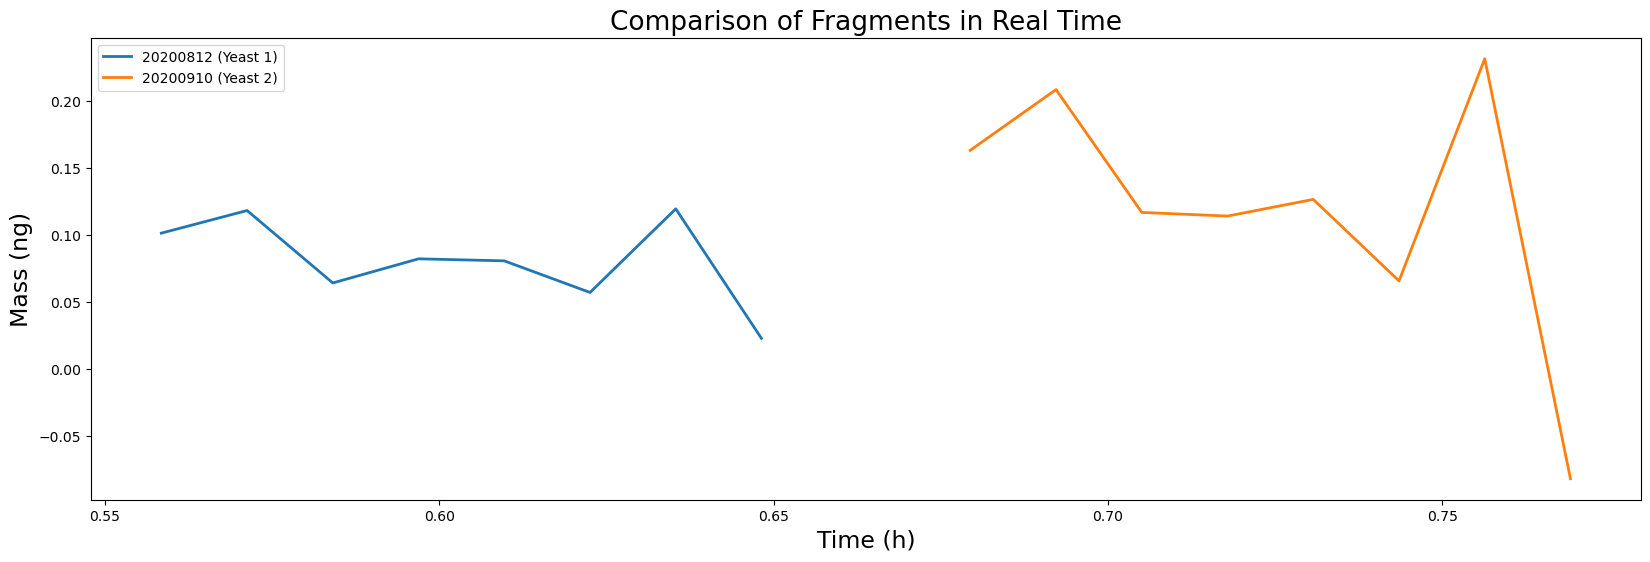

In [110]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df10Y2['time'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, df10Y2['mass'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, label='20200910 (Yeast 2)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.legend()
plt.show()

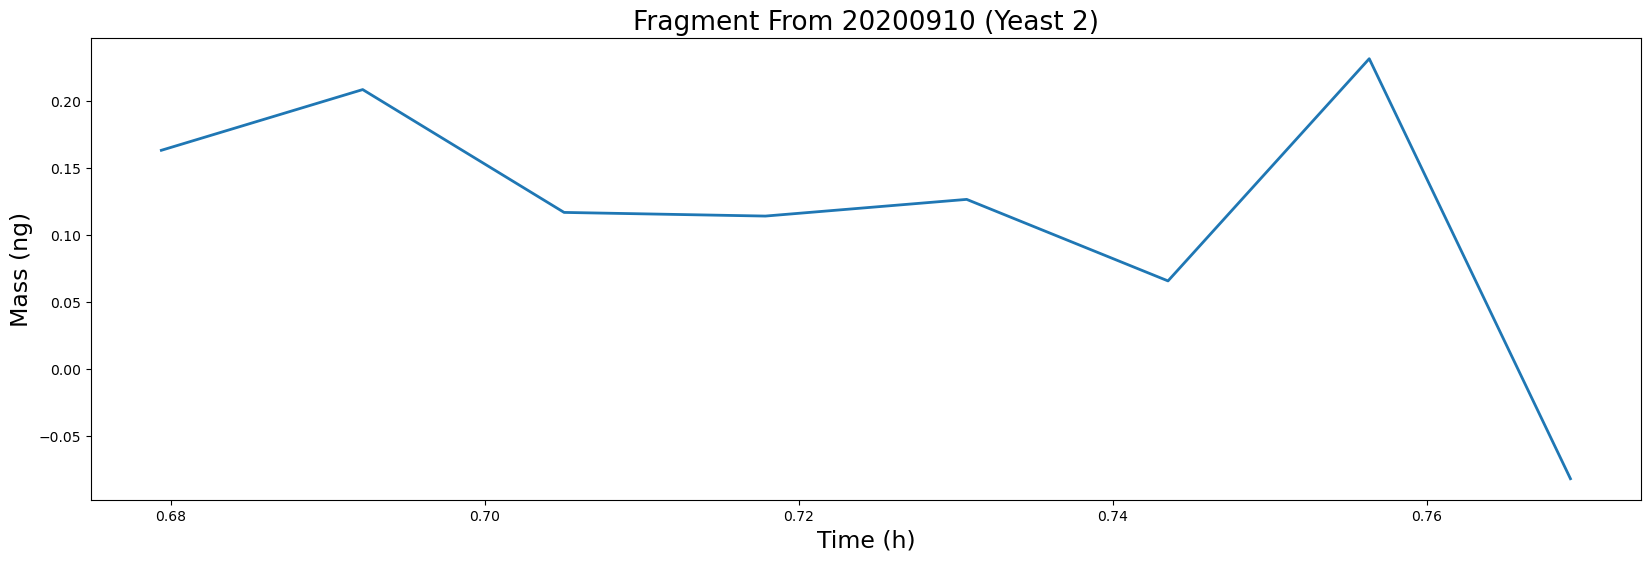

In [111]:
plt.plot(df10Y2['time'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, df10Y2['mass'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, label='20200910 (Yeast 2)', linewidth=2)
plt.title('Fragment From 20200910 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

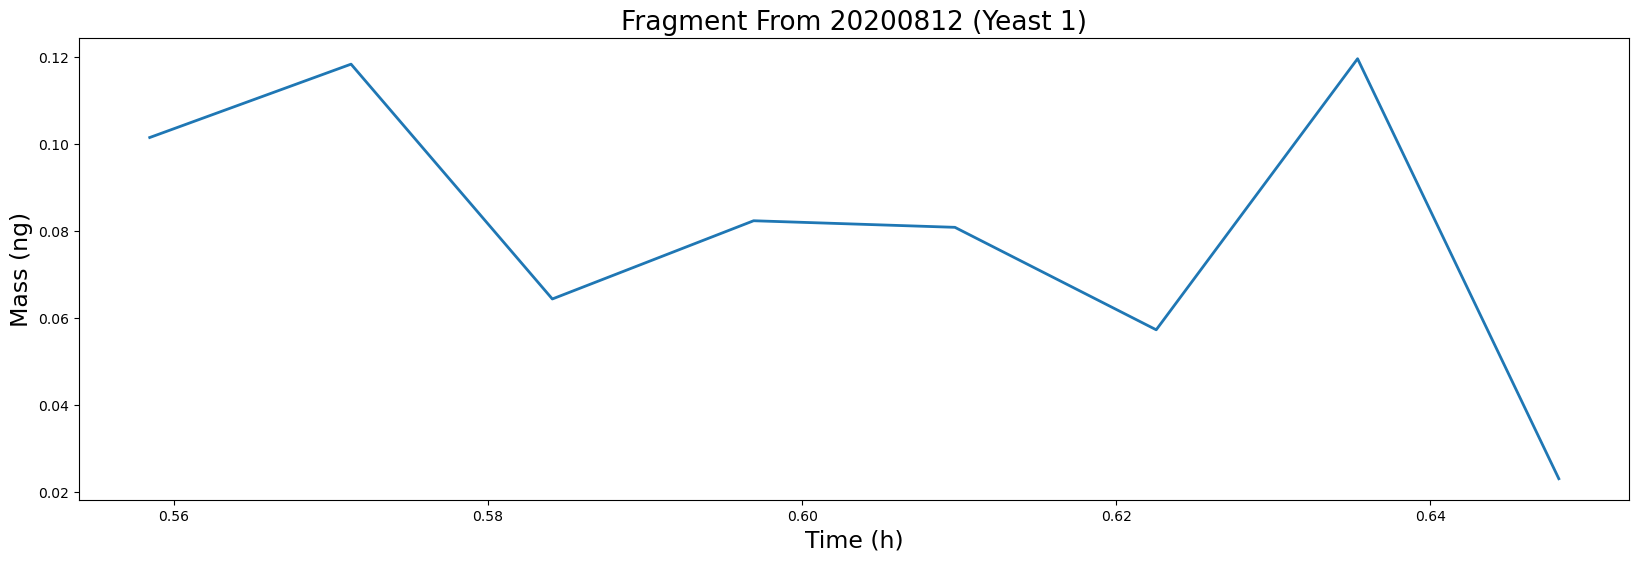

In [112]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)

plt.title('Fragment From 20200812 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200812 (Yeast 1) and 20200911 (Yeast 2)

In [113]:
m = 8
mp12 = stumpy.stump(T_A = df12['mass'],
                  m = m,
                  T_B = df11Y2['mass'],
                  ignore_trivial = False)

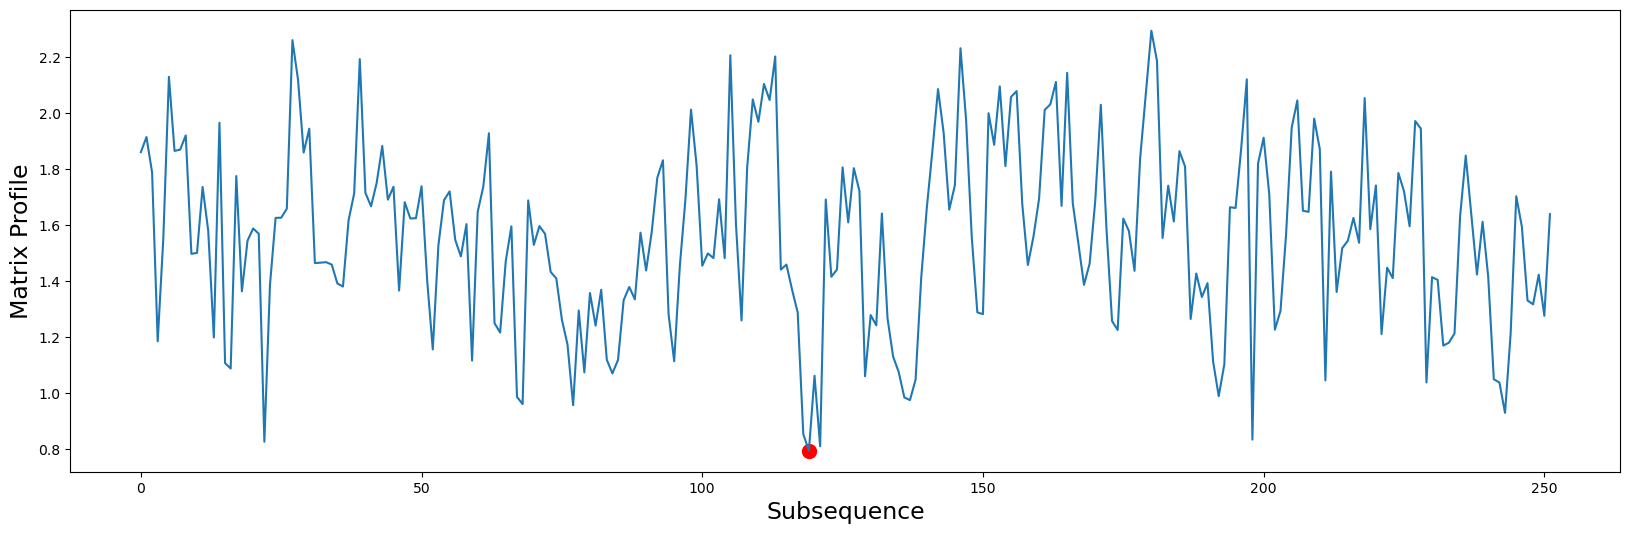

In [114]:
df12_motif_index = mp12[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df12_motif_index,
               mp12[df12_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp12[:,0])
plt.show()

In [115]:
df12_motif_index = mp12[:, 0].argmin()
print(f'The motif is located at index {df12_motif_index} of "20200812 (Yeast 1)"')

The motif is located at index 119 of "20200812 (Yeast 1)"


In [116]:
df11Y2_motif_index = mp12[df12_motif_index, 1]
print(f'The motif is located at index {df11Y2_motif_index} of "20200911 (Yeast 2)"')

The motif is located at index 52 of "20200911 (Yeast 2)"


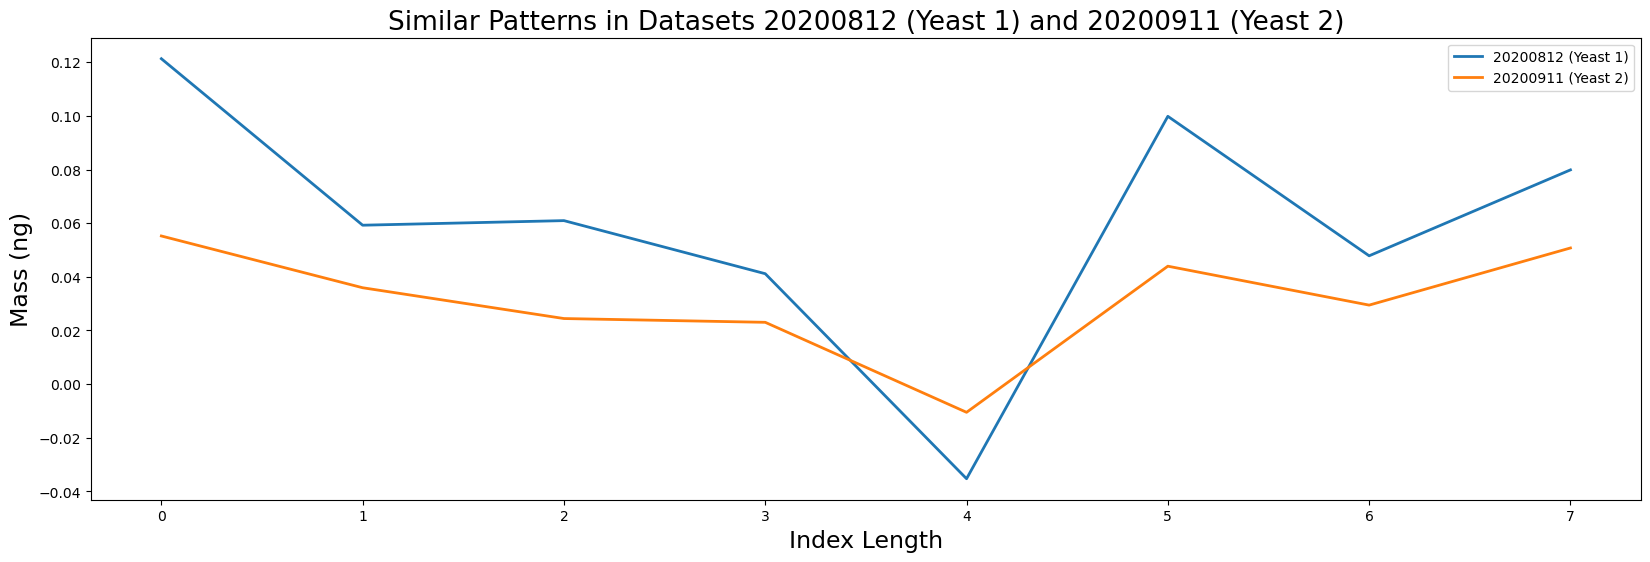

In [117]:
plt.plot(df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df11Y2['mass'].iloc[df11Y2_motif_index:df11Y2_motif_index+m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20200911 (Yeast 2)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

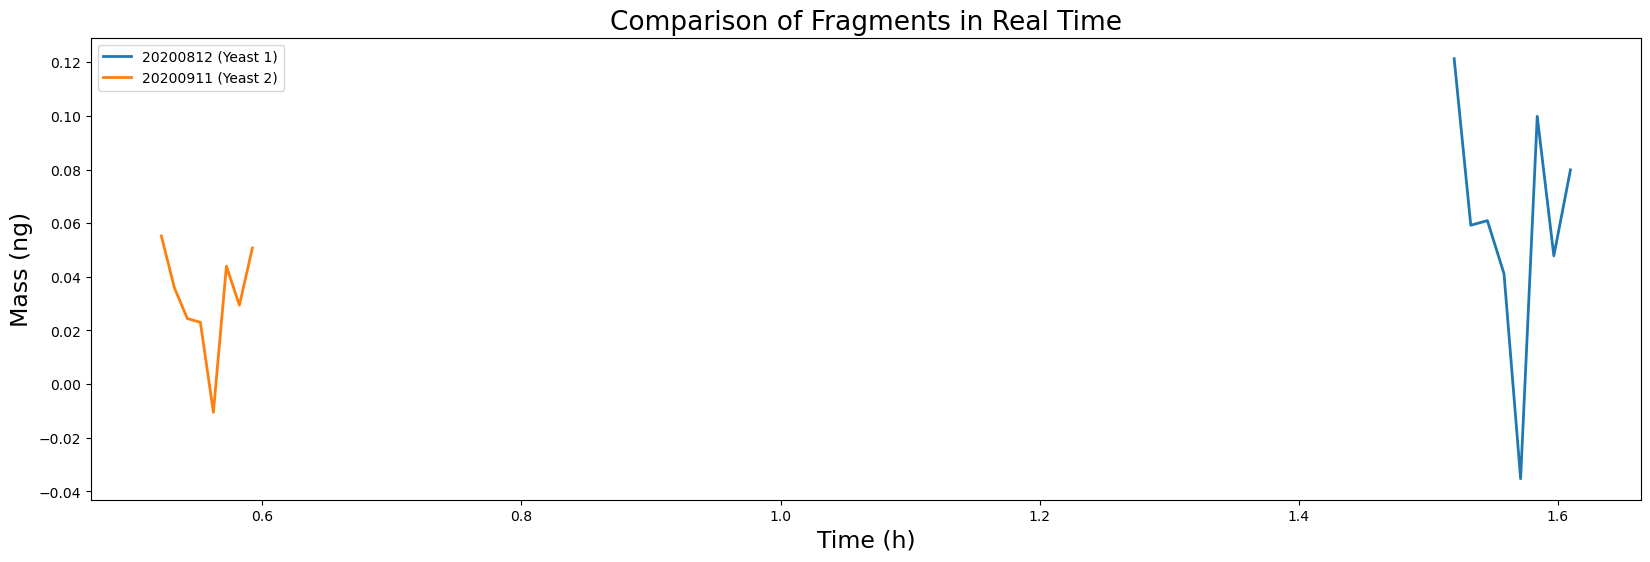

In [118]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

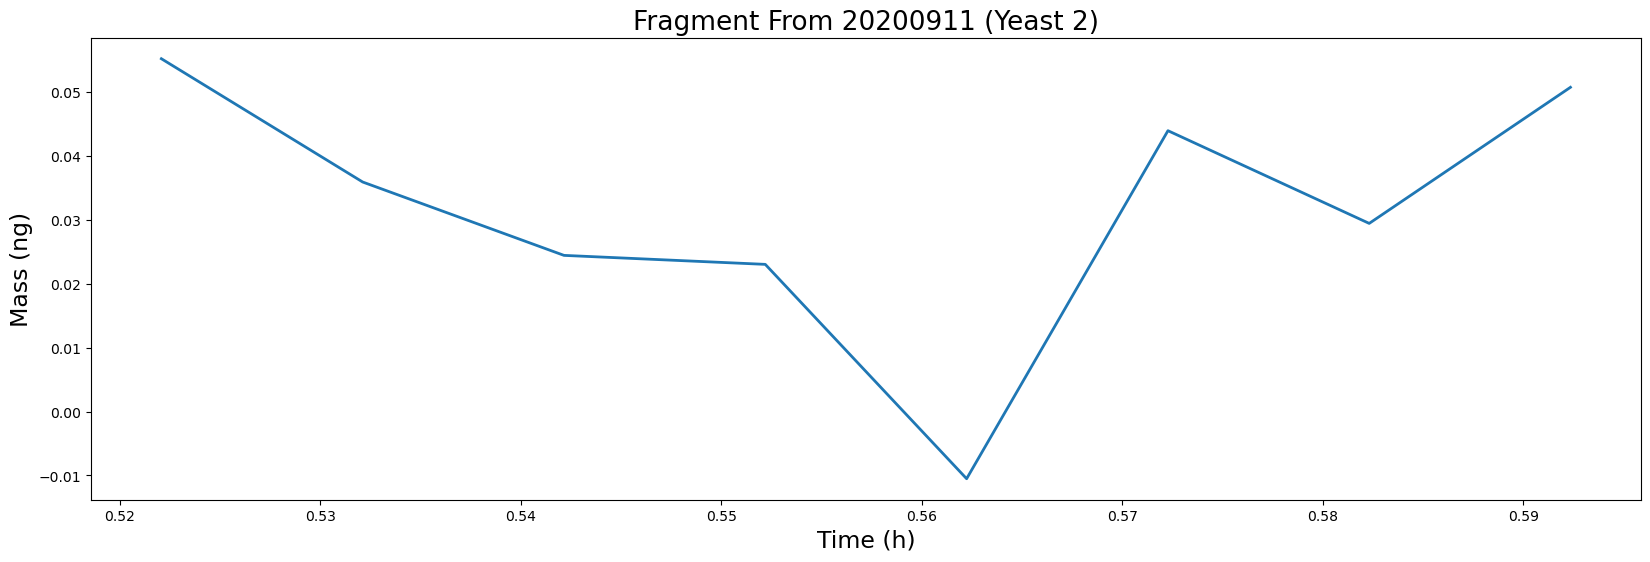

In [119]:
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)
plt.title('Fragment From 20200911 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

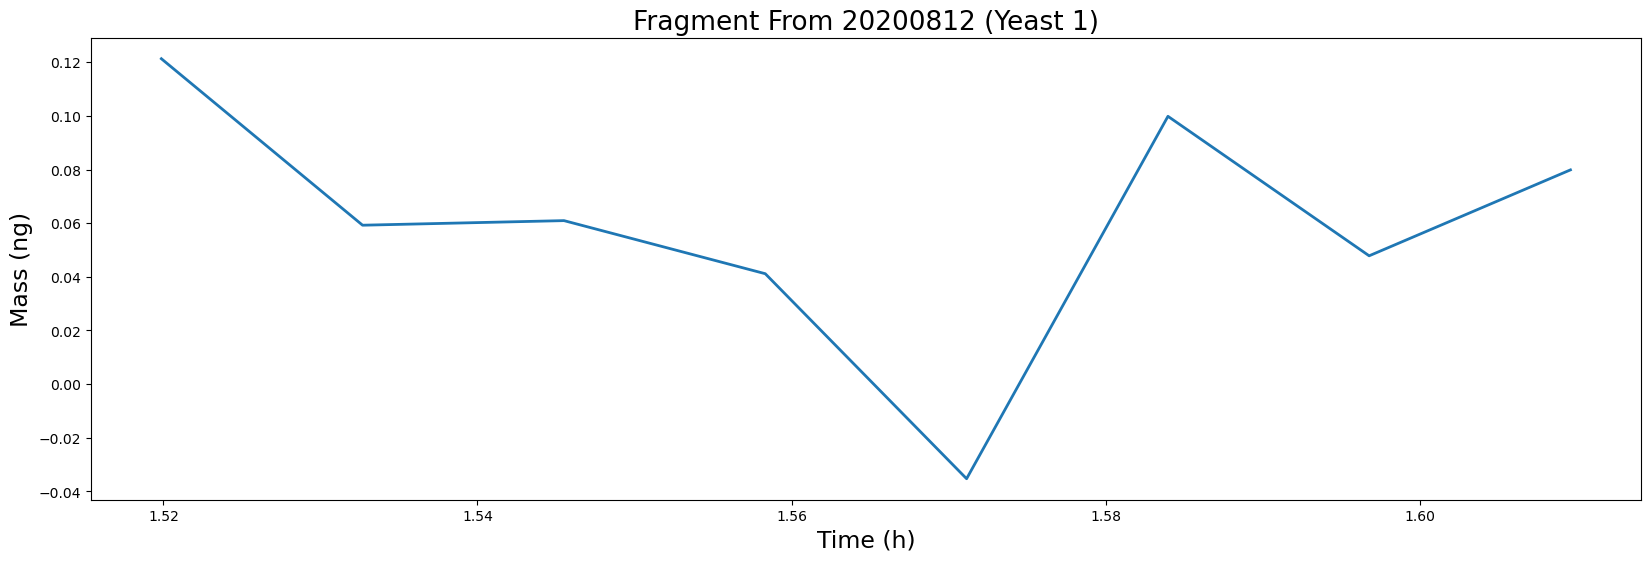

In [120]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20200812 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200812 (Yeast 1) and 20200924

In [121]:
m = 9
mp12 = stumpy.stump(T_A = df12['mass'],
                  m = m,
                  T_B = df24Y2['mass'],
                  ignore_trivial = False)

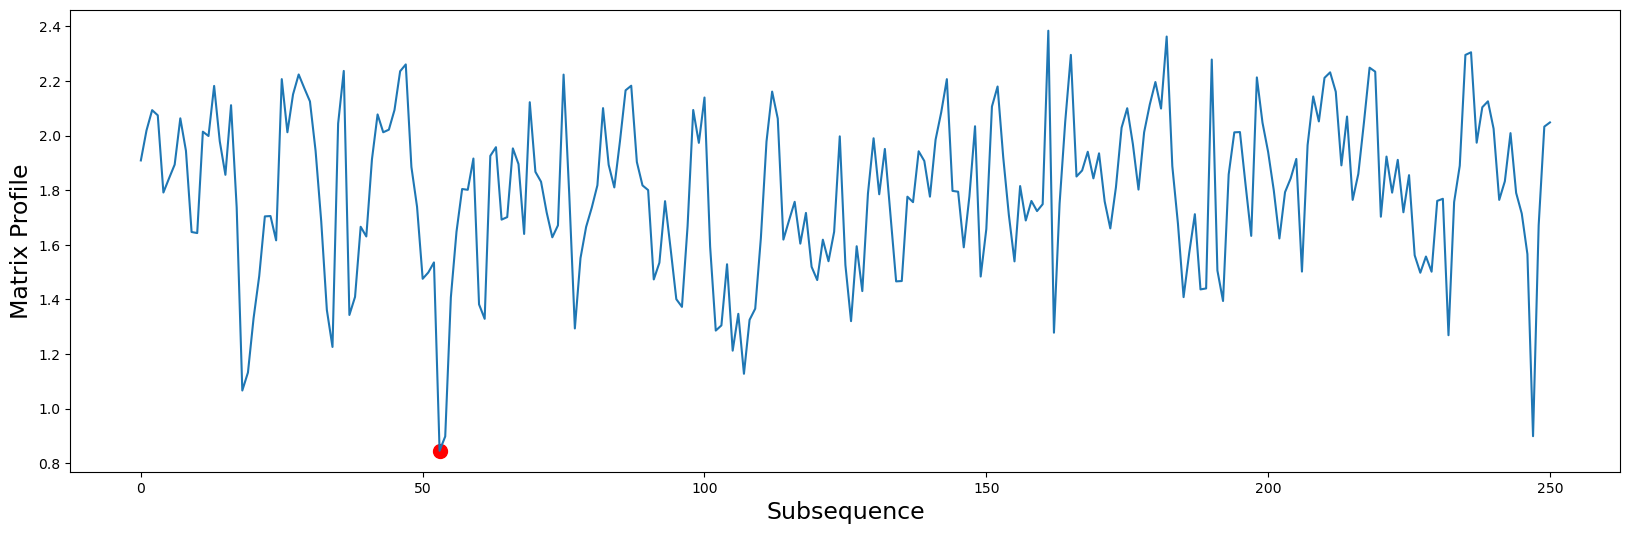

In [122]:
df12_motif_index = mp12[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df12_motif_index,
               mp12[df12_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp12[:,0])
plt.show()

In [123]:
df12_motif_index = mp12[:, 0].argmin()
print(f'The motif is located at index {df12_motif_index} of "20200812 (Yeast 1)"')

The motif is located at index 53 of "20200812 (Yeast 1)"


In [124]:
df24Y2_motif_index = mp12[df12_motif_index, 1]
print(f'The motif is located at index {df24Y2_motif_index} of "20200924"')

The motif is located at index 30 of "20200924"


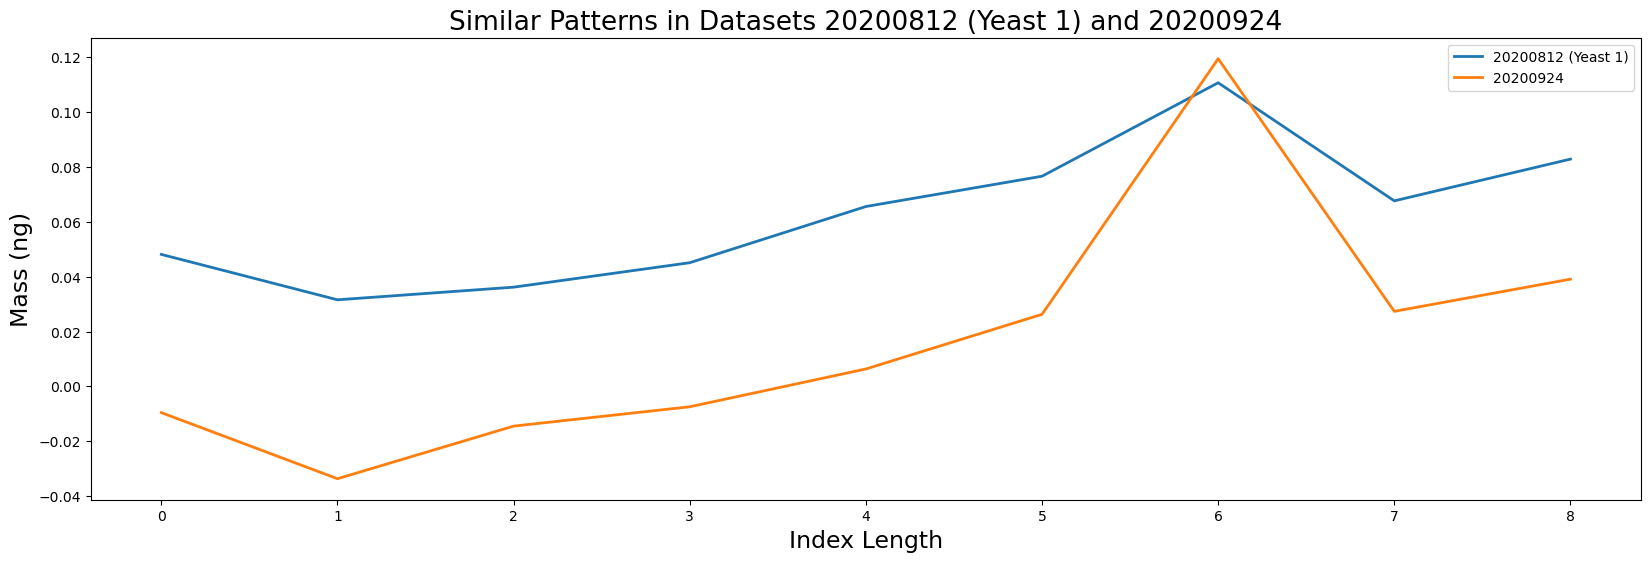

In [125]:
                                
plt.plot(df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df24Y2['mass'].iloc[df24Y2_motif_index:df24Y2_motif_index+m].values, label='20200924', linewidth=2)

plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20200924', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()


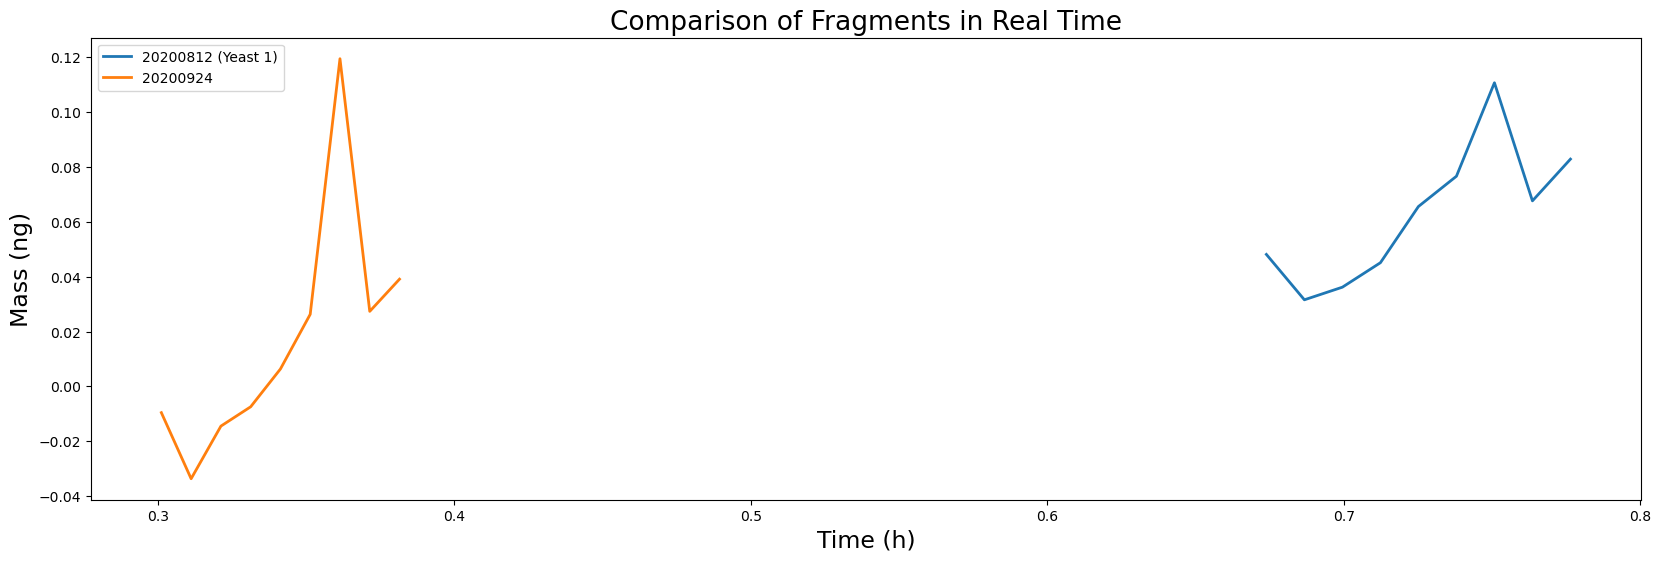

In [126]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

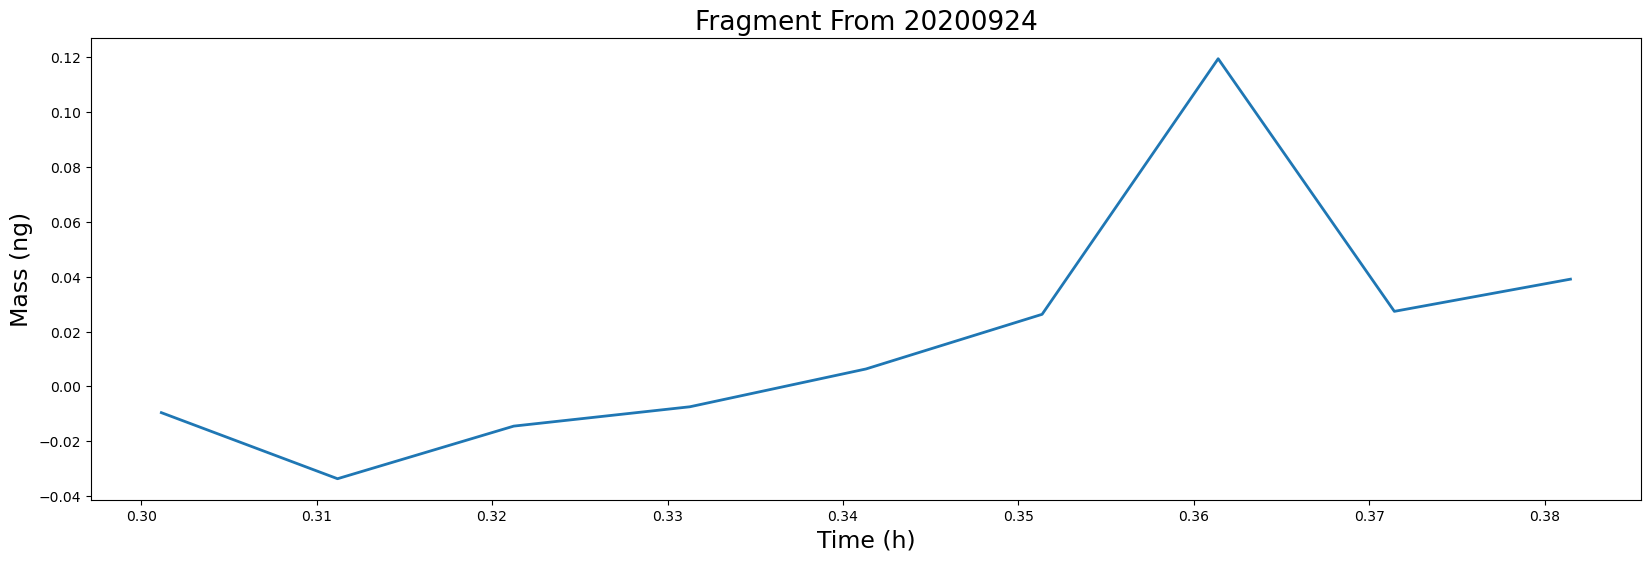

In [127]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.title('Fragment From 20200924', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

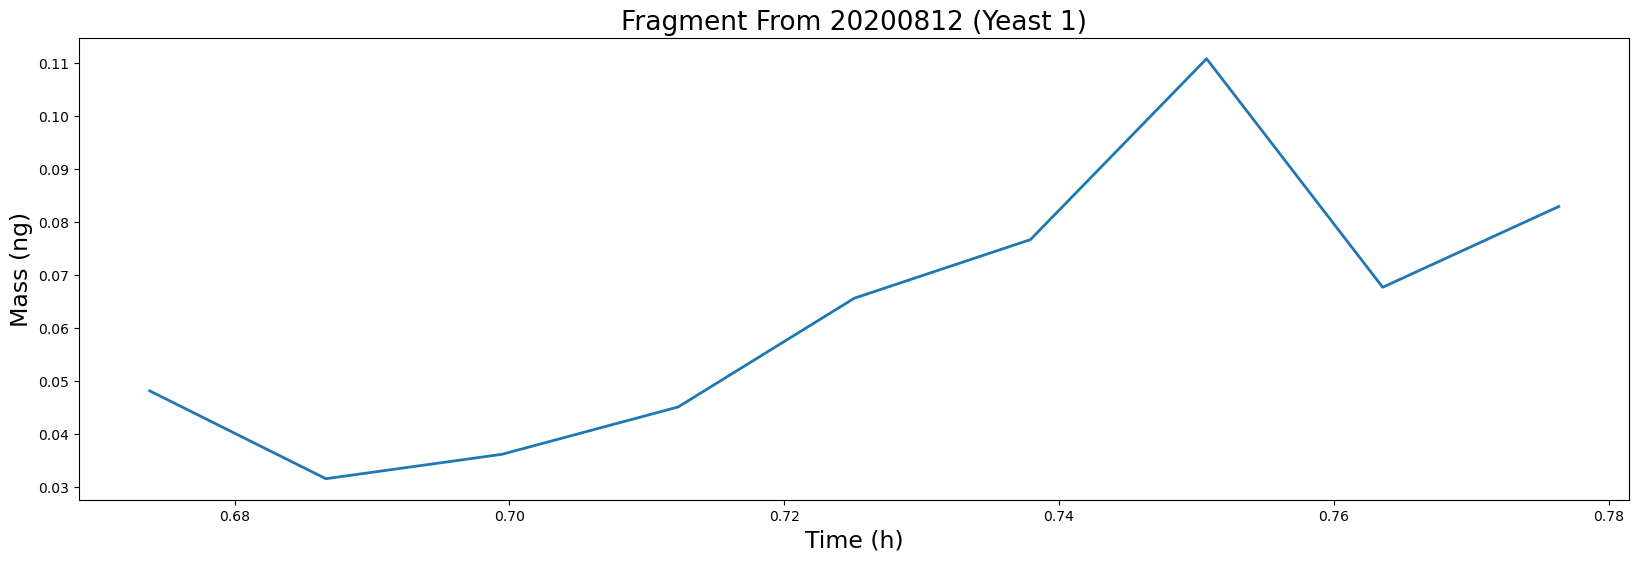

In [128]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20200812 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200812 (Yeast 1) and 20201008 (Yeast 1)

In [129]:
m = 9
mp12 = stumpy.stump(T_A = df12['mass'],
                  m = m,
                  T_B = df008Y1['mass'],
                  ignore_trivial = False)

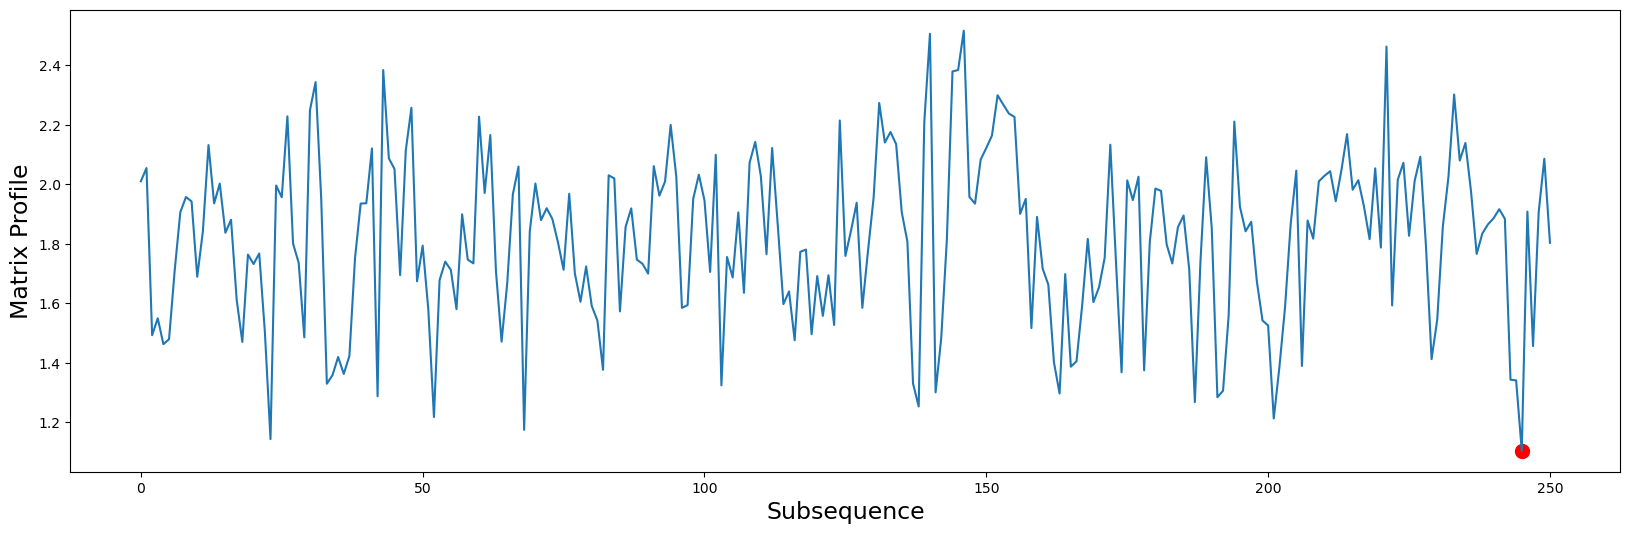

In [130]:
df12_motif_index = mp12[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df12_motif_index,
               mp12[df12_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp12[:,0])
plt.show()

In [131]:
df12_motif_index = mp12[:, 0].argmin()
print(f'The motif is located at index {df12_motif_index} of "20200812 (Yeast 1)"')

The motif is located at index 245 of "20200812 (Yeast 1)"


In [132]:
df008Y1_motif_index = mp12[df12_motif_index, 1]
print(f'The motif is located at index {df008Y1_motif_index} of "20201008 (Yeast 1)"')

The motif is located at index 35 of "20201008 (Yeast 1)"


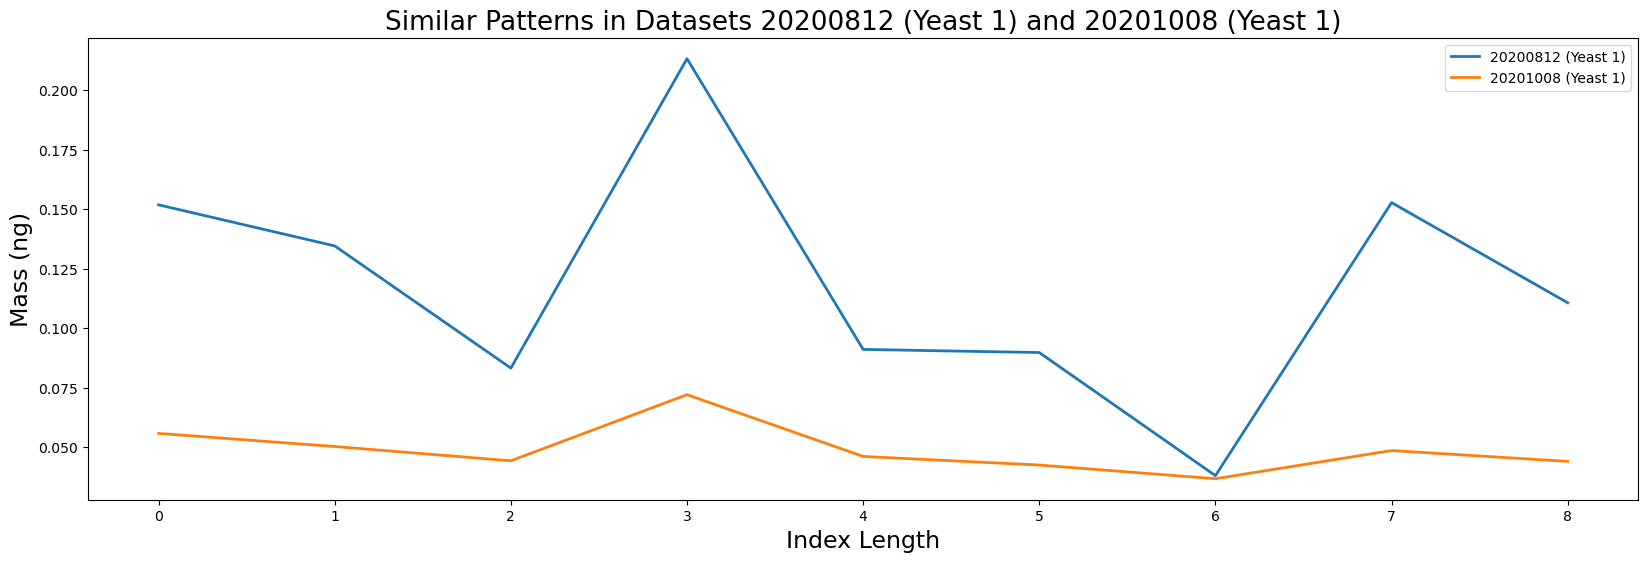

In [133]:
plt.plot(df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df008Y1['mass'].iloc[df008Y1_motif_index:df008Y1_motif_index+m].values, label='20201008 (Yeast 1)', linewidth=2)
plt.title('Similar Patterns in Datasets 20200812 (Yeast 1) and 20201008 (Yeast 1)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

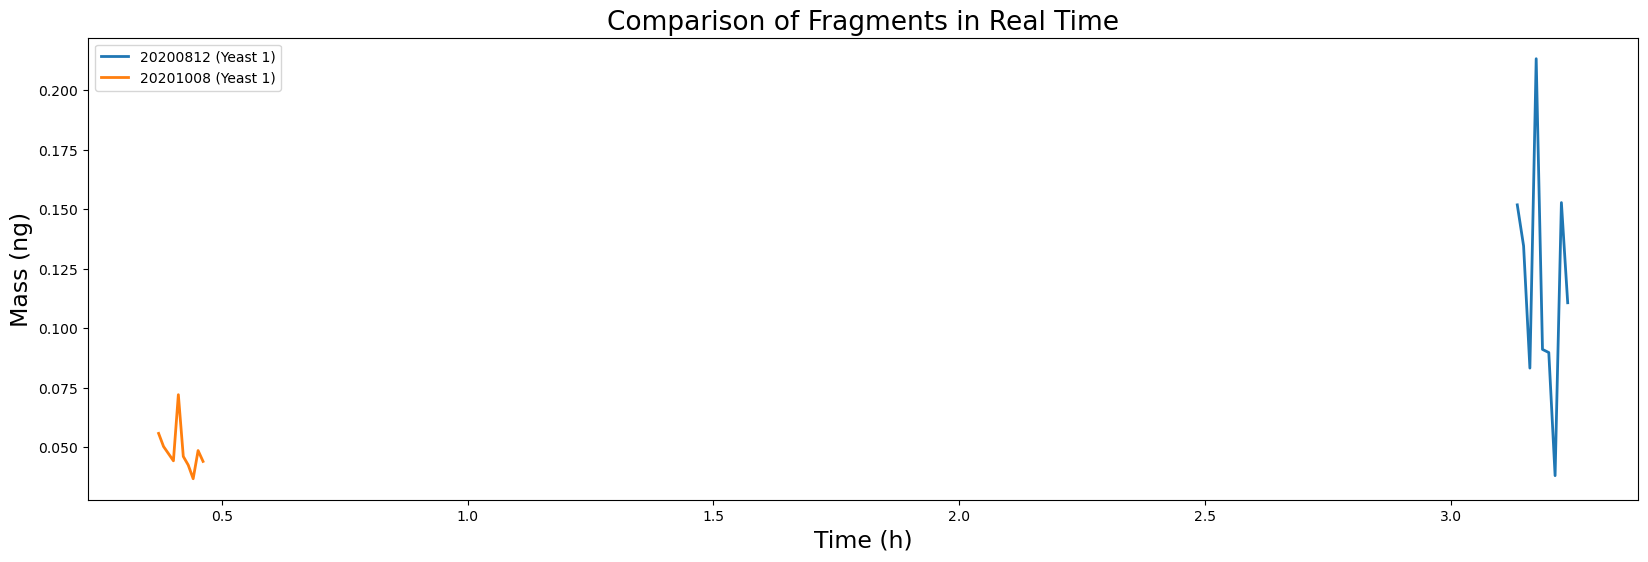

In [134]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.plot(df008Y1['time'].iloc[df008Y1_motif_index : df008Y1_motif_index + m].values, df008Y1['mass'].iloc[df008Y1_motif_index : df008Y1_motif_index + m].values, label='20201008 (Yeast 1)', linewidth=2)
plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

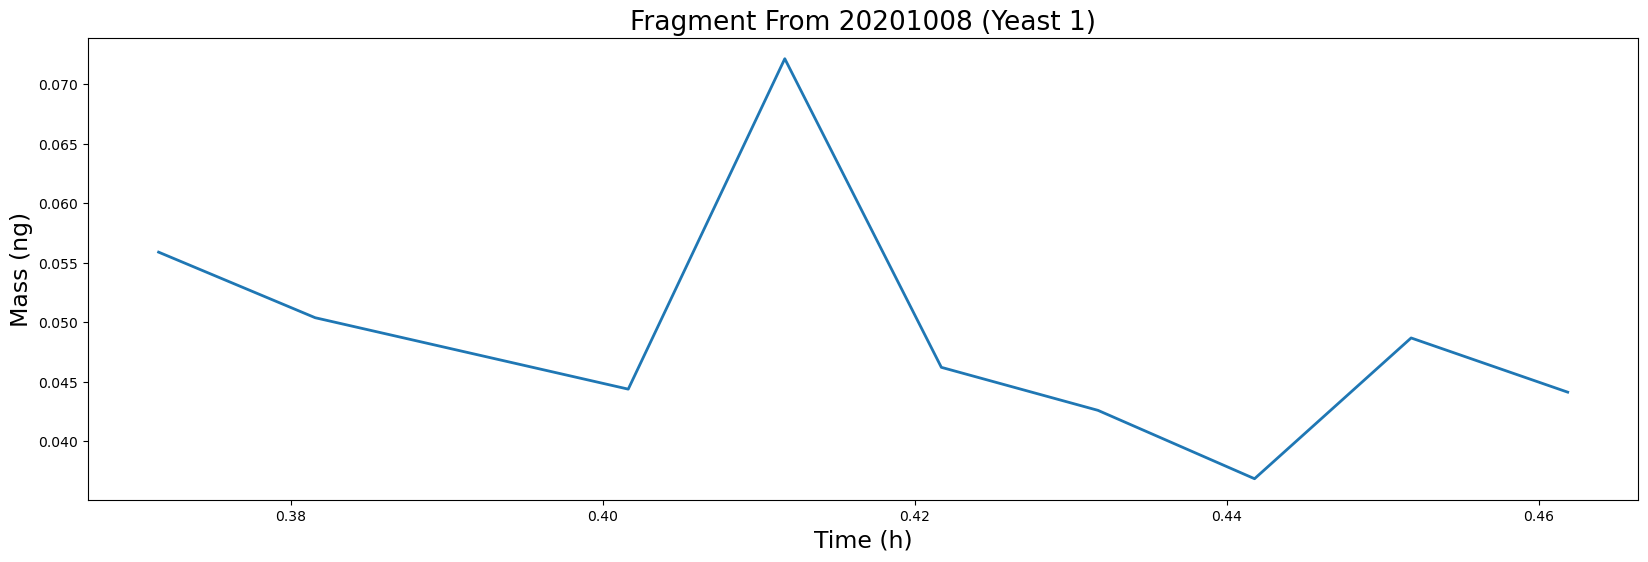

In [135]:
plt.plot(df008Y1['time'].iloc[df008Y1_motif_index : df008Y1_motif_index + m].values, df008Y1['mass'].iloc[df008Y1_motif_index : df008Y1_motif_index + m].values, label='20201008 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20201008 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

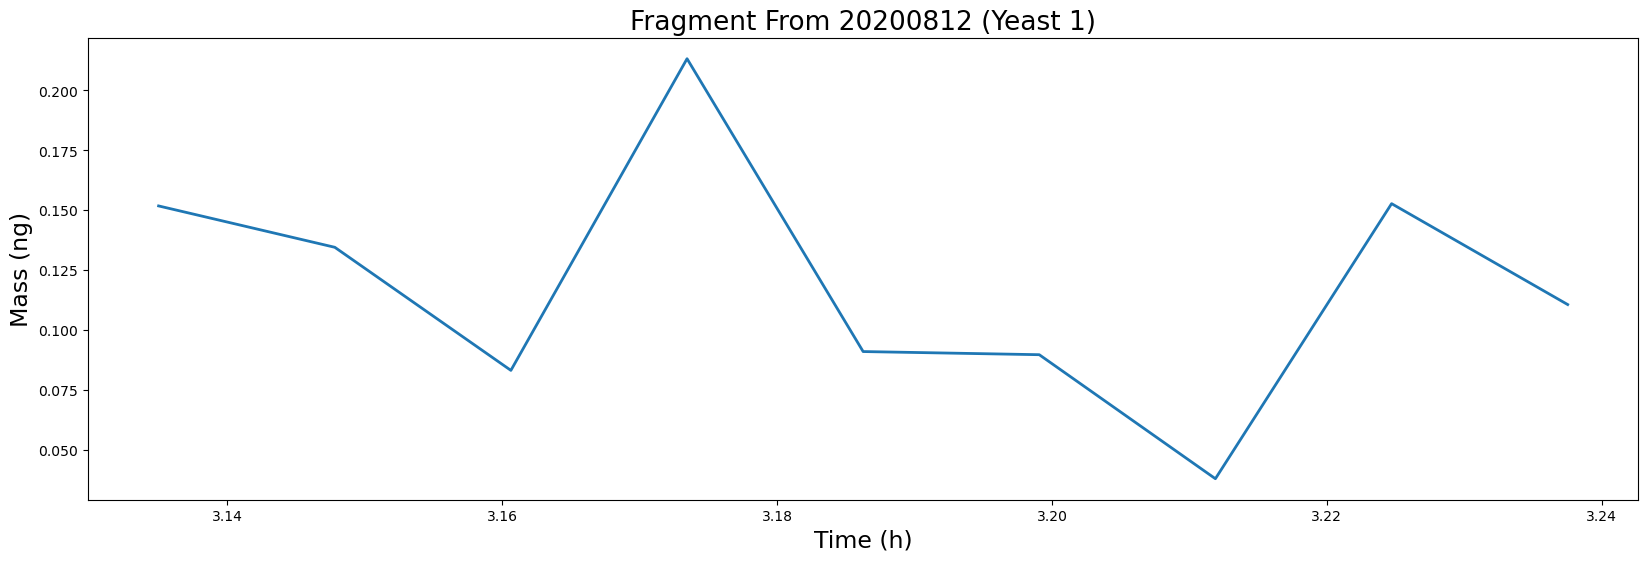

In [136]:
plt.plot(df12['time'].iloc[df12_motif_index : df12_motif_index + m].values, df12['mass'].iloc[df12_motif_index : df12_motif_index + m].values, label='20200812 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20200812 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200910 (Yeast 2) and 20200911 (Yeast 2)

In [137]:
m = 8
mp10Y2 = stumpy.stump(T_A = df10Y2['mass'],
                  m = m,
                  T_B = df11Y2['mass'],
                  ignore_trivial = False)

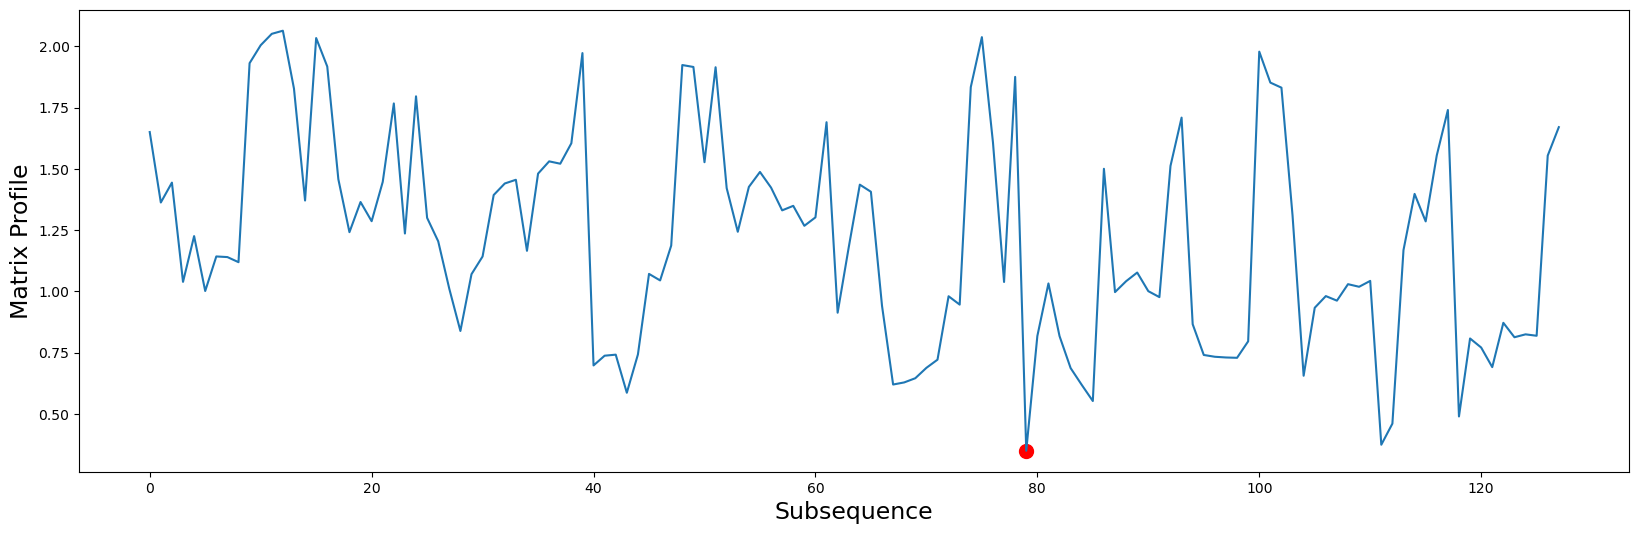

In [138]:
df10Y2_motif_index = mp10Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df10Y2_motif_index,
               mp10Y2[df10Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp10Y2[:,0])
plt.show()

In [139]:
df10Y2_motif_index = mp10Y2[:, 0].argmin()
print(f'The motif is located at index {df10Y2_motif_index} of "20200910 (Yeast 2)"')

The motif is located at index 79 of "20200910 (Yeast 2)"


In [140]:
df11Y2_motif_index = mp10Y2[df10Y2_motif_index, 1]
print(f'The motif is located at index {df11Y2_motif_index} of "20200911 (Yeast 2)"')

The motif is located at index 112 of "20200911 (Yeast 2)"


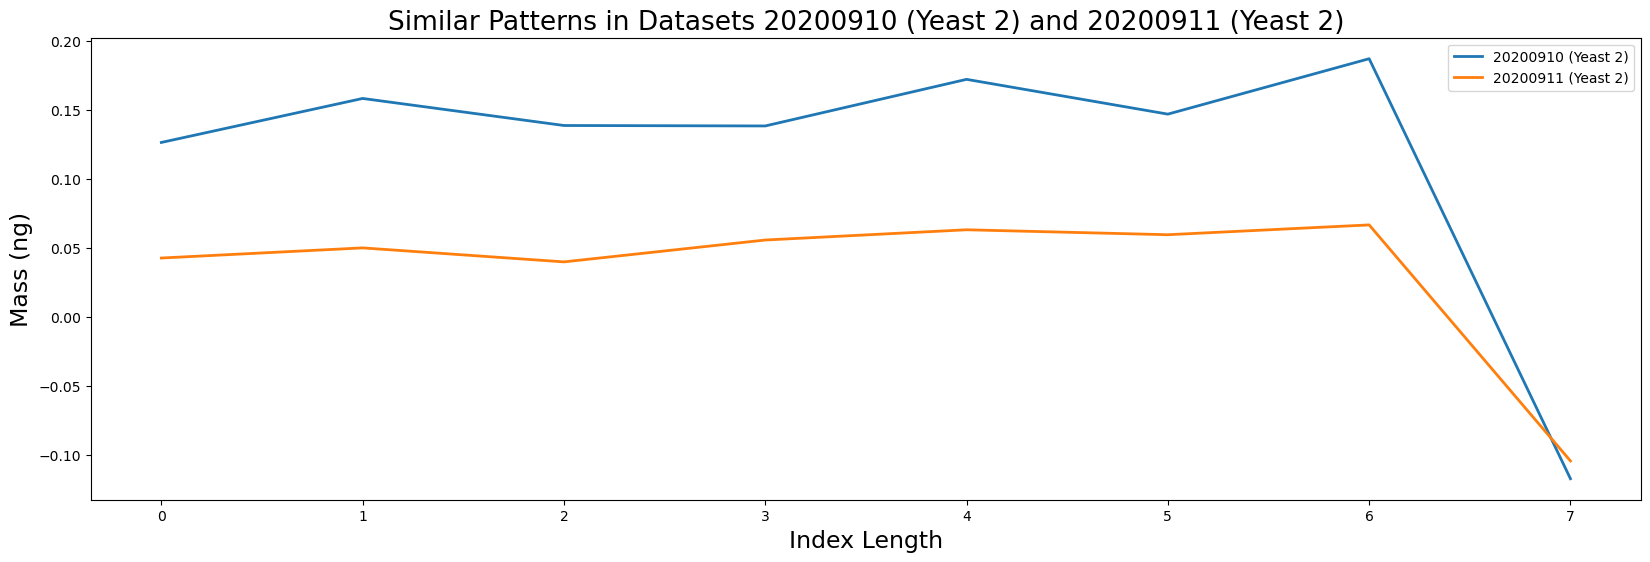

In [141]:
plt.plot(df10Y2['mass'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, label='20200910 (Yeast 2)', linewidth=2)
plt.plot(df11Y2['mass'].iloc[df11Y2_motif_index:df11Y2_motif_index+m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200910 (Yeast 2) and 20200911 (Yeast 2)', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

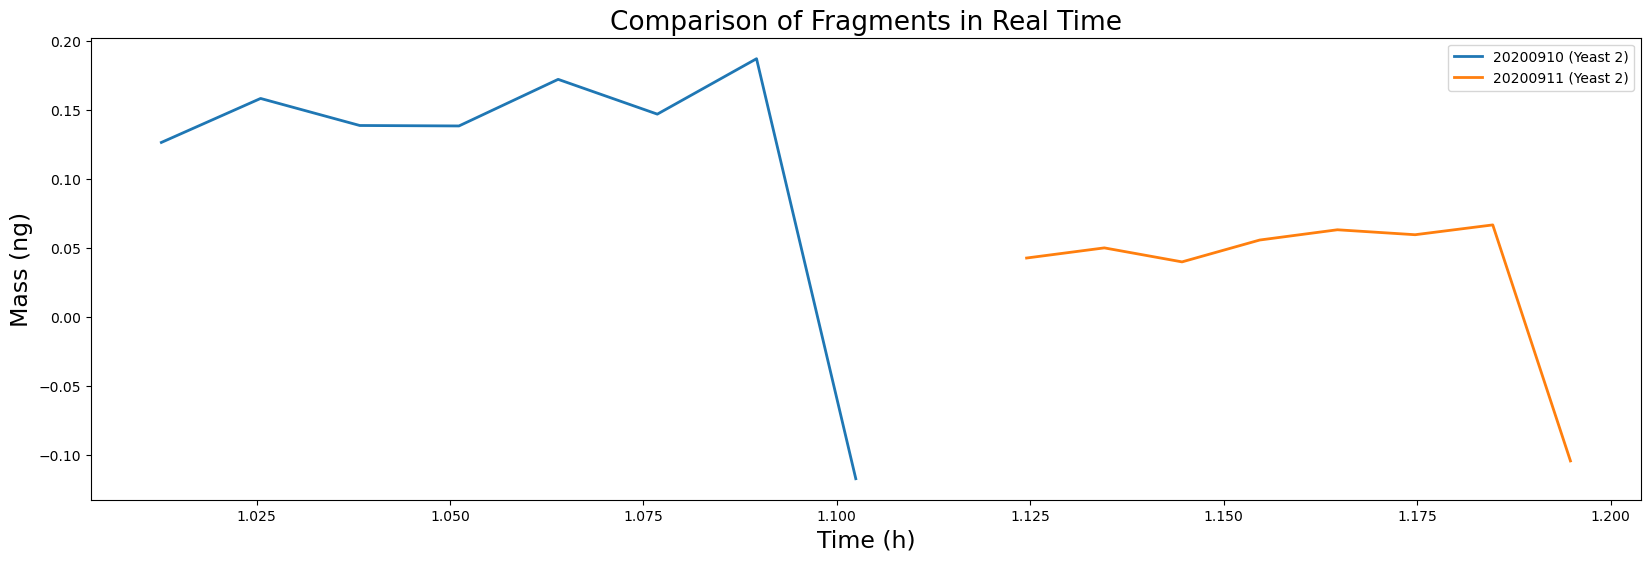

In [142]:
plt.plot(df10Y2['time'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, df10Y2['mass'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, label='20200910 (Yeast 2)', linewidth=2)
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

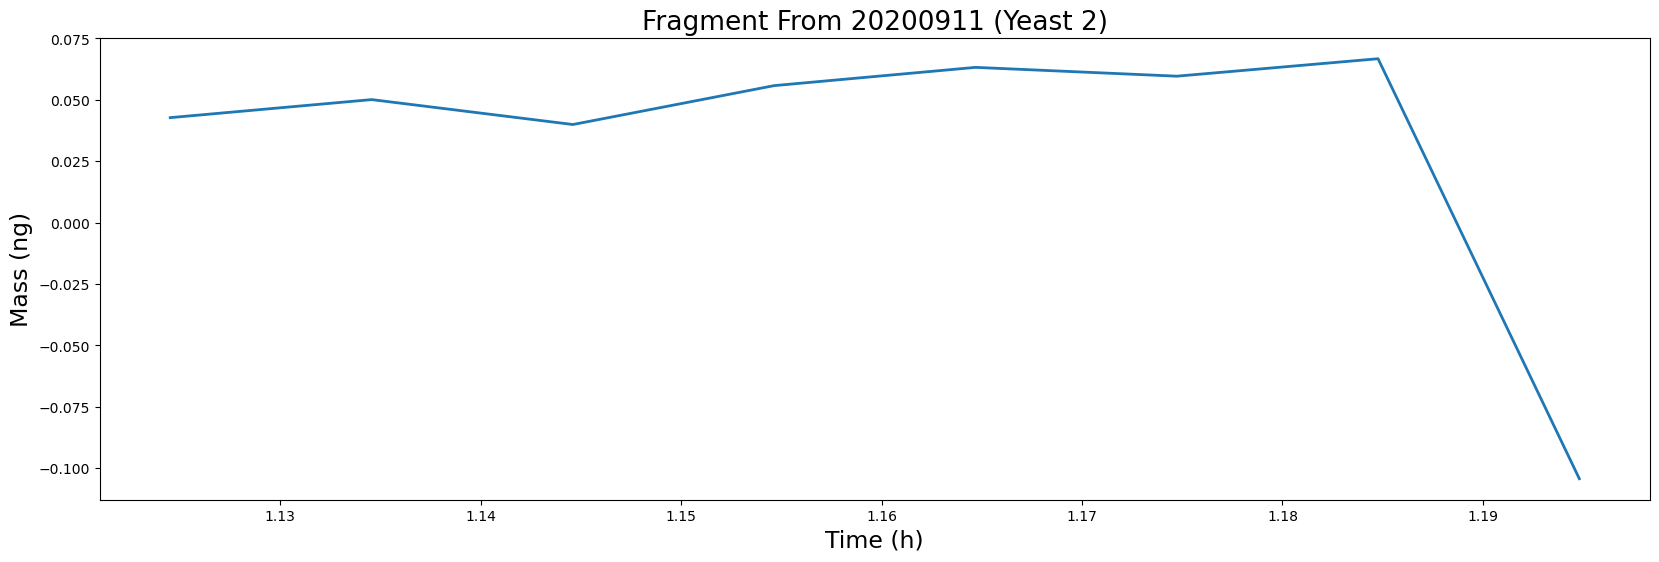

In [143]:
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20200911 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

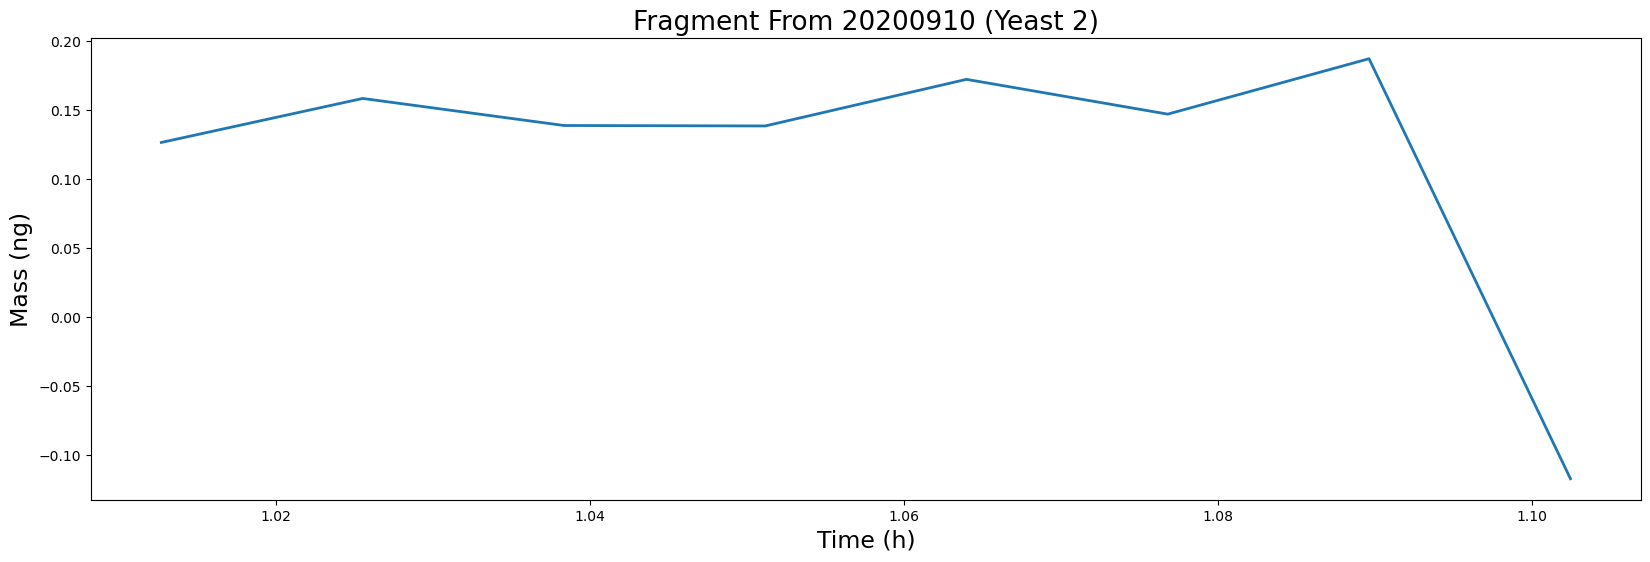

In [144]:
plt.plot(df10Y2['time'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, df10Y2['mass'].iloc[df10Y2_motif_index : df10Y2_motif_index + m].values, label='20200910 (Yeast 2)', linewidth=2)
plt.title('Fragment From 20200910 (Yeast 2)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200924 and 20200911 (Yeast 2)

In [145]:
m = 8
mp24Y2 = stumpy.stump(T_A = df24Y2['mass'],
                  m = m,
                  T_B = df11Y2['mass'],
                  ignore_trivial = False)

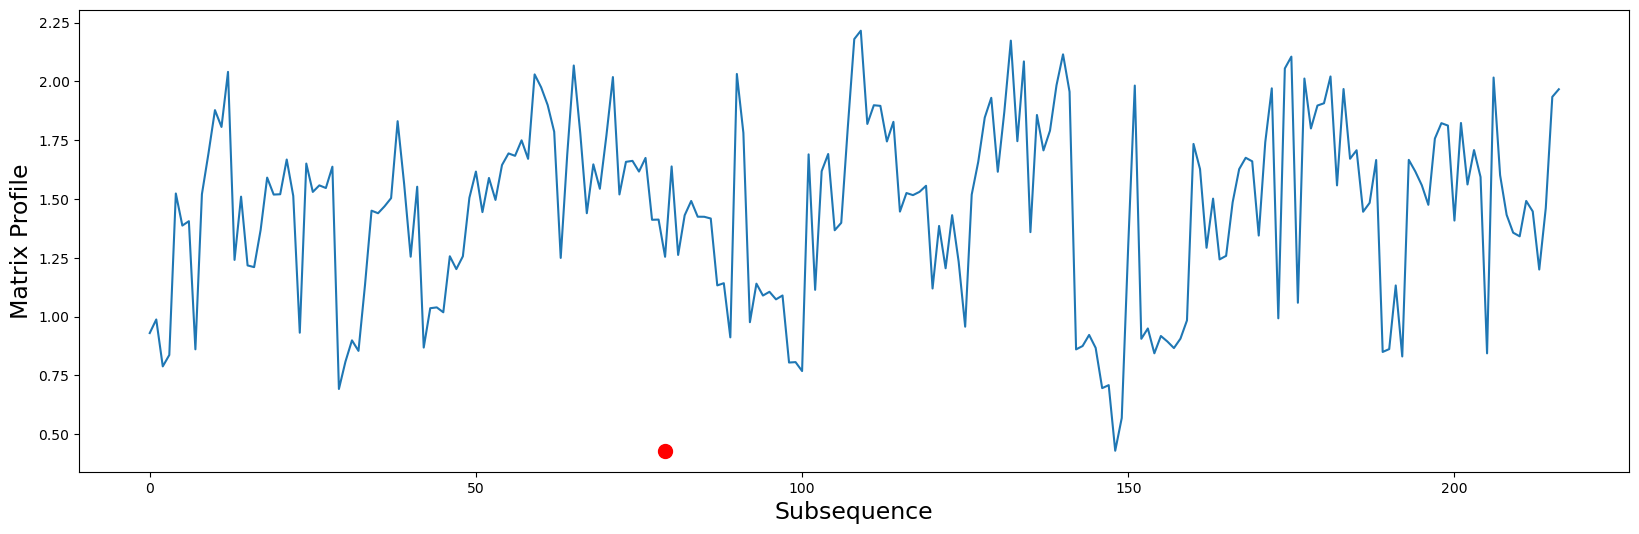

In [146]:
df24Y2_motif_index = mp24Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df10Y2_motif_index,
               mp24Y2[df24Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp24Y2[:,0])
plt.show()

In [147]:
df24Y2_motif_index = mp24Y2[:, 0].argmin()
print(f'The motif is located at index {df24Y2_motif_index} of "20200924"')

The motif is located at index 148 of "20200924"


In [148]:
df11Y2_motif_index = mp24Y2[df24Y2_motif_index, 1]
print(f'The motif is located at index {df11Y2_motif_index} of "20200911 (Yeast 2)"')

The motif is located at index 128 of "20200911 (Yeast 2)"


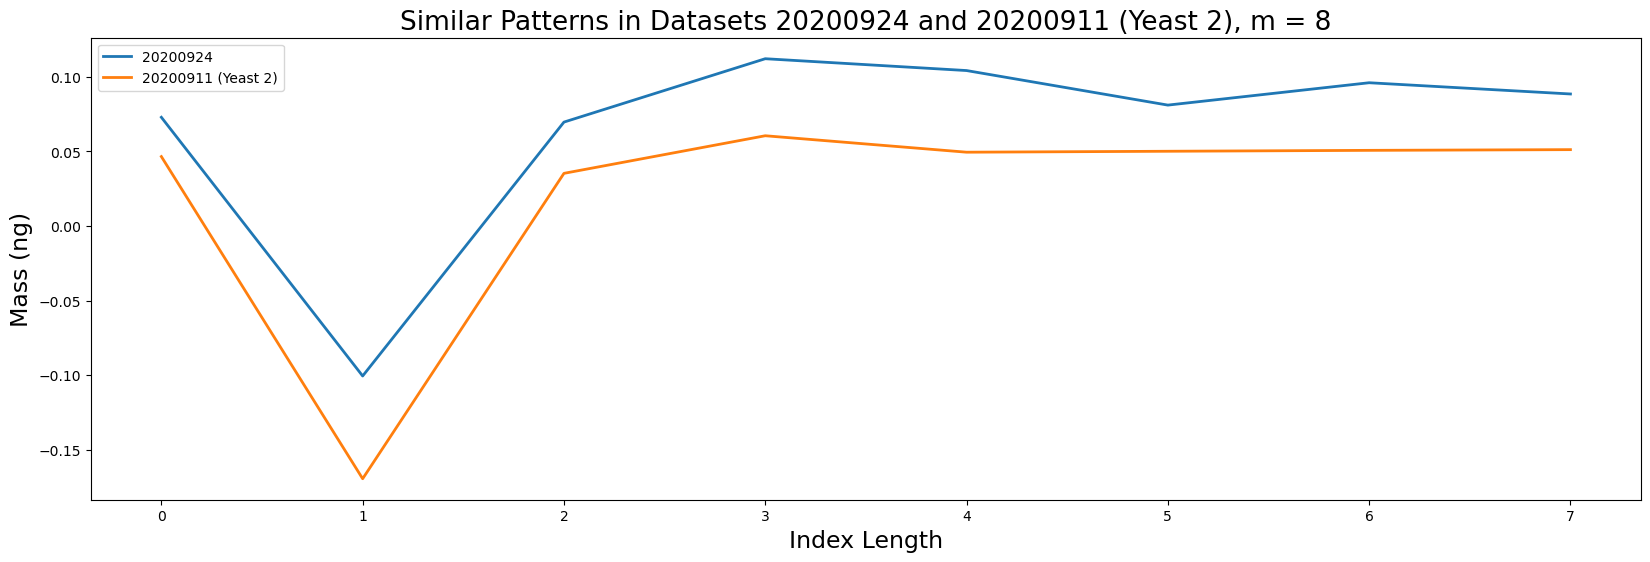

In [149]:
plt.plot(df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.plot(df11Y2['mass'].iloc[df11Y2_motif_index:df11Y2_motif_index+m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200924 and 20200911 (Yeast 2), m = 8', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.savefig('m8.pdf', dpi=300, bbox_inches='tight')

plt.show()

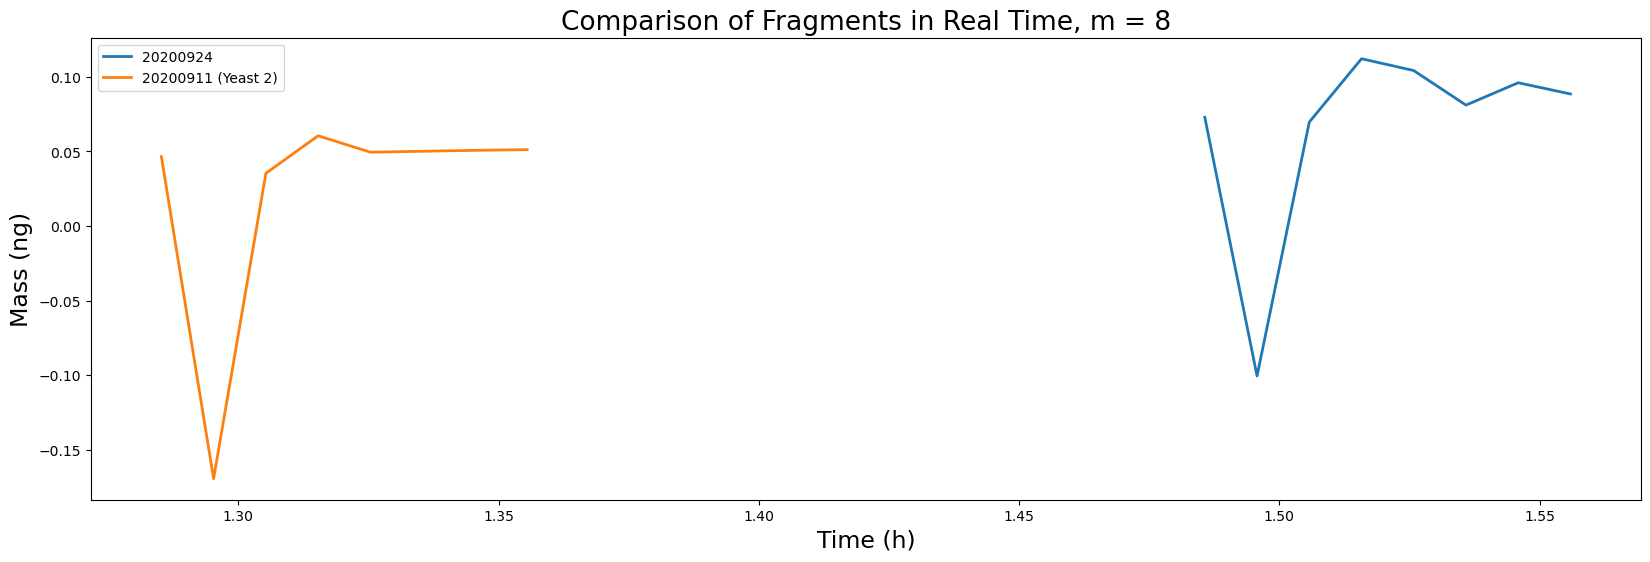

In [150]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Comparison of Fragments in Real Time, m = 8', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.savefig('m88.pdf', dpi=300, bbox_inches='tight')
plt.show()

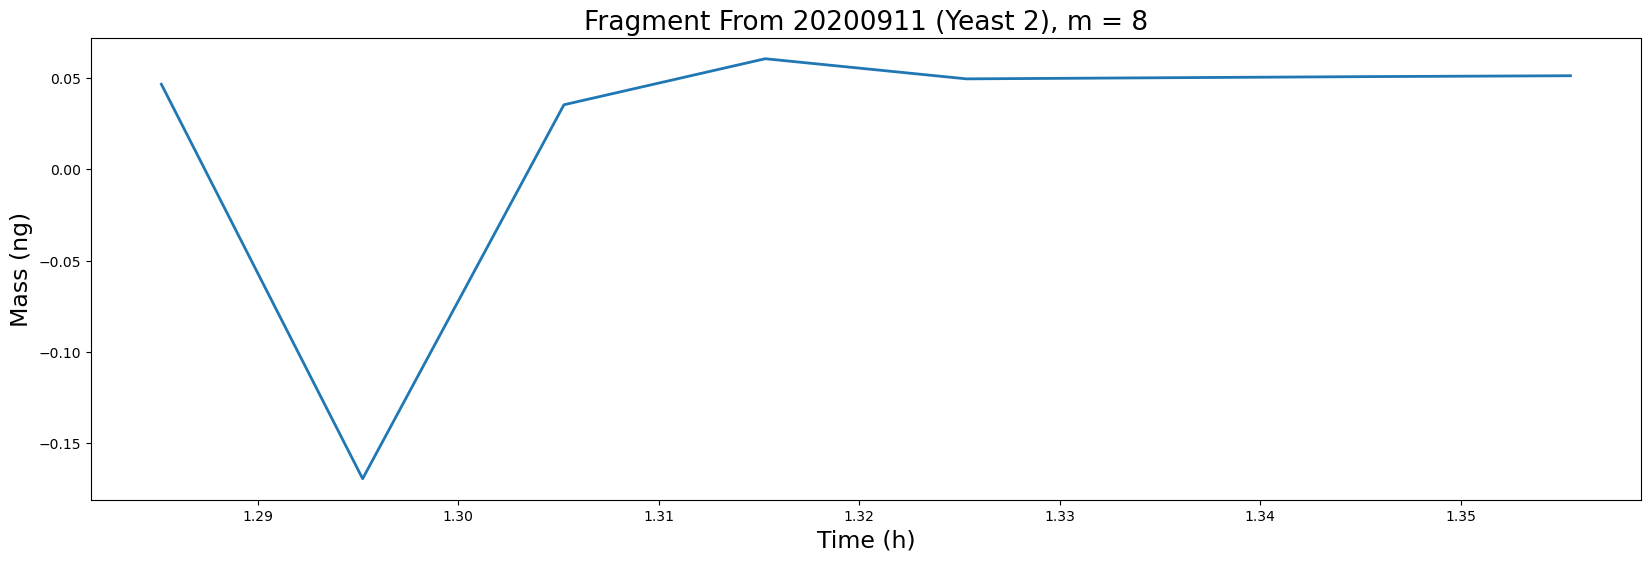

In [151]:
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20200911 (Yeast 2), m = 8', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

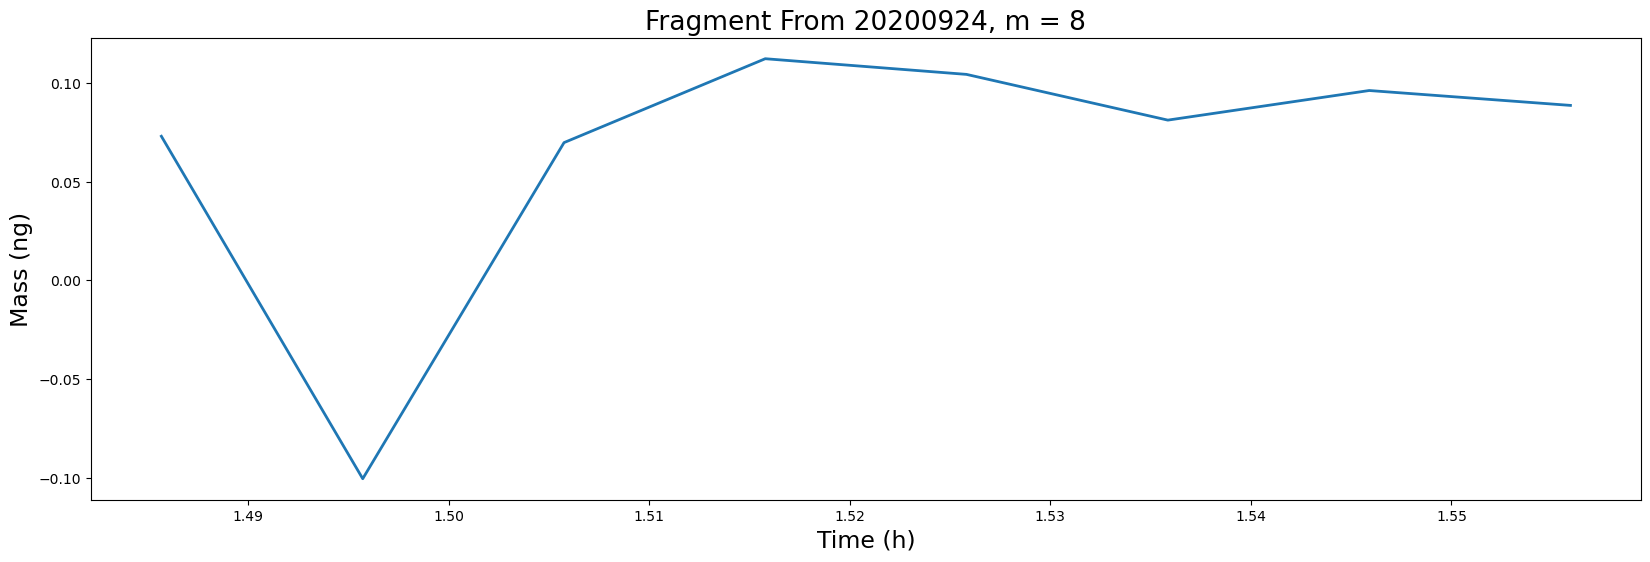

In [152]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.title('Fragment From 20200924, m = 8', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

m = 16

In [153]:
m = 16
mp24Y2 = stumpy.stump(T_A = df24Y2['mass'],
                  m = m,
                  T_B = df11Y2['mass'],
                  ignore_trivial = False)

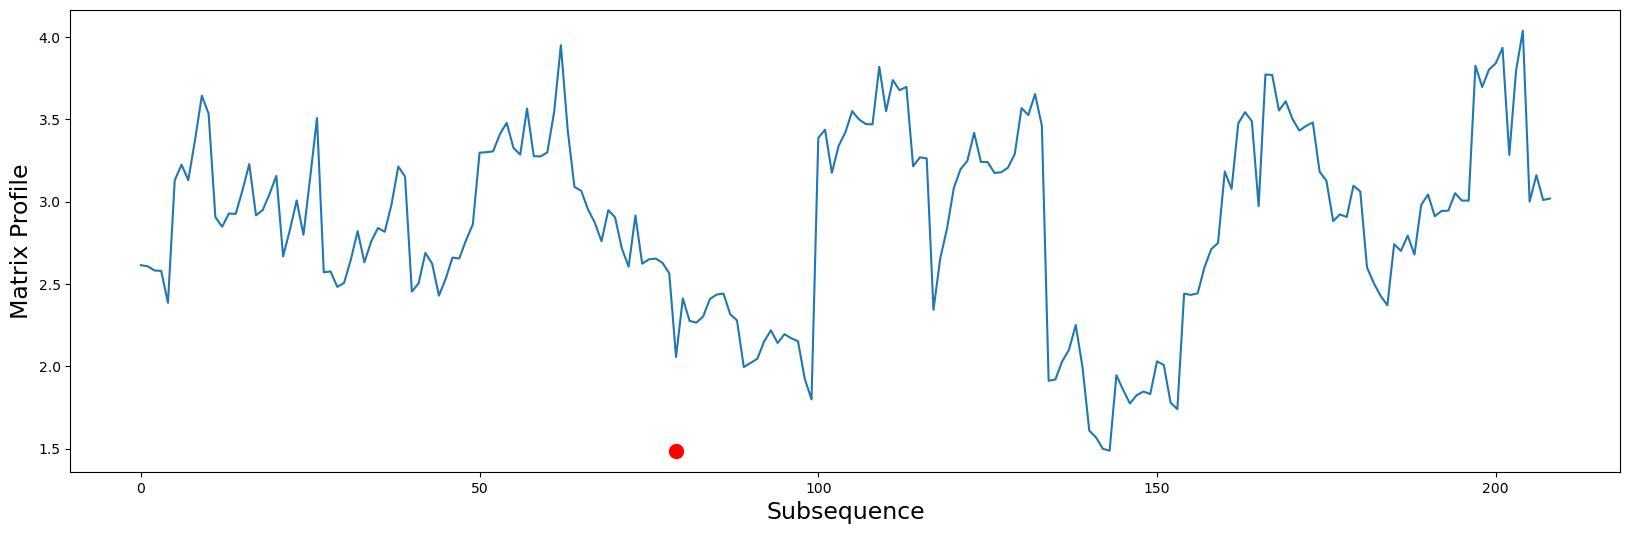

In [154]:
df24Y2_motif_index = mp24Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df10Y2_motif_index,
               mp24Y2[df24Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp24Y2[:,0])
plt.show()

In [155]:
df24Y2_motif_index = mp24Y2[:, 0].argmin()
print(f'The motif is located at index {df24Y2_motif_index} of "20200924"')

The motif is located at index 143 of "20200924"


In [156]:
df11Y2_motif_index = mp24Y2[df24Y2_motif_index, 1]
print(f'The motif is located at index {df11Y2_motif_index} of "20200911 (Yeast 2)"')

The motif is located at index 123 of "20200911 (Yeast 2)"


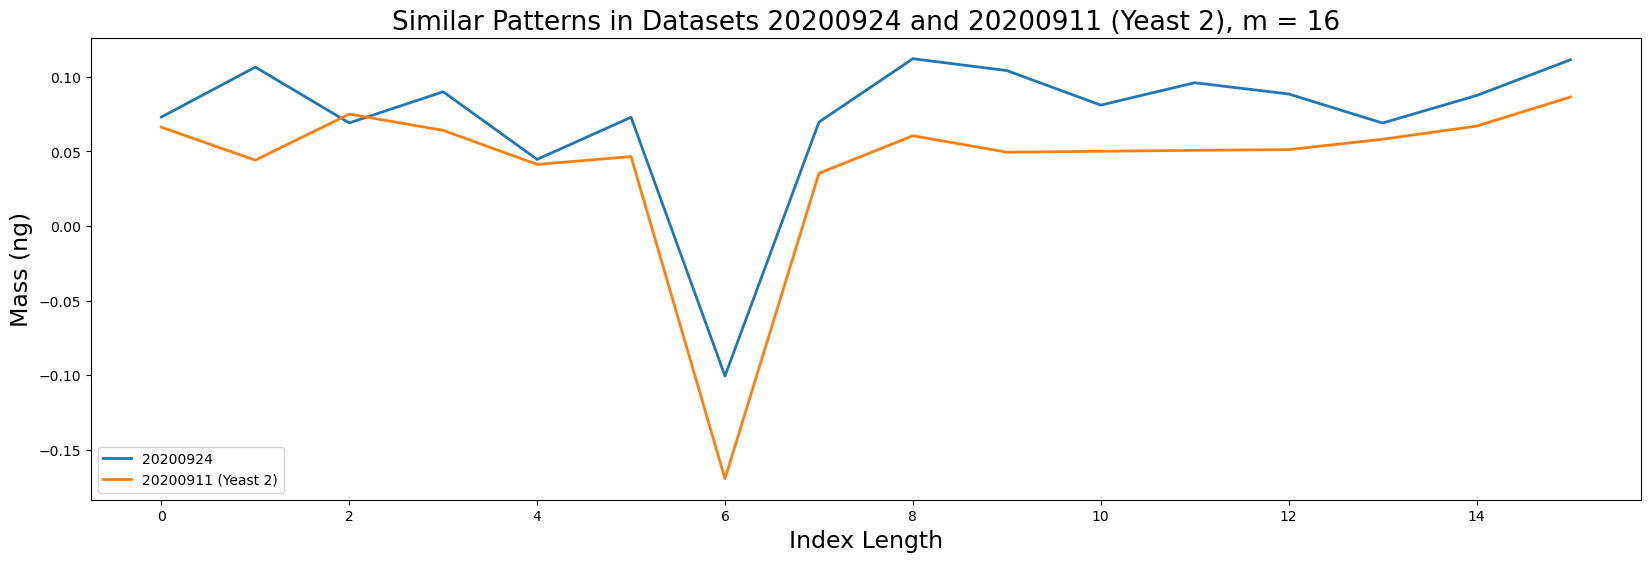

In [157]:
plt.plot(df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.plot(df11Y2['mass'].iloc[df11Y2_motif_index:df11Y2_motif_index+m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200924 and 20200911 (Yeast 2), m = 16', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.savefig('m16.pdf', dpi=300, bbox_inches='tight')

plt.show()

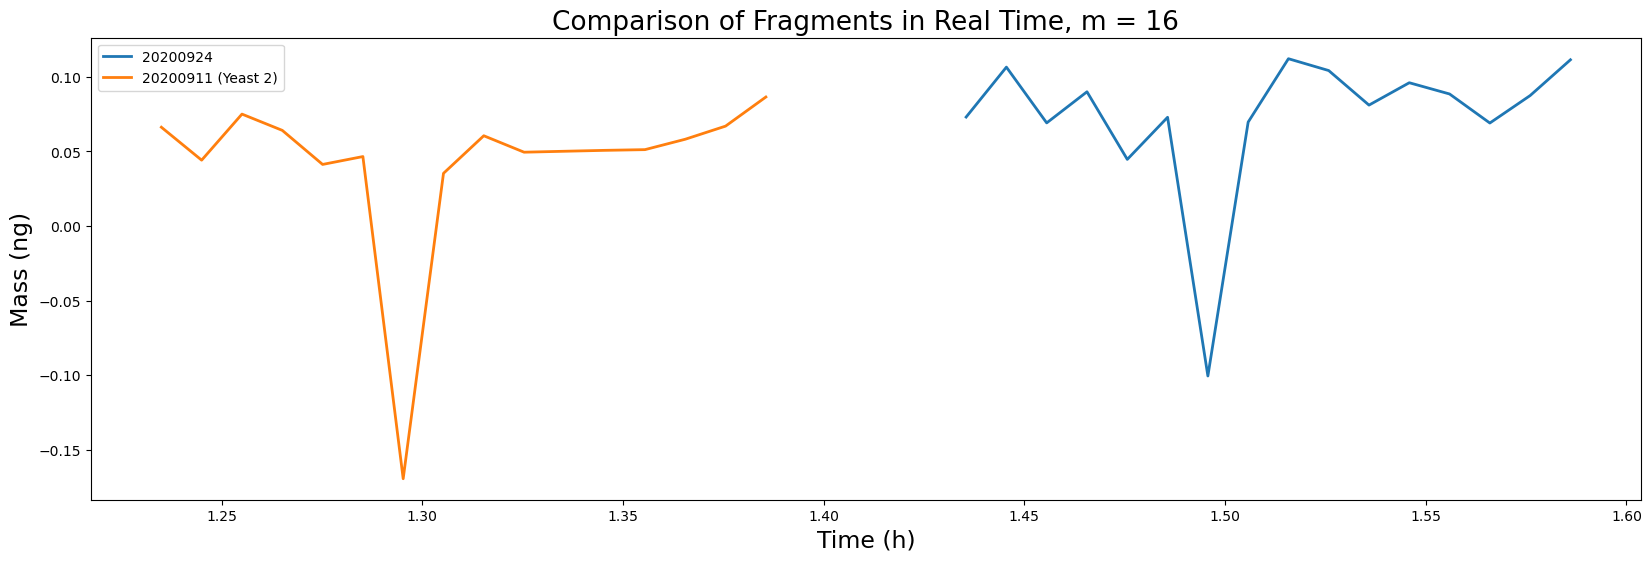

In [158]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Comparison of Fragments in Real Time, m = 16', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.savefig('m166.pdf', dpi=300, bbox_inches='tight')
plt.show()

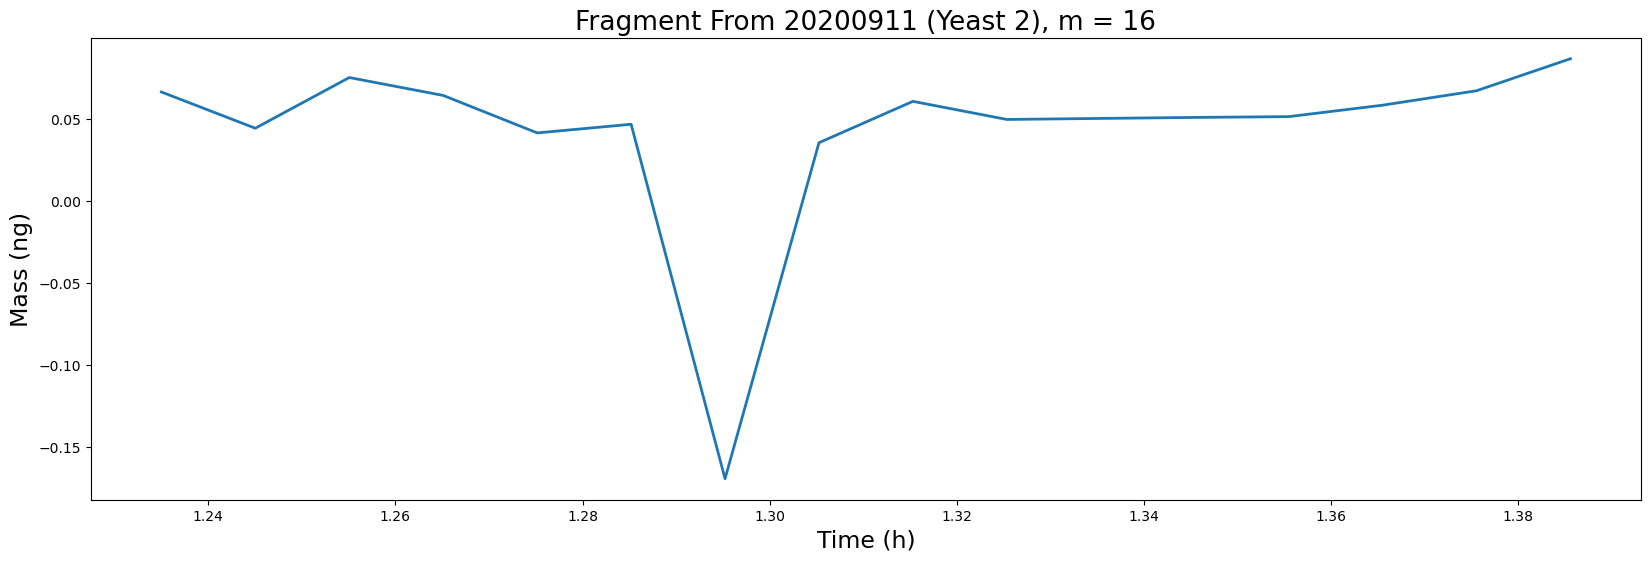

In [159]:
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20200911 (Yeast 2), m = 16', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

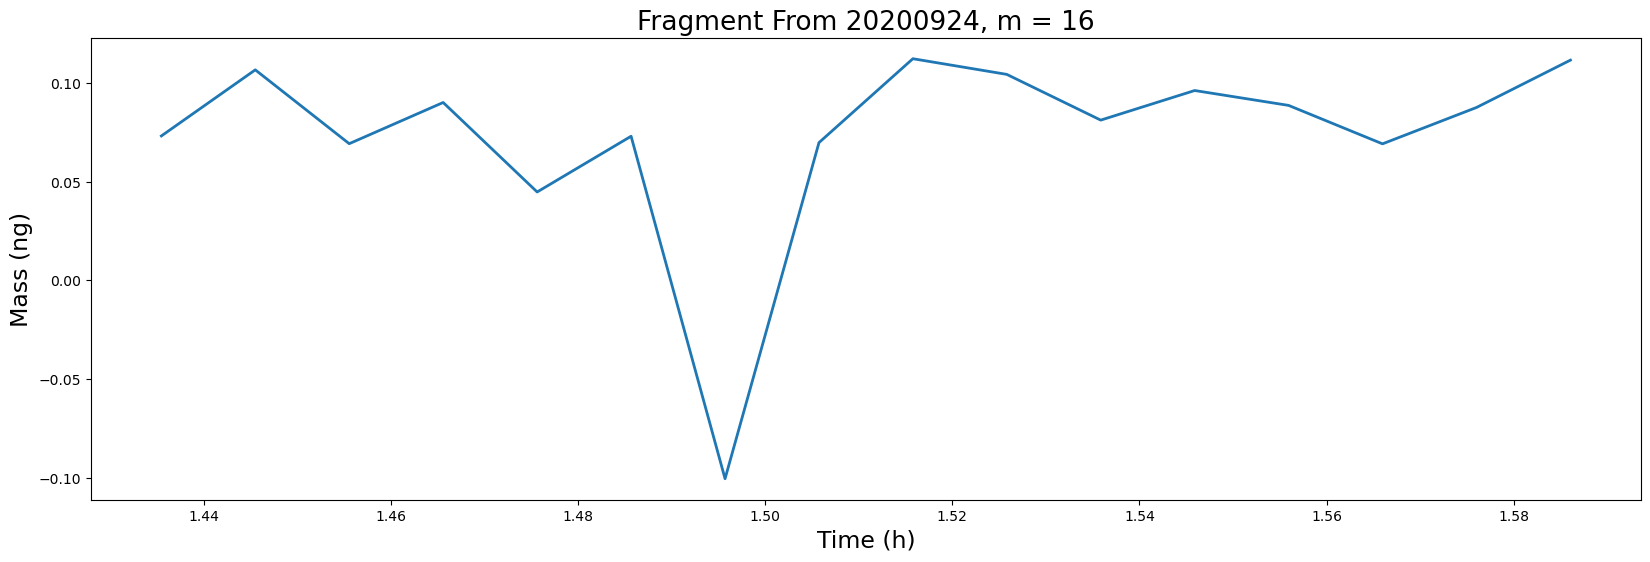

In [160]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.title('Fragment From 20200924, m = 16', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# m = 40

In [161]:
m = 40
mp24Y2 = stumpy.stump(T_A = df24Y2['mass'],
                  m = m,
                  T_B = df11Y2['mass'],
                  ignore_trivial = False)

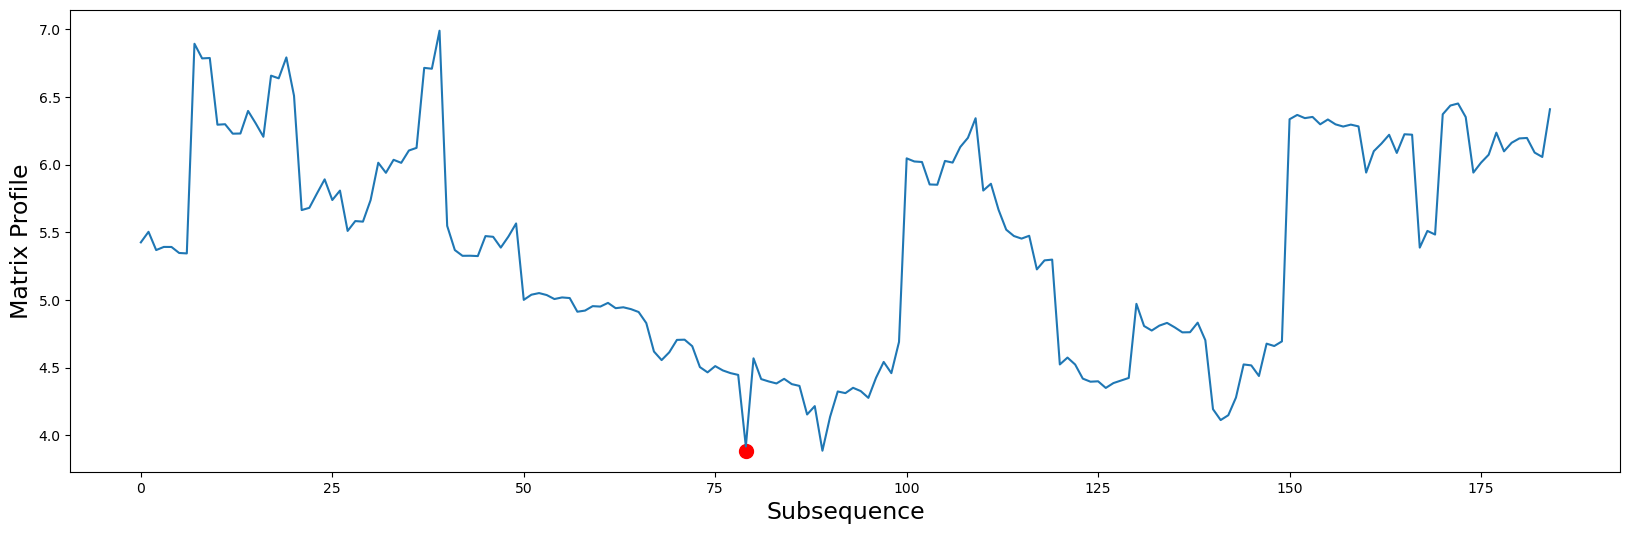

In [162]:
df24Y2_motif_index = mp24Y2[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df10Y2_motif_index,
               mp24Y2[df24Y2_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp24Y2[:,0])
plt.show()

In [163]:
df24Y2_motif_index = mp24Y2[:, 0].argmin()
print(f'The motif is located at index {df24Y2_motif_index} of "20200924"')

The motif is located at index 89 of "20200924"


In [164]:
df11Y2_motif_index = mp24Y2[df24Y2_motif_index, 1]
print(f'The motif is located at index {df11Y2_motif_index} of "20200911 (Yeast 2)"')

The motif is located at index 36 of "20200911 (Yeast 2)"


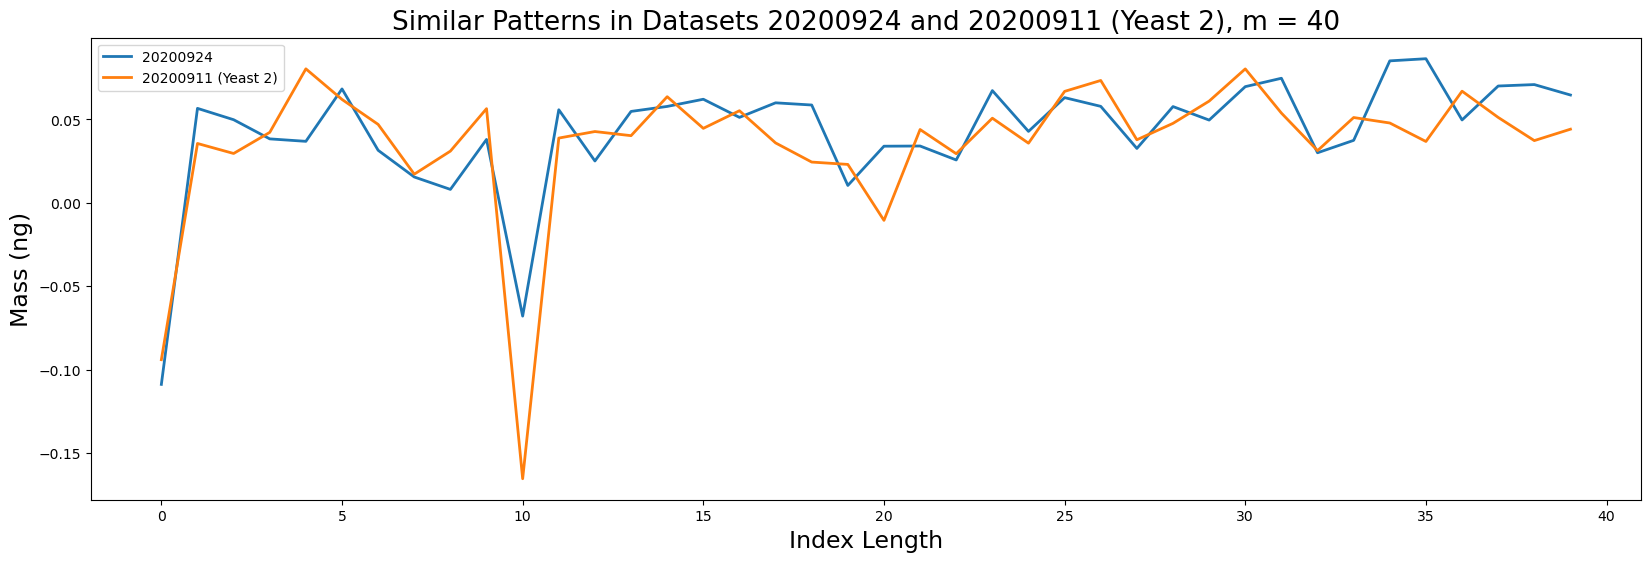

In [165]:
plt.plot(df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.plot(df11Y2['mass'].iloc[df11Y2_motif_index:df11Y2_motif_index+m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Similar Patterns in Datasets 20200924 and 20200911 (Yeast 2), m = 40', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.savefig('m40.pdf', dpi=300, bbox_inches='tight')

plt.show()

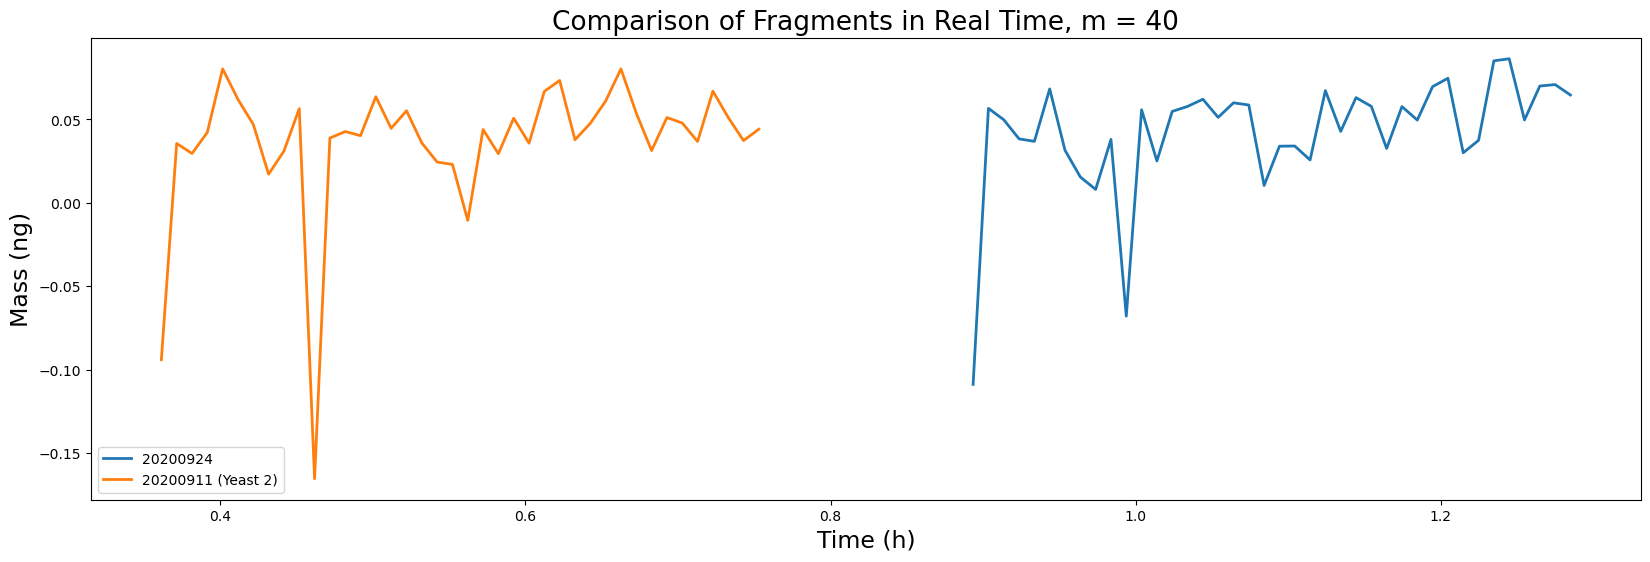

In [166]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Comparison of Fragments in Real Time, m = 40', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.savefig('m400.pdf', dpi=300, bbox_inches='tight')
plt.show()

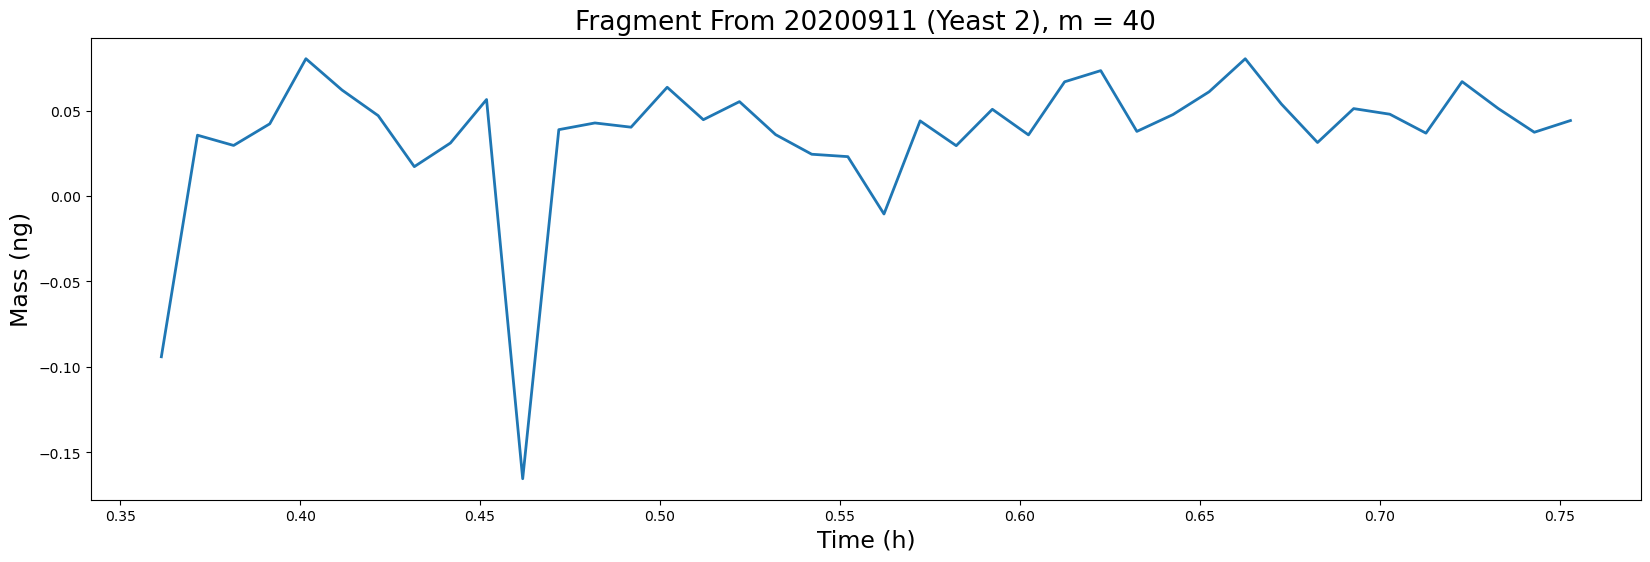

In [167]:
plt.plot(df11Y2['time'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, df11Y2['mass'].iloc[df11Y2_motif_index : df11Y2_motif_index + m].values, label='20200911 (Yeast 2)', linewidth=2)

plt.title('Fragment From 20200911 (Yeast 2), m = 40', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

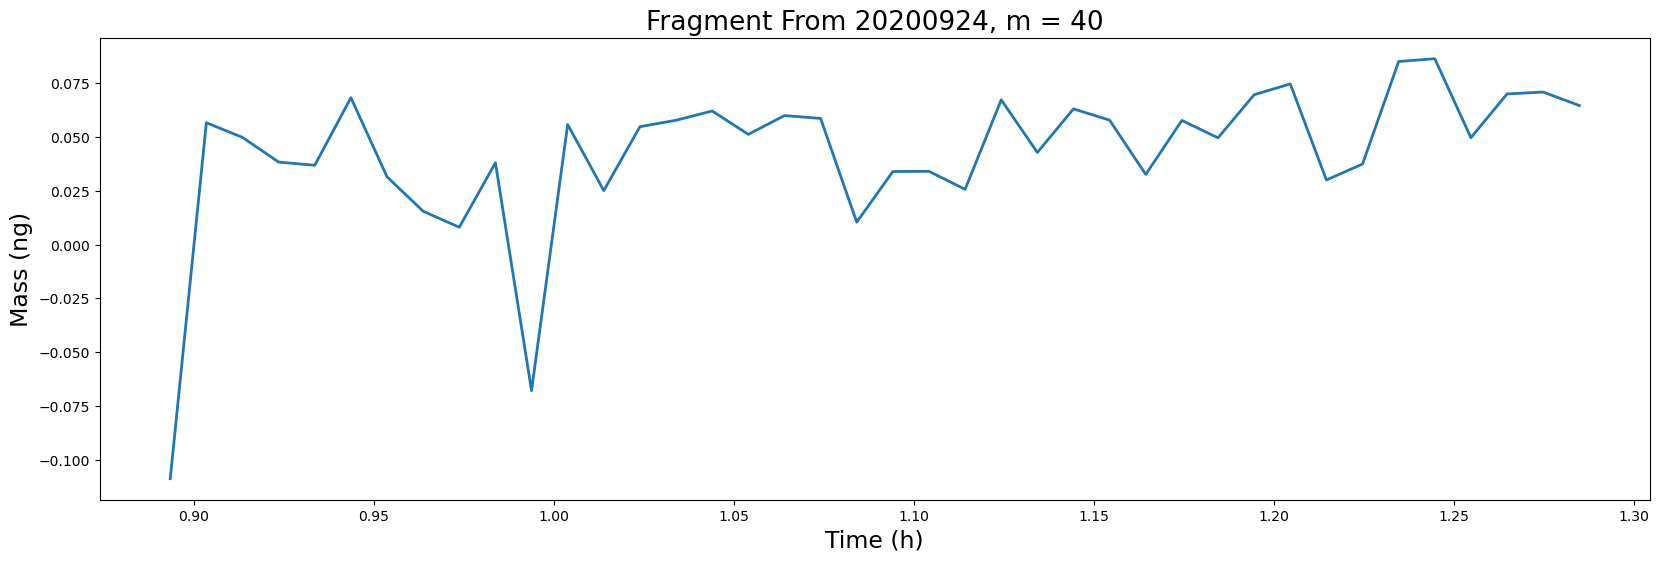

In [168]:
plt.plot(df24Y2['time'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, df24Y2['mass'].iloc[df24Y2_motif_index : df24Y2_motif_index + m].values, label='20200924', linewidth=2)
plt.title('Fragment From 20200924, m = 40', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()

# 20200814 (Yeast 1) and 20200826

In [169]:
m = 8
mp14 = stumpy.stump(T_A = df14['mass'],
                  m = m,
                  T_B = df26['mass'],
                  ignore_trivial = False)

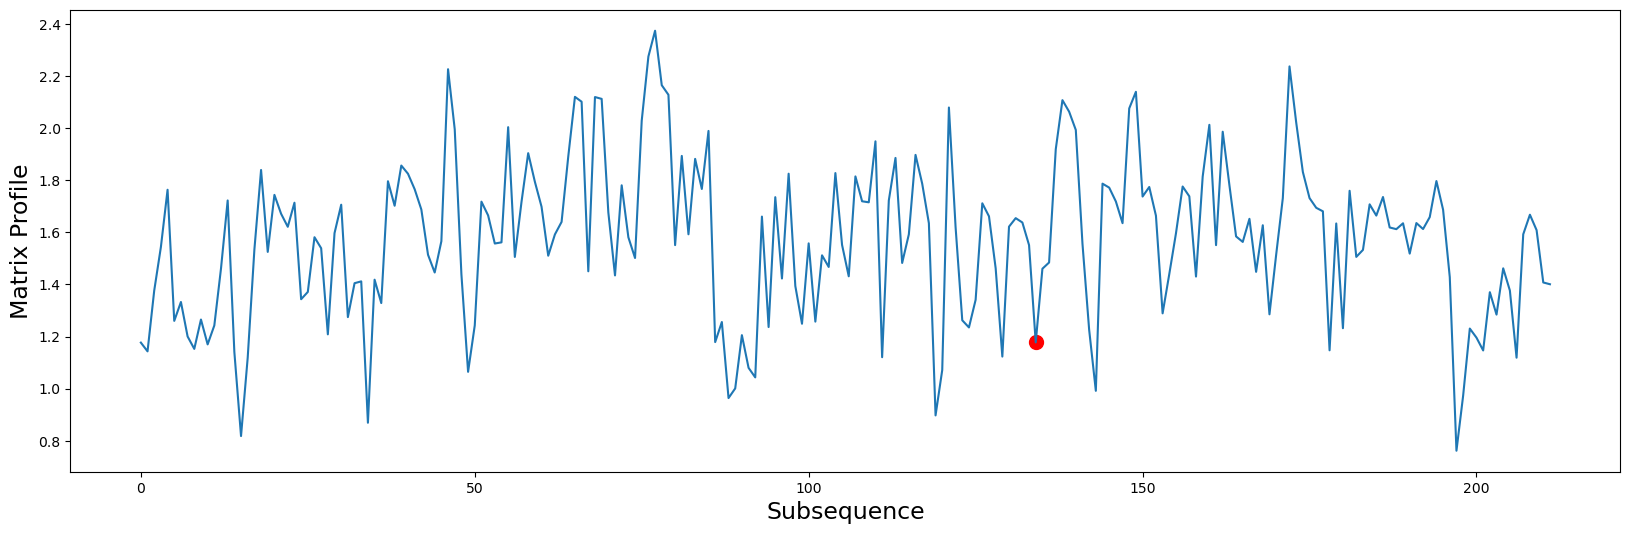

In [170]:
df11_motif_index = mp14[:, 0].argmin()
plt.xlabel('Subsequence', fontsize=17)
plt.ylabel('Matrix Profile', fontsize=17)
plt.scatter(df14_motif_index,
               mp14[df14_motif_index, 0],
               c='red',
               s=100)
plt.plot(mp14[:,0])
plt.show()

In [171]:
df14_motif_index = mp14[:, 0].argmin()
print(f'The motif is located at index {df14_motif_index} of "20200814 (Yeast 1)"')

The motif is located at index 197 of "20200814 (Yeast 1)"


In [172]:
df26_motif_index = mp14[df14_motif_index, 1]
print(f'The motif is located at index {df26_motif_index} of "20200826"')

The motif is located at index 59 of "20200826"


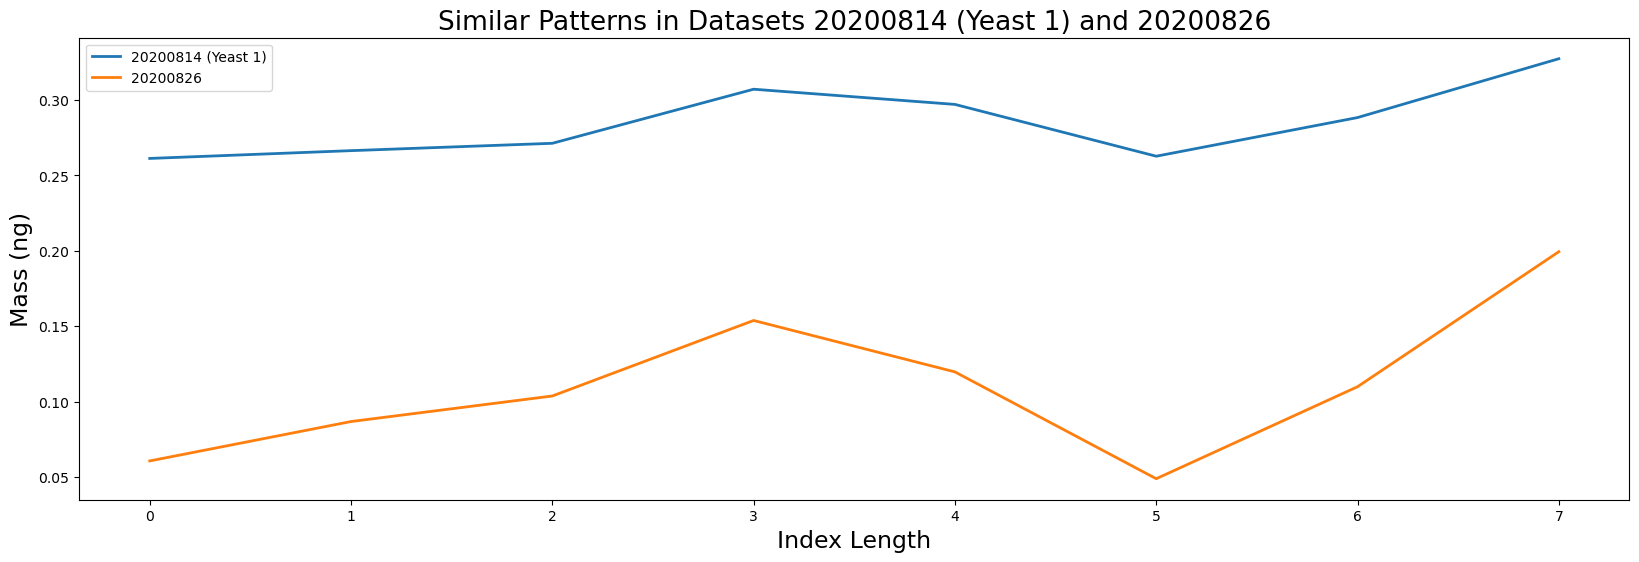

In [173]:
plt.plot(df14['mass'].iloc[df14_motif_index : df14_motif_index + m].values, label='20200814 (Yeast 1)', linewidth=2)
plt.plot(df26['mass'].iloc[df26_motif_index:df26_motif_index+m].values, label='20200826', linewidth=2)

plt.title('Similar Patterns in Datasets 20200814 (Yeast 1) and 20200826', fontsize=19)
plt.xlabel('Index Length', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()

plt.show()

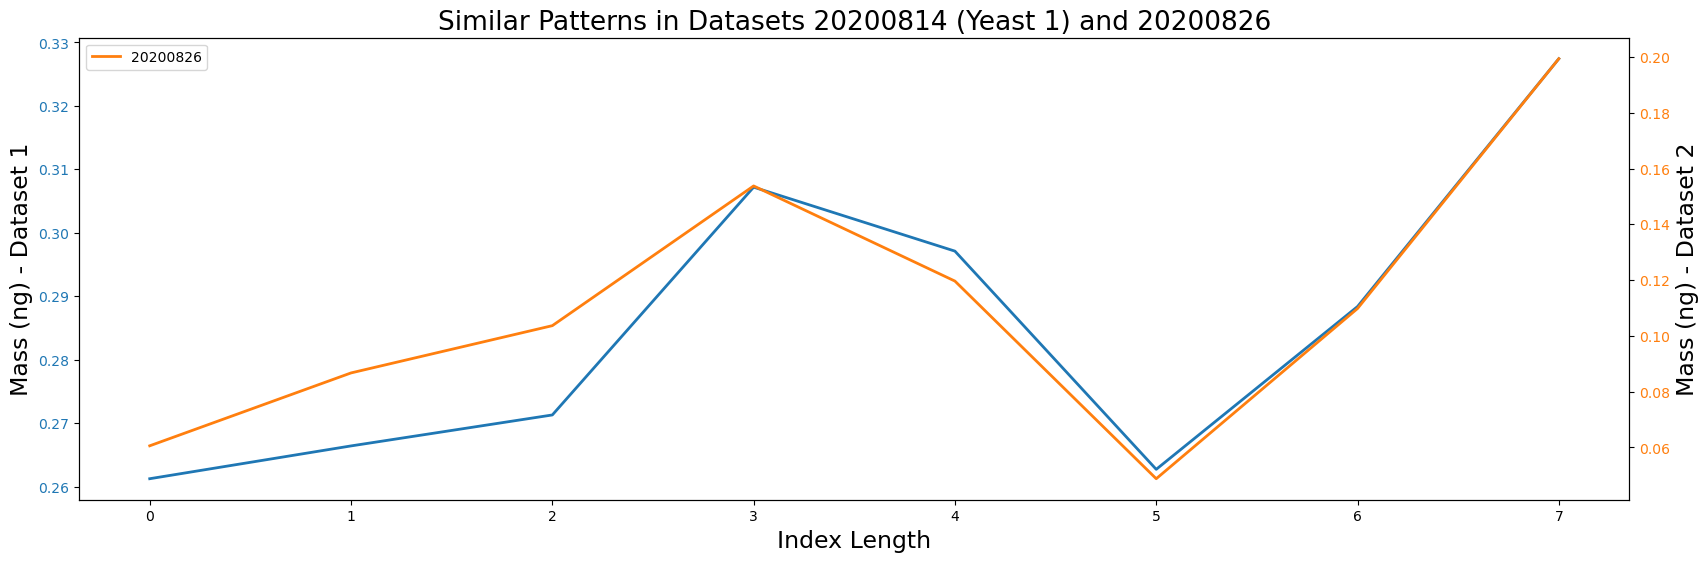

In [174]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(df14['mass'].iloc[df14_motif_index : df14_motif_index + m].values, label='20200814 (Yeast 1)', linewidth=2, color='tab:blue')
ax2.plot(df26['mass'].iloc[df26_motif_index:df26_motif_index+m].values, label='20200826', linewidth=2, color='tab:orange')

ax1.set_xlabel('Index Length', fontsize=17)
ax1.set_ylabel('Mass (ng) - Dataset 1', fontsize=17)
ax2.set_ylabel('Mass (ng) - Dataset 2', fontsize=17)

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Similar Patterns in Datasets 20200814 (Yeast 1) and 20200826', fontsize=19)

plt.legend()

plt.show()


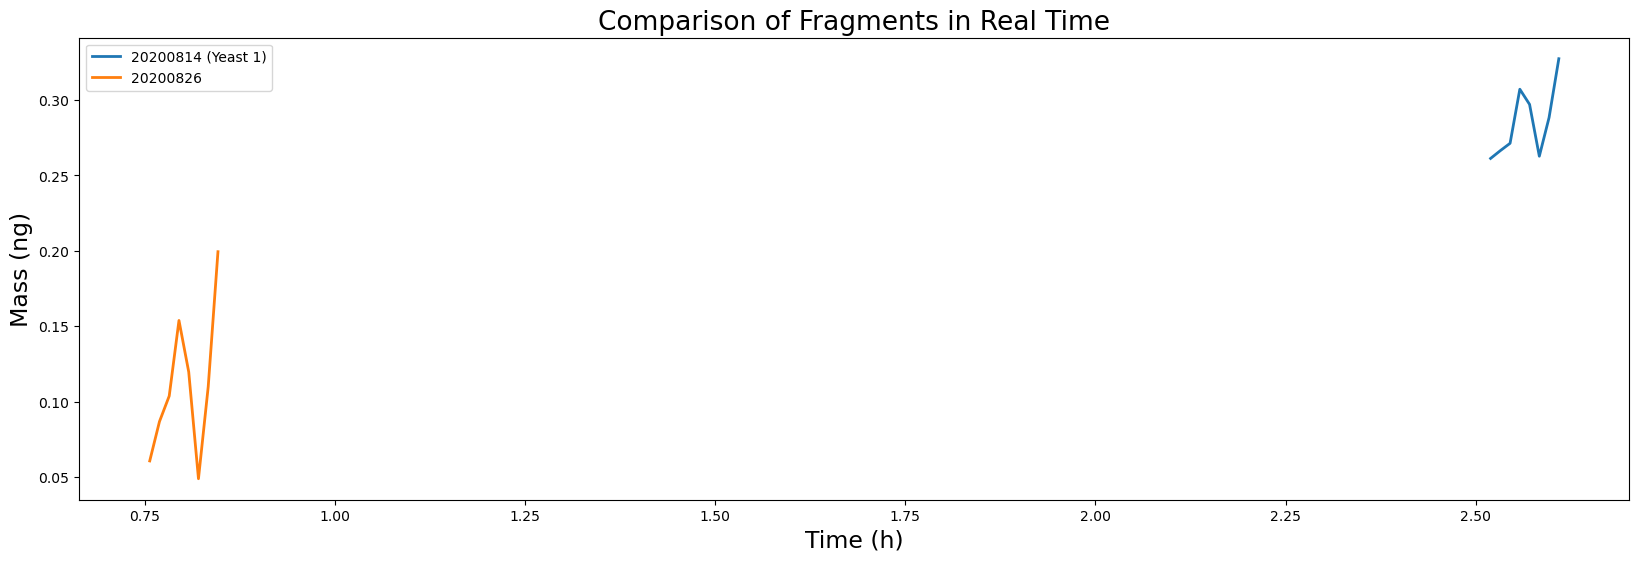

In [175]:
plt.plot(df14['time'].iloc[df14_motif_index : df14_motif_index + m].values, df14['mass'].iloc[df14_motif_index : df14_motif_index + m].values, label='20200814 (Yeast 1)', linewidth=2)
plt.plot(df26['time'].iloc[df26_motif_index : df26_motif_index + m].values, df26['mass'].iloc[df26_motif_index : df26_motif_index + m].values, label='20200826', linewidth=2)

plt.title('Comparison of Fragments in Real Time', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.legend()
plt.show()

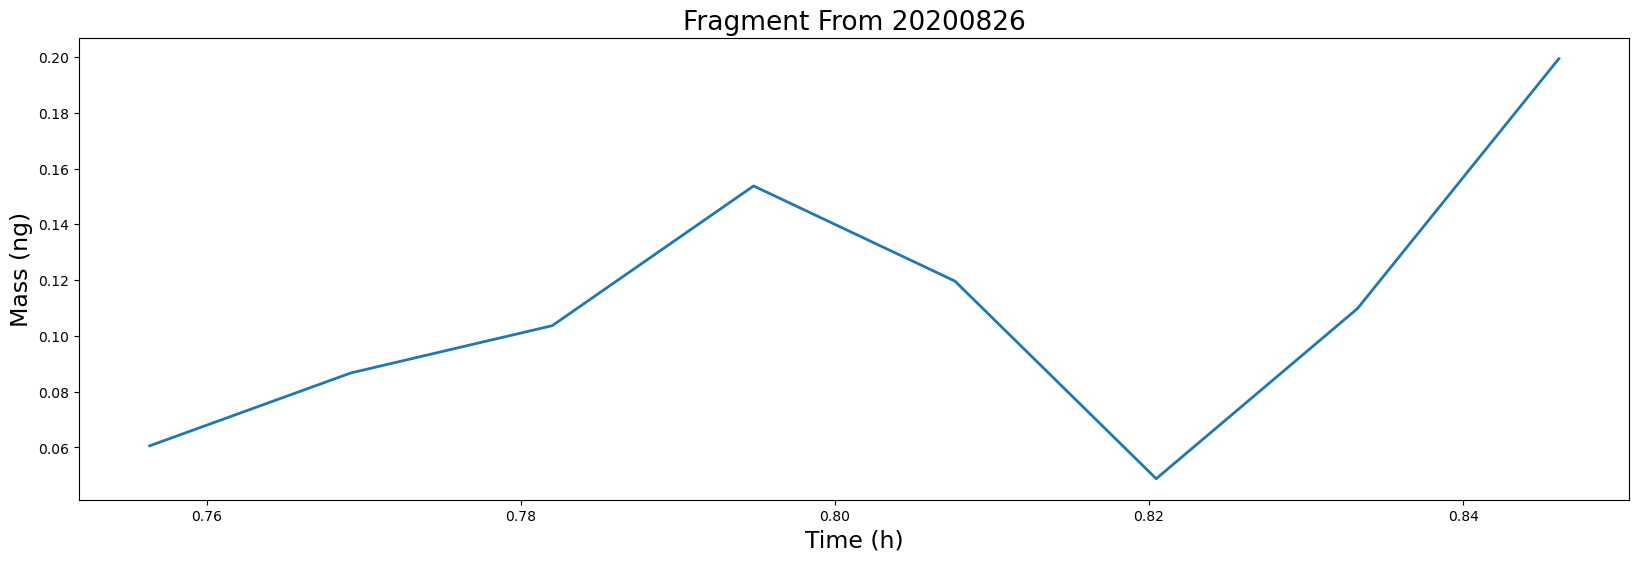

In [176]:
plt.plot(df26['time'].iloc[df26_motif_index : df26_motif_index + m].values, df26['mass'].iloc[df26_motif_index : df26_motif_index + m].values, label='20200826', linewidth=2)

plt.title('Fragment From 20200826', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)

plt.show()

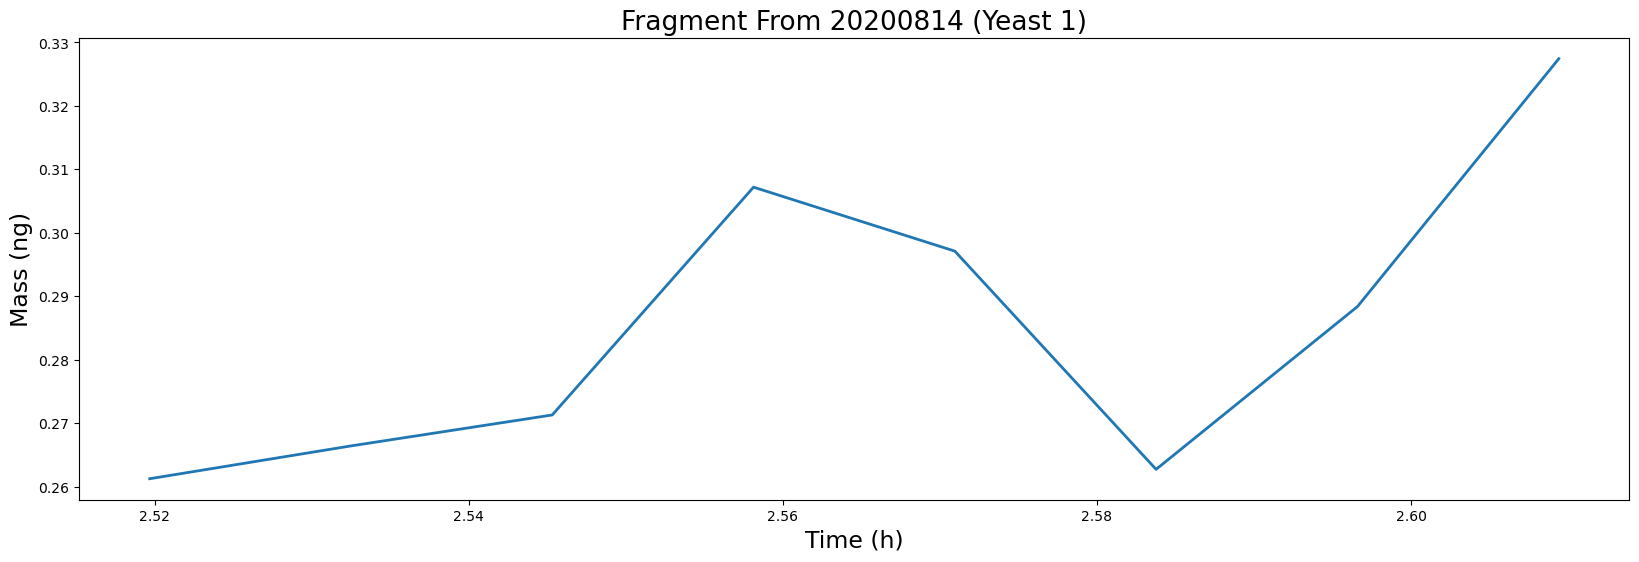

In [177]:
plt.plot(df14['time'].iloc[df14_motif_index : df14_motif_index + m].values, df14['mass'].iloc[df14_motif_index : df14_motif_index + m].values, label='20200814 (Yeast 1)', linewidth=2)
plt.title('Fragment From 20200814 (Yeast 1)', fontsize=19)
plt.xlabel('Time (h)', fontsize=17)
plt.ylabel('Mass (ng)', fontsize=17)
plt.show()